In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
import scipy.stats as stats
from scipy.stats import chi2
from arch import arch_model

In [3]:
# Wczytanie danych z plików CSV
wig20 = pd.read_csv('wig20.csv')
nasdaq = pd.read_csv('nasdaq.csv')
nvidia = pd.read_csv('nvidia.csv')
sp500 = pd.read_csv('s&p500.csv')
apple = pd.read_csv('apple.csv')
dowjones30 = pd.read_csv('dowjones30.csv')
eurusd = pd.read_csv('dowjones30.csv')
gbpusd = pd.read_csv('gbpusd.csv')
gbrindx = pd.read_csv('gbrindx.csv')
xauusd = pd.read_csv('xauusd.csv')

In [5]:
# Funkcja do obliczenia logarytmicznych stóp zwrotu
def calculate_log_returns(df, column='Zamkniecie'):
    df['Zlogarytmowana stopa zwrotu'] = np.log(df[column] / df[column].shift(1))
    return df

# Lista instrumentów
instruments = [wig20, nasdaq, nvidia, sp500, apple, dowjones30, eurusd, gbpusd, gbrindx, xauusd]
instrument_names = ['wig20', 'nasdaq', 'nvidia', 'sp500', 'apple', 'dowjones30', 'eurusd', 'gbpusd', 'gbrindx', 'xauusd']

# Przetwarzanie danych dla każdego instrumentu
for i, df in enumerate(instruments):
    df = calculate_log_returns(df)
    df.dropna(inplace=True)
    df['ZSZ100'] = df['Zlogarytmowana stopa zwrotu'] * 100 # Pomnożenie zlogarytmowanej stopy zwrotu razy 100, gdyż model miał problemy z obliczeniami tak małych wartości z kolumny "Zlogarytmowana stopa zwrotu"
    instruments[i] = df

In [6]:
wig20

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie     Wolumen  \
1     2000-01-04   1818.20    1818.20    1784.10     1796.60   8762754.0   
2     2000-01-05   1739.00    1787.10    1739.00     1777.00   9760796.0   
3     2000-01-06   1776.20    1835.60    1765.00     1832.10   7560972.0   
4     2000-01-07   1867.00    1946.40    1867.00     1933.20  15747541.0   
5     2000-01-10   1968.80    2041.90    1968.80     2000.80  16363578.0   
...          ...       ...        ...        ...         ...         ...   
6253  2024-12-19   2201.10    2227.86    2196.85     2225.51  27362416.0   
6254  2024-12-20   2217.49    2219.00    2179.88     2200.39  37604945.0   
6255  2024-12-23   2217.40    2227.77    2201.05     2202.17  16626488.0   
6256  2024-12-27   2205.98    2207.75    2186.66     2204.19   9790987.0   
6257  2024-12-30   2194.05    2209.88    2185.44     2192.01  11032199.0   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.030856 -3.085599  
2                       -0.010969 -1.096944  
3                        0.030536  3.053630  
4                        0.053714  5.371381  
5                        0.034370  3.437044  
...                           ...       ...  
6253                    -0.000481 -0.048067  
6254                    -0.011351 -1.135149  
6255                     0.000809  0.080862  
6256                     0.000917  0.091686  
6257                    -0.005541 -0.554116  

[6257 rows x 8 columns]

In [7]:
nasdaq

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
1     2000-01-04   4020.00    4073.25    3898.23     3901.69  1.406011e+09   
2     2000-01-05   3854.35    3924.21    3734.87     3877.54  1.614173e+09   
3     2000-01-06   3834.44    3868.76    3715.62     3727.13  1.486438e+09   
4     2000-01-07   3711.09    3882.67    3711.09     3882.62  1.520485e+09   
5     2000-01-10   4002.23    4072.36    3958.83     4049.67  1.573290e+09   
...          ...       ...        ...        ...         ...           ...   
6286  2024-12-24  19818.48   20031.13   19813.77    20031.13  2.932500e+09   
6287  2024-12-26  19979.25   20070.08   19888.11    20020.36  4.078057e+09   
6288  2024-12-27  19896.77   19904.77   19553.40    19722.03  5.000352e+09   
6289  2024-12-30  19460.41   19622.93   19342.51    19486.79  5.505574e+09   
6290  2024-12-31  19551.36   19563.72   19283.41    19310.79  5.495049e+09   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.057146 -5.714603  
2                       -0.006209 -0.620886  
3                       -0.039562 -3.956243  
4                        0.040872  4.087168  
5                        0.042125  4.212521  
...                           ...       ...  
6286                     0.013381  1.338094  
6287                    -0.000538 -0.053781  
6288                    -0.015013 -1.501347  
6289                    -0.011999 -1.199948  
6290                    -0.009073 -0.907279  

[6290 rows x 8 columns]

In [8]:
nvidia

Data    Otwarcie   Najwyzszy   Najnizszy  Zamkniecie  \
1     2000-01-04    0.087840    0.088059    0.082566    0.087151   
2     2000-01-05    0.084634    0.086002    0.083036    0.084174   
3     2000-01-06    0.084174    0.084174    0.075455    0.078671   
4     2000-01-07    0.078441    0.080958    0.077293    0.080039   
5     2000-01-10    0.080269    0.086002    0.078901    0.082566   
...          ...         ...         ...         ...         ...   
6284  2024-12-24  140.000000  141.900000  138.650000  140.220000   
6285  2024-12-26  139.700000  140.850000  137.730000  139.930000   
6286  2024-12-27  138.550000  139.020000  134.710000  137.010000   
6287  2024-12-30  134.830000  140.270000  134.020000  137.490000   
6288  2024-12-31  138.030000  138.070000  133.830000  134.290000   

           Wolumen  Zlogarytmowana stopa zwrotu    ZSZ100  
1     8.233332e+07                    -0.025904 -2.590352  
2     5.151396e+07                    -0.034747 -3.474682  
3     3.291229e+07                    -0.067612 -6.761242  
4     2.001418e+07                     0.017242  1.724185  
5     6.608640e+07                     0.031081  3.108134  
...            ...                          ...       ...  
6284  1.051570e+08                     0.003930  0.393012  
6285  1.165191e+08                    -0.002070 -0.207032  
6286  1.705826e+08                    -0.021088 -2.108838  
6287  1.677347e+08                     0.003497  0.349727  
6288  1.556592e+08                    -0.023550 -2.354955  

[6288 rows x 8 columns]

In [9]:
sp500

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
1     2000-01-04   1455.22    1455.22    1397.43     1399.42  5.605556e+08   
2     2000-01-05   1399.42    1413.27    1377.68     1402.11  6.030556e+08   
3     2000-01-06   1402.11    1411.90    1392.10     1403.45  6.068333e+08   
4     2000-01-07   1403.45    1441.47    1400.73     1441.47  6.806667e+08   
5     2000-01-10   1441.47    1464.36    1441.47     1457.60  5.915556e+08   
...          ...       ...        ...        ...         ...           ...   
6284  2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
6285  2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
6286  2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
6287  2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
6288  2024-12-31   5919.74    5929.74    5868.86     5881.63  1.794501e+09   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.039099 -3.909923  
2                        0.001920  0.192038  
3                        0.000955  0.095525  
4                        0.026730  2.672994  
5                        0.011128  1.112782  
...                           ...       ...  
6284                     0.010982  1.098220  
6285                    -0.000406 -0.040571  
6286                    -0.011117 -1.111730  
6287                    -0.010760 -1.075969  
6288                    -0.004294 -0.429400  

[6288 rows x 8 columns]

In [10]:
apple

Data    Otwarcie   Najwyzszy   Najnizszy  Zamkniecie  \
1     2000-01-04    0.816211    0.834185    0.763074    0.772753   
2     2000-01-05    0.782234    0.833594    0.776506    0.784013   
3     2000-01-06    0.800210    0.806827    0.716259    0.716259   
4     2000-01-07    0.727418    0.761494    0.720209    0.750529   
5     2000-01-10    0.769098    0.770877    0.714481    0.737099   
...          ...         ...         ...         ...         ...   
6284  2024-12-24  255.490000  258.210000  255.290000  258.200000   
6285  2024-12-26  258.190000  260.100000  257.630000  259.020000   
6286  2024-12-27  257.830000  258.700000  253.060000  255.590000   
6287  2024-12-30  252.230000  253.500000  250.750000  252.200000   
6288  2024-12-31  252.440000  253.280000  249.430000  250.420000   

           Wolumen  Zlogarytmowana stopa zwrotu    ZSZ100  
1     6.067407e+08                    -0.087916 -8.791574  
2     9.216628e+08                     0.014466  1.446614  
3     9.094082e+08                    -0.090384 -9.038377  
4     5.455865e+08                     0.046736  4.673646  
5     5.980802e+08                    -0.018056 -1.805608  
...            ...                          ...       ...  
6284  2.323470e+07                     0.011413  1.141267  
6285  2.726298e+07                     0.003171  0.317080  
6286  4.235532e+07                    -0.013331 -1.333068  
6287  3.555754e+07                    -0.013352 -1.335217  
6288  3.948072e+07                    -0.007083 -0.708292  

[6288 rows x 8 columns]

In [11]:
dowjones30

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
1     2000-01-04  11349.80   11350.10   10986.50    10997.90  178357418.0   
2     2000-01-05  10989.40   11215.10   10938.70    11122.70  203266571.0   
3     2000-01-06  11113.40   11313.50   11098.50    11253.30  176642517.0   
4     2000-01-07  11247.10   11528.10   11239.90    11522.60  184926808.0   
5     2000-01-10  11532.50   11638.30   11532.50    11572.20  168229080.0   
...          ...       ...        ...        ...         ...          ...   
6284  2024-12-24  42916.48   43297.65   42871.76    43297.03  154320664.0   
6285  2024-12-26  43201.85   43373.98   43115.09    43325.80  201741006.0   
6286  2024-12-27  43142.37   43238.85   42761.56    42992.21  245795211.0   
6287  2024-12-30  42863.86   42863.86   42263.51    42573.73  272043785.0   
6288  2024-12-31  42636.70   42779.69   42421.29    42544.22  249300063.0   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.032174 -3.217397  
2                        0.011284  1.128372  
3                        0.011673  1.167335  
4                        0.023649  2.364891  
5                        0.004295  0.429535  
...                           ...       ...  
6284                     0.009050  0.905022  
6285                     0.000664  0.066426  
6286                    -0.007729 -0.772936  
6287                    -0.009782 -0.978154  
6288                    -0.000693 -0.069339  

[6288 rows x 8 columns]

In [12]:
eurusd

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
1     2000-01-04  11349.80   11350.10   10986.50    10997.90  178357418.0   
2     2000-01-05  10989.40   11215.10   10938.70    11122.70  203266571.0   
3     2000-01-06  11113.40   11313.50   11098.50    11253.30  176642517.0   
4     2000-01-07  11247.10   11528.10   11239.90    11522.60  184926808.0   
5     2000-01-10  11532.50   11638.30   11532.50    11572.20  168229080.0   
...          ...       ...        ...        ...         ...          ...   
6284  2024-12-24  42916.48   43297.65   42871.76    43297.03  154320664.0   
6285  2024-12-26  43201.85   43373.98   43115.09    43325.80  201741006.0   
6286  2024-12-27  43142.37   43238.85   42761.56    42992.21  245795211.0   
6287  2024-12-30  42863.86   42863.86   42263.51    42573.73  272043785.0   
6288  2024-12-31  42636.70   42779.69   42421.29    42544.22  249300063.0   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.032174 -3.217397  
2                        0.011284  1.128372  
3                        0.011673  1.167335  
4                        0.023649  2.364891  
5                        0.004295  0.429535  
...                           ...       ...  
6284                     0.009050  0.905022  
6285                     0.000664  0.066426  
6286                    -0.007729 -0.772936  
6287                    -0.009782 -0.978154  
6288                    -0.000693 -0.069339  

[6288 rows x 8 columns]

In [13]:
gbpusd

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  \
1     2000-01-04   1.63690    1.64100    1.63110     1.63640   
2     2000-01-05   1.63640    1.64470    1.63480     1.64150   
3     2000-01-06   1.64150    1.65070    1.64070     1.64640   
4     2000-01-07   1.64640    1.64960    1.63590     1.63830   
5     2000-01-10   1.63830    1.63910    1.63210     1.63640   
...          ...       ...        ...        ...         ...   
6473  2024-12-25   1.25375    1.25575    1.25220     1.25491   
6474  2024-12-26   1.25487    1.25491    1.25013     1.25261   
6475  2024-12-27   1.25257    1.25924    1.25052     1.25798   
6476  2024-12-30   1.25822    1.26074    1.25070     1.25433   
6477  2024-12-31   1.25488    1.25694    1.25059     1.25122   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.000306 -0.030550  
2                        0.003112  0.311175  
3                        0.002981  0.298063  
4                       -0.004932 -0.493197  
5                       -0.001160 -0.116041  
...                           ...       ...  
6473                     0.002162  0.216185  
6474                    -0.001834 -0.183448  
6475                     0.004278  0.427789  
6476                    -0.002906 -0.290569  
6477                    -0.002482 -0.248249  

[6477 rows x 7 columns]

In [14]:
gbrindx

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  \
1     2000-01-04   37.0600    37.1100    37.0000     37.0600   
2     2000-01-05   37.1200    37.2100    37.1000     37.1700   
3     2000-01-06   37.3500    37.4500    37.3400     37.4000   
4     2000-01-07   37.3200    37.3600    37.2100     37.2400   
5     2000-01-10   37.2700    37.2800    37.2000     37.2500   
...          ...       ...        ...        ...         ...   
6473  2024-12-25   28.3441    28.3583    28.2755     28.3395   
6474  2024-12-26   28.3296    28.3432    28.2597     28.2934   
6475  2024-12-27   28.2922    28.4326    28.2569     28.4244   
6476  2024-12-30   28.4148    28.4576    28.2748     28.3217   
6477  2024-12-31   28.3340    28.3583    28.2875     28.3082   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.001887 -0.188705  
2                        0.002964  0.296376  
3                        0.006169  0.616872  
4                       -0.004287 -0.428725  
5                        0.000268  0.026849  
...                           ...       ...  
6473                     0.002013  0.201335  
6474                    -0.001628 -0.162803  
6475                     0.004619  0.461937  
6476                    -0.003620 -0.361964  
6477                    -0.000477 -0.047678  

[6477 rows x 7 columns]

In [15]:
xauusd

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  \
1     2000-01-04    286.75    286.750    279.950     282.380   
2     2000-01-05    282.27    283.450    279.750     280.850   
3     2000-01-06    280.80    281.750    279.450     281.450   
4     2000-01-07    281.25    283.300    280.880     281.750   
5     2000-01-10    281.25    282.500    281.120     281.600   
...          ...       ...        ...        ...         ...   
6429  2024-12-24   2612.62   2621.535   2610.235    2616.180   
6430  2024-12-26   2615.97   2639.145   2615.340    2633.795   
6431  2024-12-27   2632.59   2638.275   2611.825    2615.555   
6432  2024-12-30   2620.05   2628.125   2596.185    2605.965   
6433  2024-12-31   2605.53   2627.585   2602.835    2624.585   

      Zlogarytmowana stopa zwrotu    ZSZ100  
1                       -0.023173 -2.317301  
2                       -0.005433 -0.543296  
3                        0.002134  0.213409  
4                        0.001065  0.106534  
5                       -0.000533 -0.053253  
...                           ...       ...  
6429                     0.001237  0.123730  
6430                     0.006711  0.671053  
6431                    -0.006949 -0.694946  
6432                    -0.003673 -0.367326  
6433                     0.007120  0.711974  

[6433 rows x 7 columns]

In [16]:
# Statystyki opisowe dla zlogarytmowanych stóp zwrotu
log_returns_stats = {
    'Instrument': instrument_names,
    'Mean': [df['ZSZ100'].mean() for df in instruments],
    'Median': [df['ZSZ100'].median() for df in instruments],
    'Std Dev': [df['ZSZ100'].std() for df in instruments],
    'CV (%)': [df['ZSZ100'].std() / abs(df['ZSZ100'].mean()) for df in instruments],
    'Min': [df['ZSZ100'].min() for df in instruments],
    'Max': [df['ZSZ100'].max() for df in instruments]
}

# Tworzenie DataFrame z wynikami
log_returns_stats_df = pd.DataFrame(log_returns_stats)
log_returns_stats_df

Instrument      Mean    Median   Std Dev      CV (%)        Min        Max
0       wig20  0.002686  0.006456  1.493668  556.080730 -14.245579   8.154839
1      nasdaq  0.024517  0.091575  1.570485   64.057457 -13.149061  13.254645
2      nvidia  0.116320  0.131500  3.728904   32.057231 -43.479930  35.413521
3       sp500  0.022212  0.060002  1.223395   55.078649 -12.765214  10.957196
4       apple  0.090538  0.093590  2.524111   27.879074 -73.079551  12.999649
5  dowjones30  0.021003  0.049764  1.163299   55.387379 -13.841813  10.764325
6      eurusd  0.021003  0.049764  1.163299   55.387379 -13.841813  10.764325
7      gbpusd -0.004148  0.001576  0.582103  140.323479  -9.505010   3.130041
8     gbrindx -0.004188  0.007846  0.485637  115.951836  -9.282177   3.164439
9      xauusd  0.034296  0.045767  1.045086   30.472673  -9.241378  10.050047

Opis statystyk opisowych dla zlogarytmowanych stóp zwrotu, które zostały pomnożone przez 100.

Mean (Średnia):
- Najwyższa średnia: Nvidia (0.116320), co wskazuje na stabilny i dodatni wzrost cen tej spółki w czasie.
- Najniższa średnia: GBRINX (-0.004188) oraz GBP/USD (-0.004148), co wskazuje na lekko ujemne zmiany wartości w czasie, z tendencją spadkową.
- Większość instrumentów miała dodatnie średnie stopy zwrotu, wskazując na ogólny trend wzrostowy w analizowanym okresie.

Median (Mediana):
- Mediana dla większości instrumentów jest zbliżona do średniej, co sugeruje symetryczny rozkład stóp zwrotu.
- Najwyższa mediana: Nvidia (0.131500), co oznacza, że większość stóp zwrotu tej spółki była dodatnia i relatywnie wysoka.
- Najniższa mediana: GBP/USD (0.001576), co podkreśla stabilność i niską zmienność kursu walutowego w długim okresie.

Std Dev (Odchylenie standardowe):
- Największe odchylenie standardowe: Nvidia (3.728904), co wskazuje na znaczną zmienność i ryzyko związane z tą spółką.
- Najmniejsze odchylenie standardowe: GBRINX (0.485637), co świadczy o wysokiej stabilności indeksu brytyjskich spółek.
- Instrumenty takie jak S&P 500 (1.223395) pokazują umiarkowaną zmienność, typową dla szerokiego rynku.

CV (%) (Współczynnik zmienności):
- Najwyższy współczynnik zmienności: EUR/USD (4282.593974%), co wynika z bardzo niskiej średniej wartości stóp zwrotu w porównaniu z odchyleniem standardowym.
- Najniższy współczynnik zmienności: Apple (27.879074%), co sugeruje względną stabilność zmian w stosunku do ich średnich wartości.

Min (Minimalna wartość):
- Największy spadek: Apple (-73.079551), co odzwierciedla duże ryzyko i potencjalne straty w krótkim okresie.
- Najmniejszy spadek: EUR/USD (-2.947990), co potwierdza stabilność kursów walutowych w porównaniu z instrumentami giełdowymi.

Max (Maksymalna wartość):
- Największy wzrost: Nvidia (35.413521), co wskazuje na wysoką zmienność i potencjalne możliwości inwestycyjne.
- Najmniejszy wzrost: GBP/USD (3.130041), co odzwierciedla ograniczoną zmienność kursów walutowych.

Kluczowe wnioski:
- Instrumenty technologiczne, takie jak Nvidia i Apple, wykazują najwyższą zmienność i potencjał wzrostu, ale także większe ryzyko.
- Kursy walutowe, takie jak EUR/USD i GBP/USD, charakteryzują się wysoką stabilnością, z niskimi wartościami minimalnymi i maksymalnymi.
- Indeksy, takie jak S&P 500 i Dow Jones 30, wykazują umiarkowaną zmienność, co czyni je odpowiednimi dla inwestorów preferujących równowagę między ryzykiem a zwrotem.
- Złoto (XAU/USD) okazało się stabilnym aktywem z dodatnią średnią i umiarkowaną zmiennością, potwierdzając jego funkcję jako bezpiecznej przystani w inwestycjach.

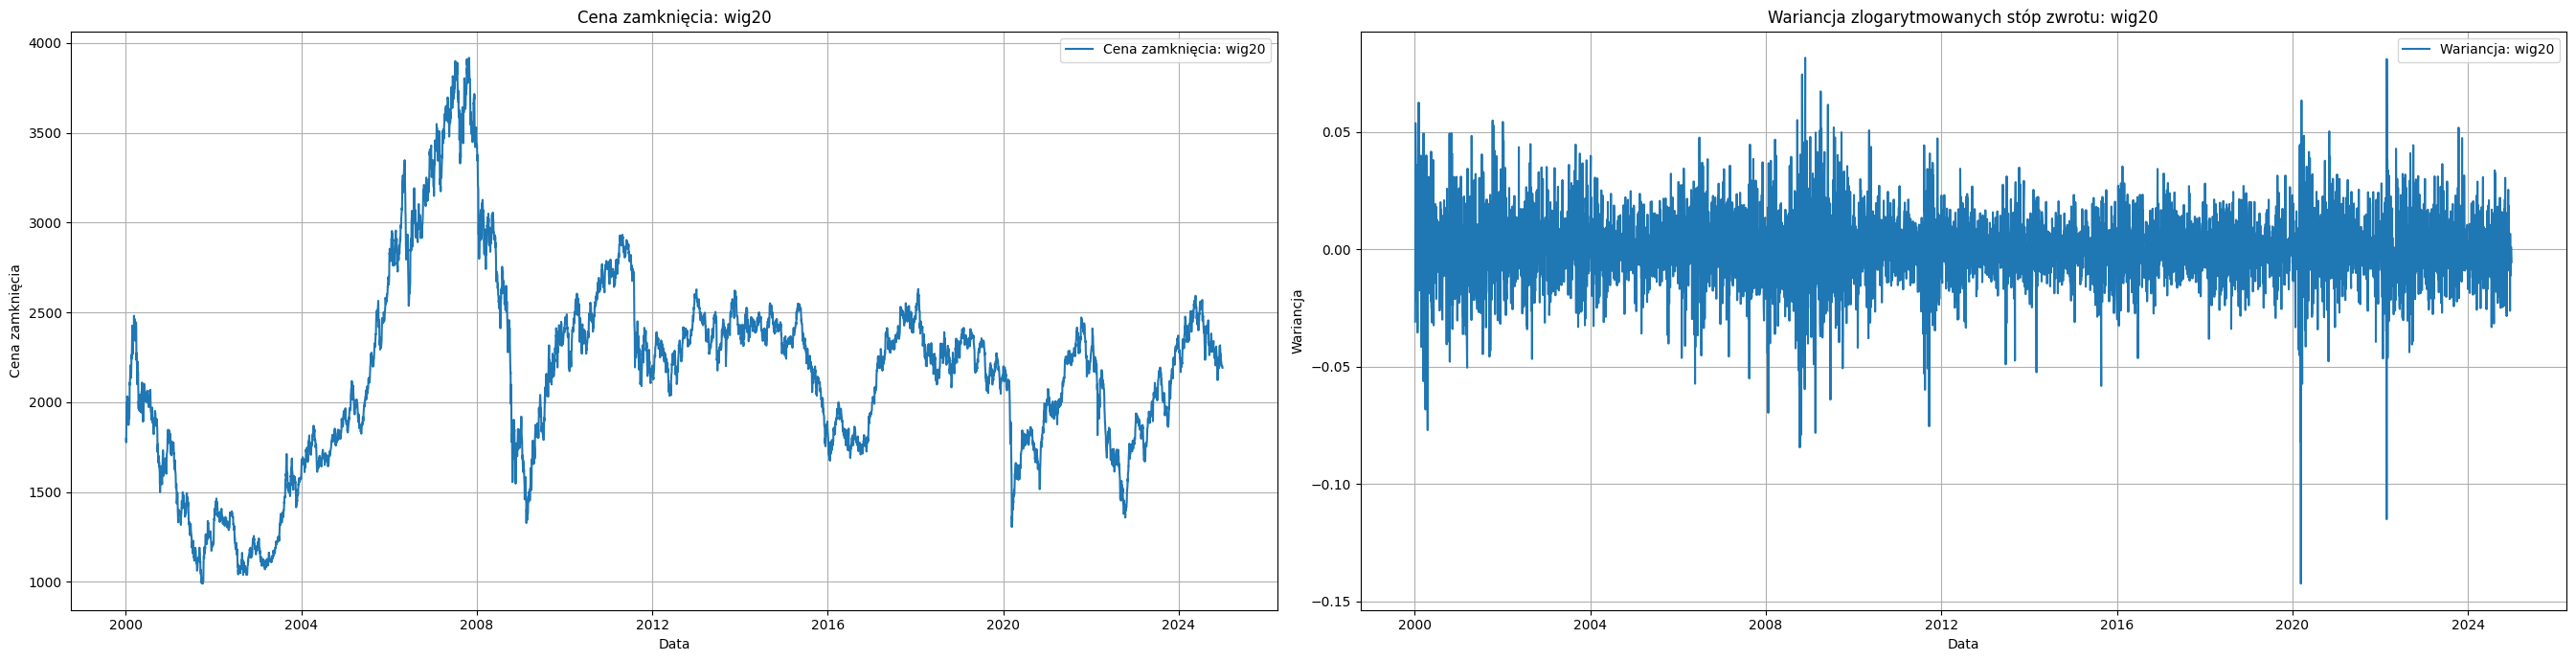

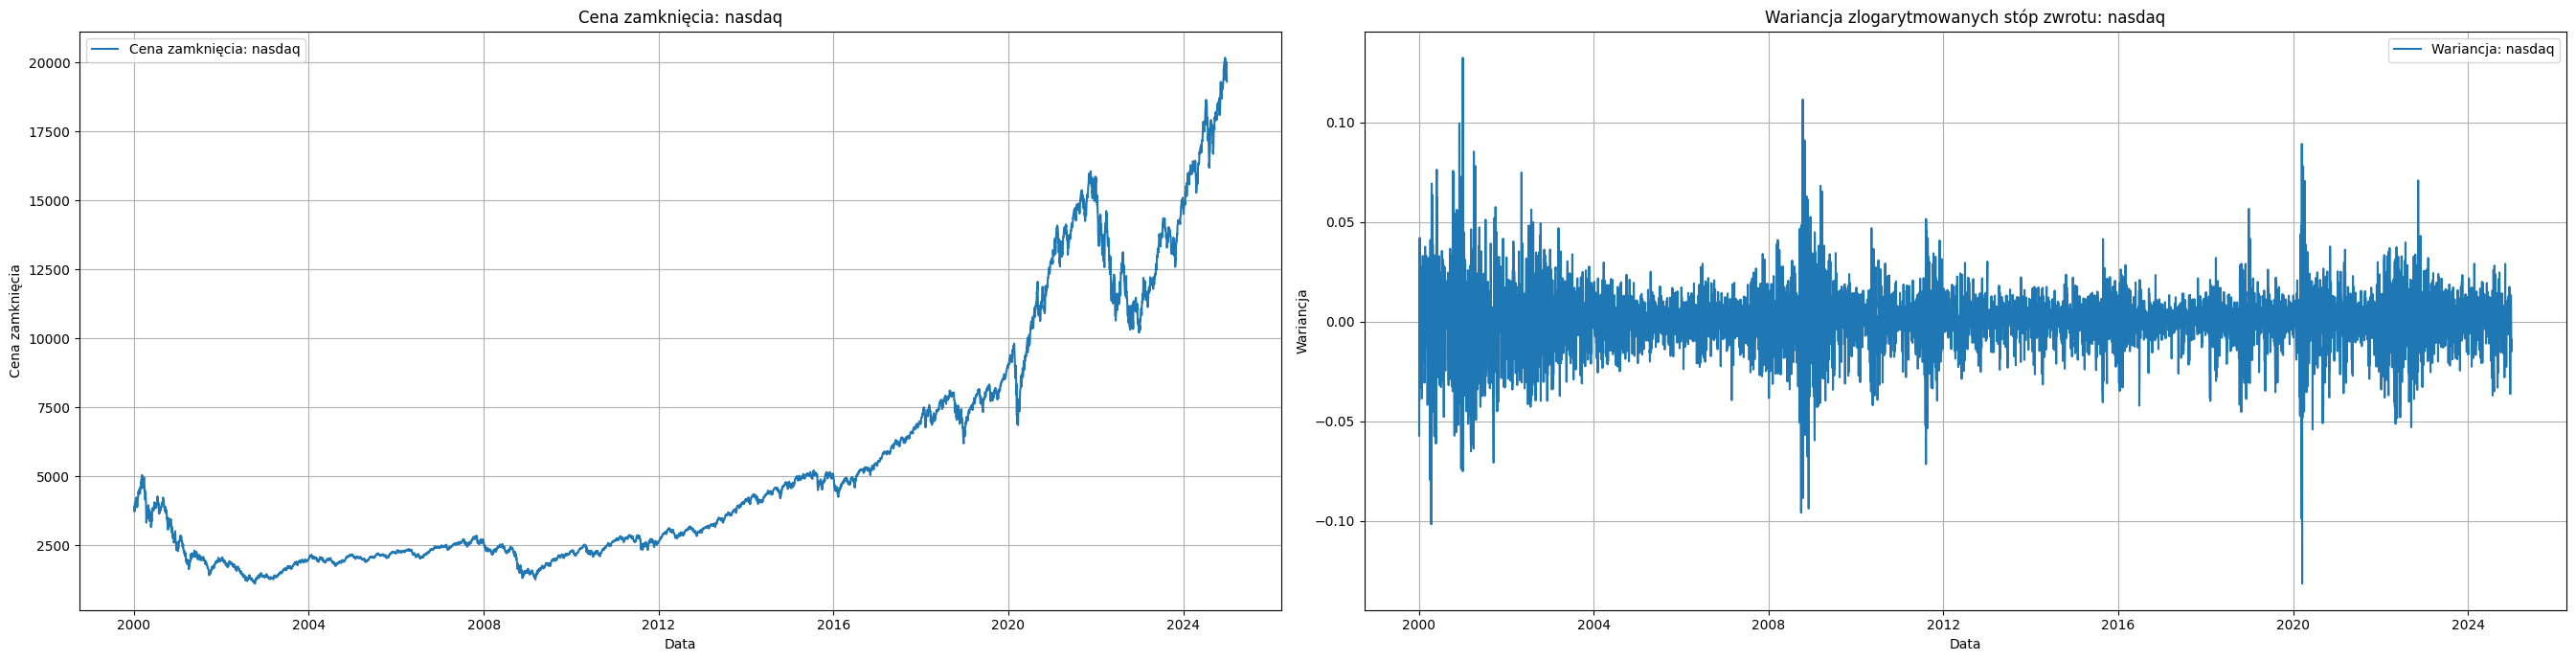

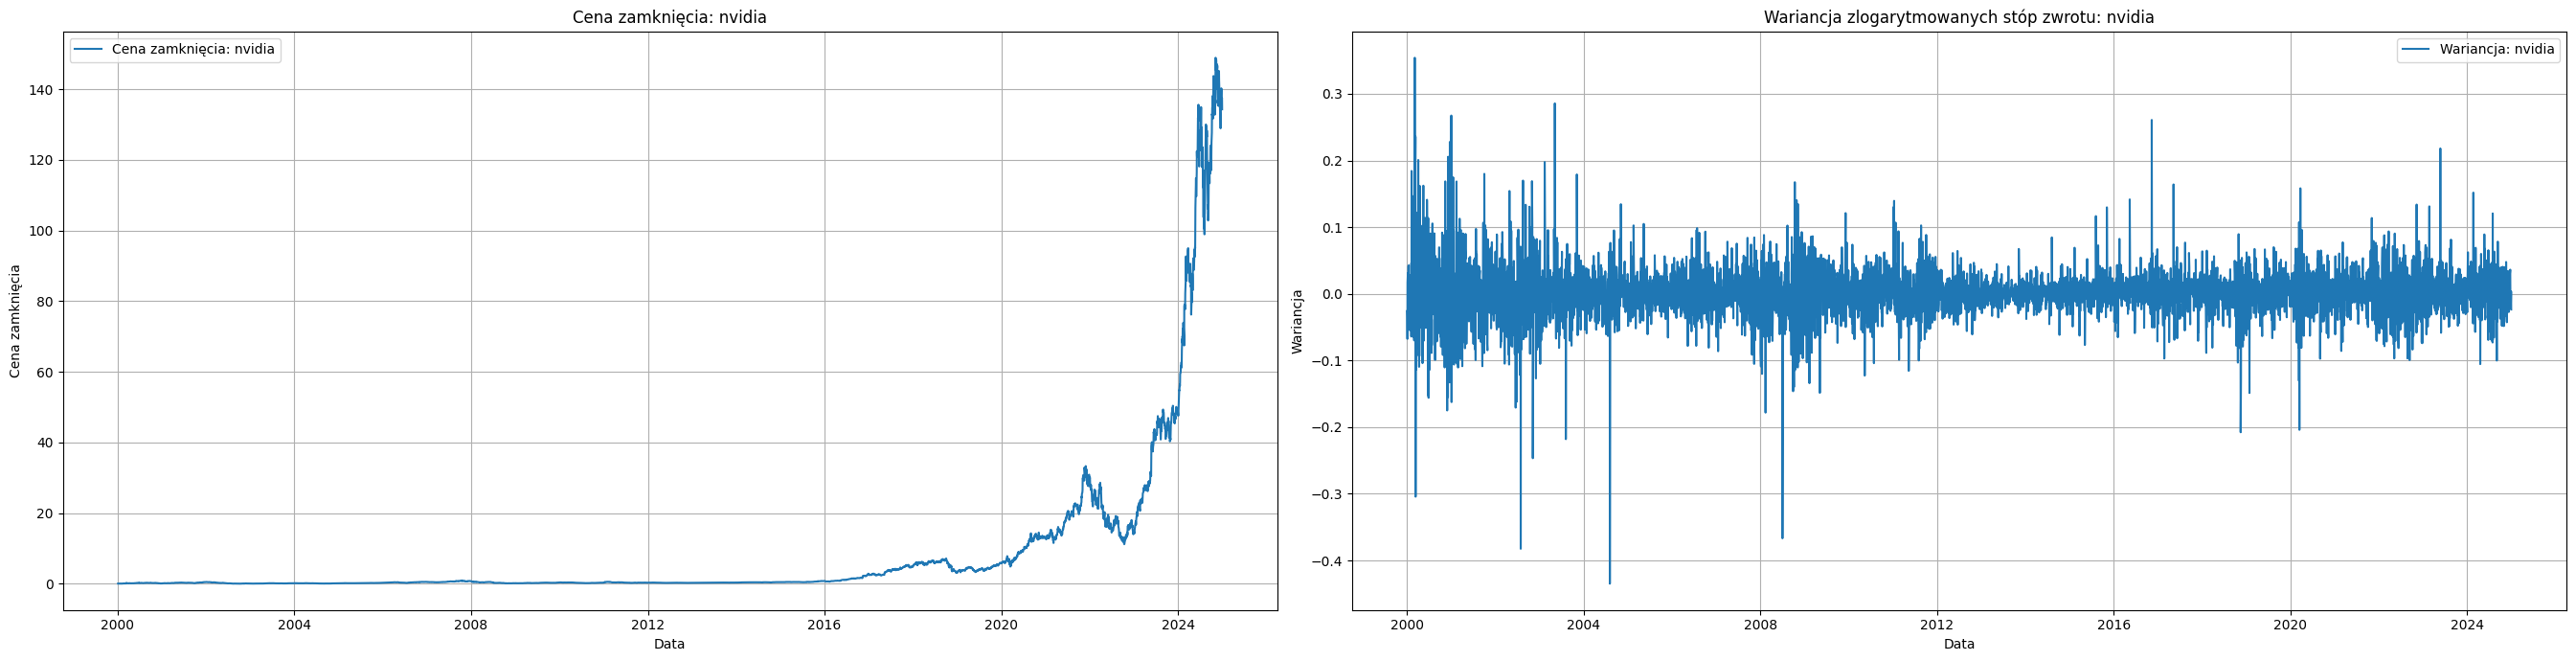

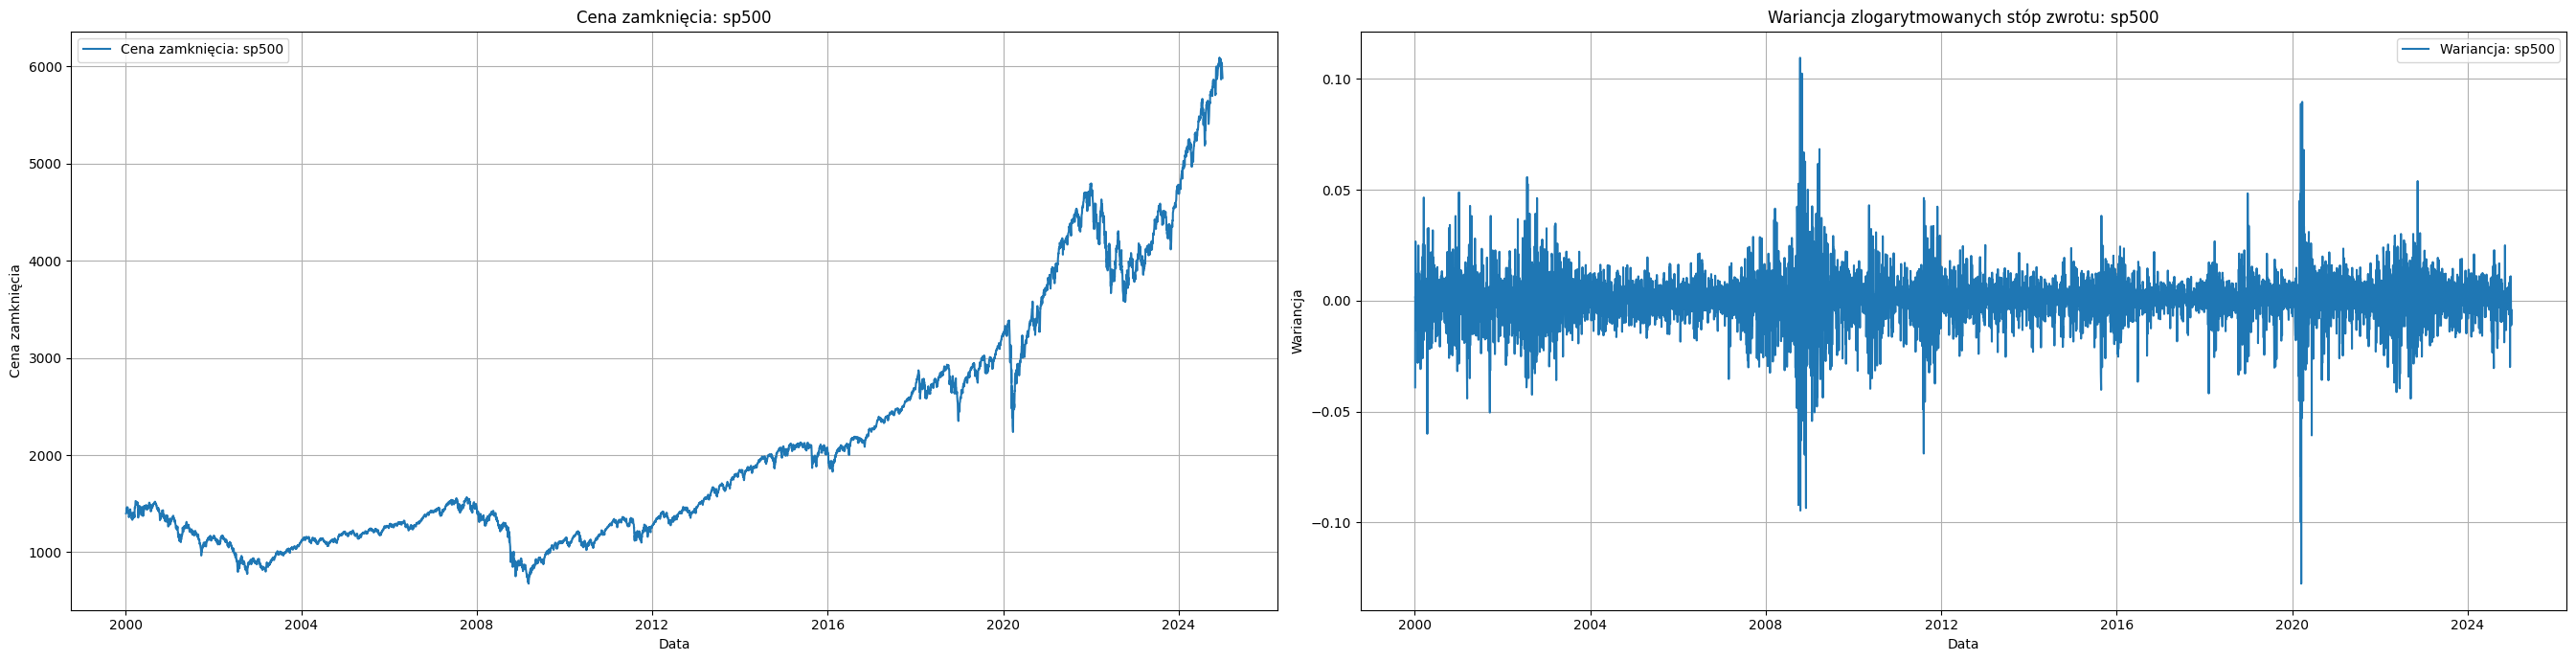

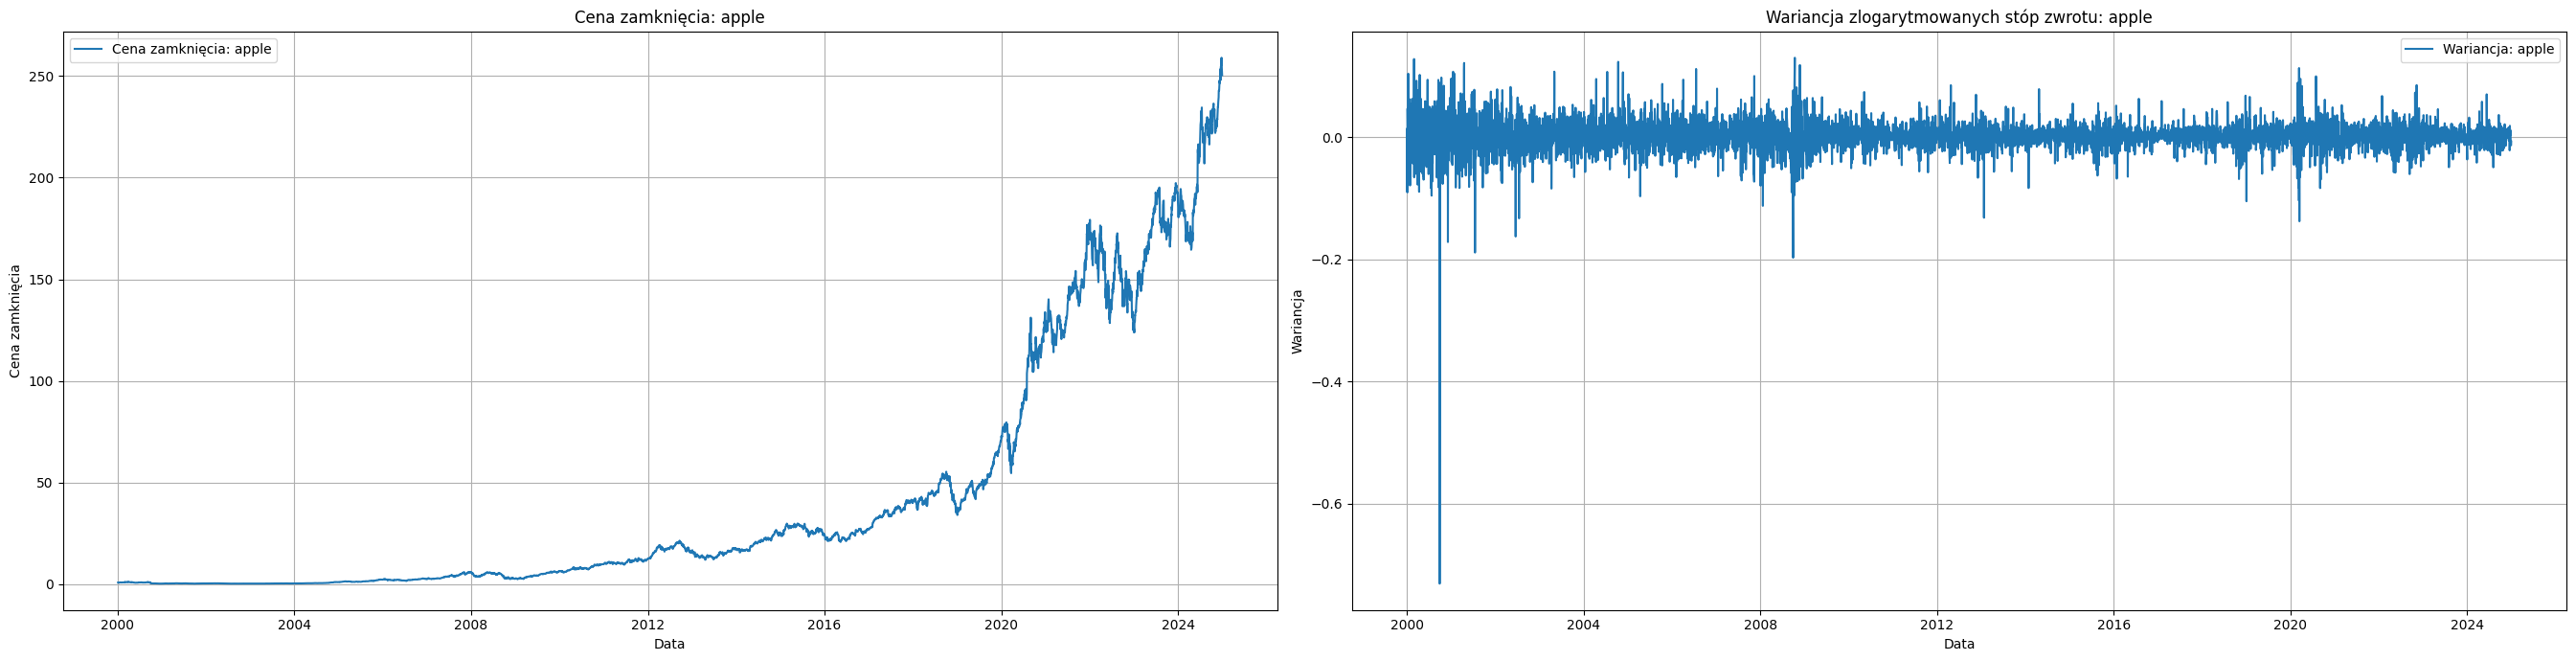

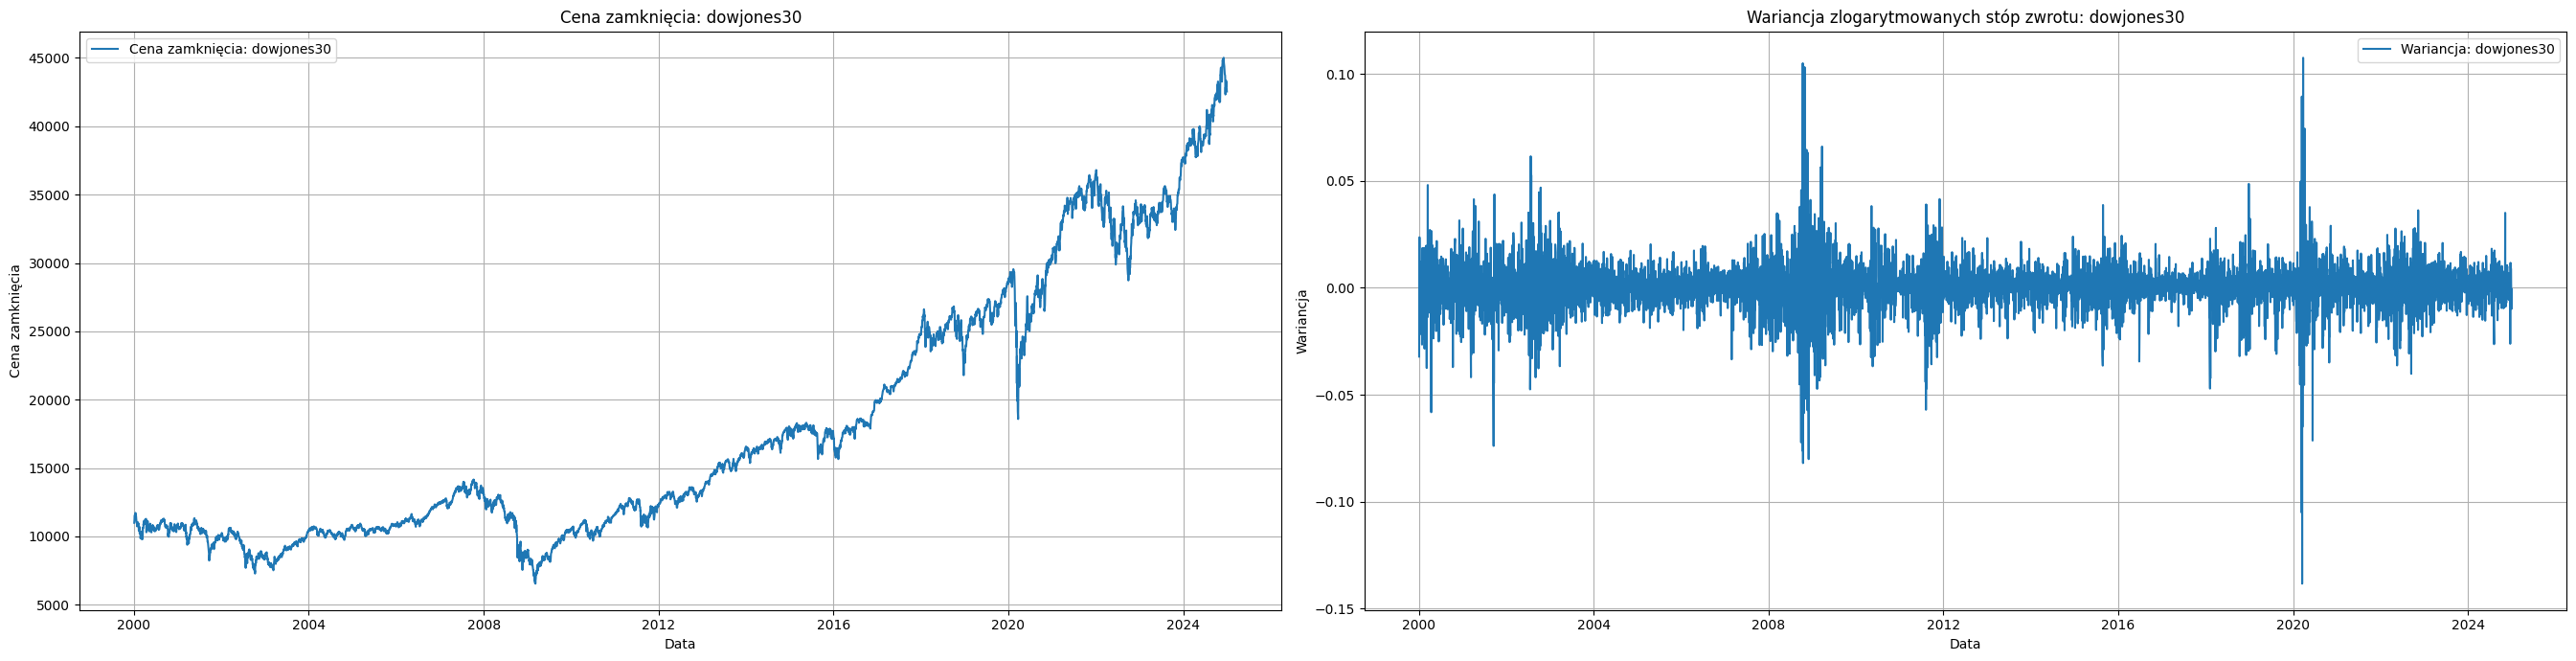

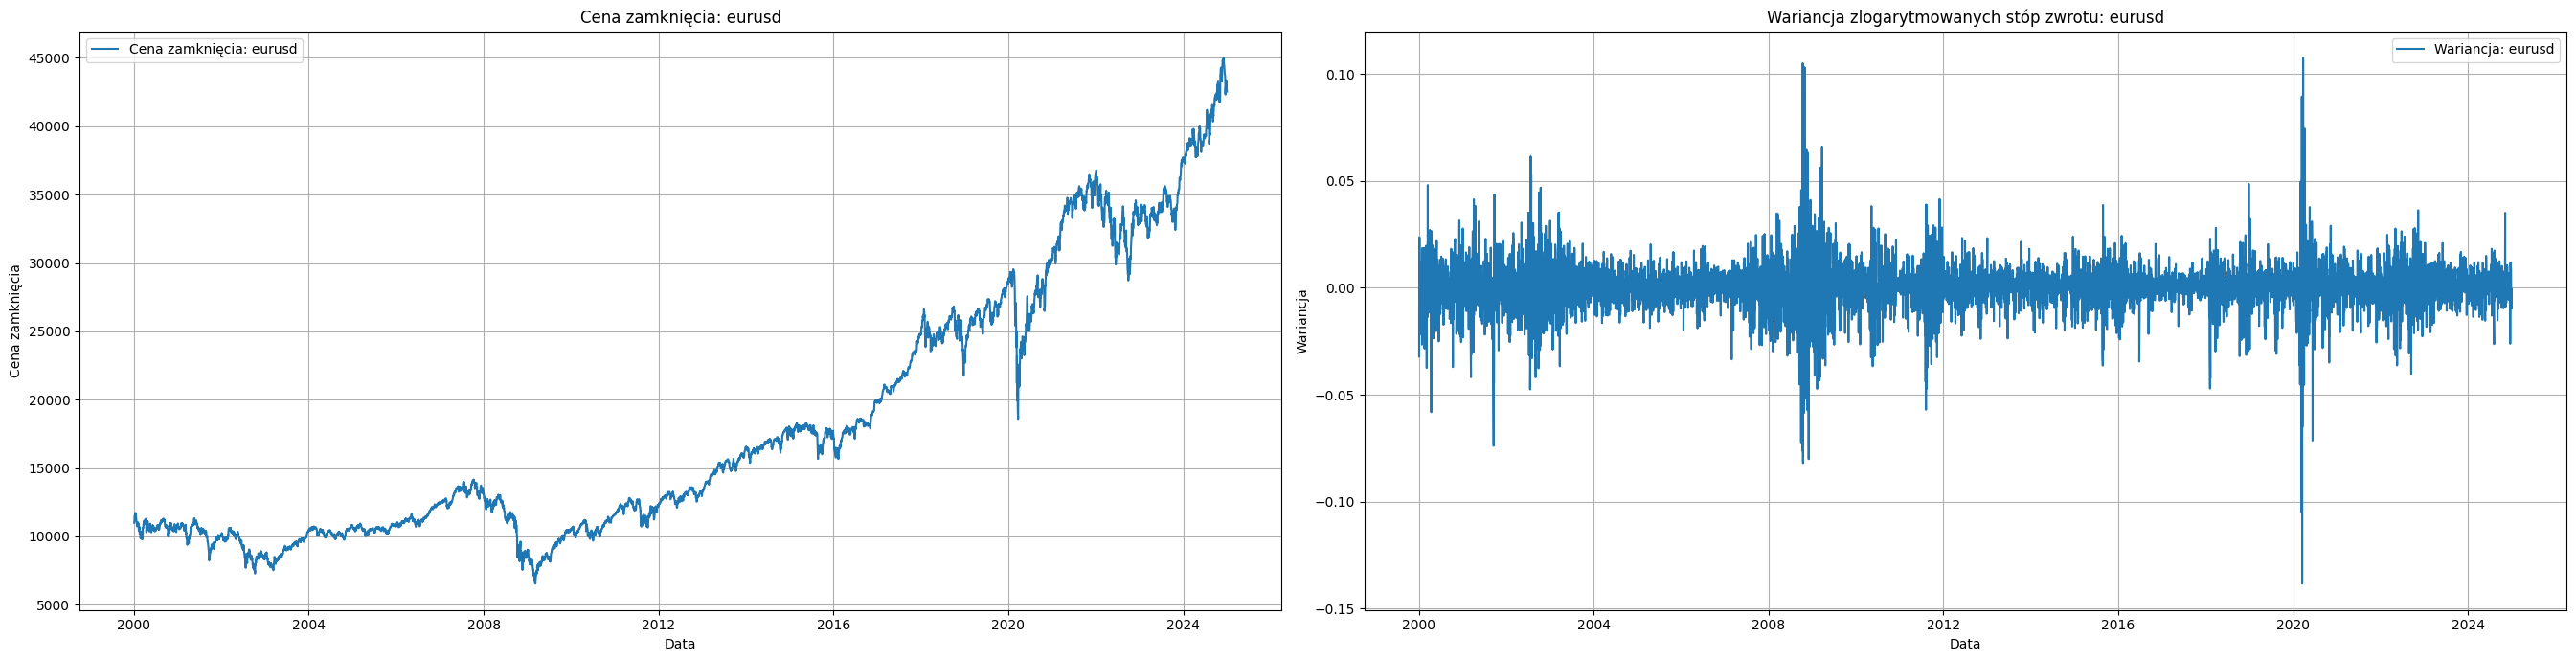

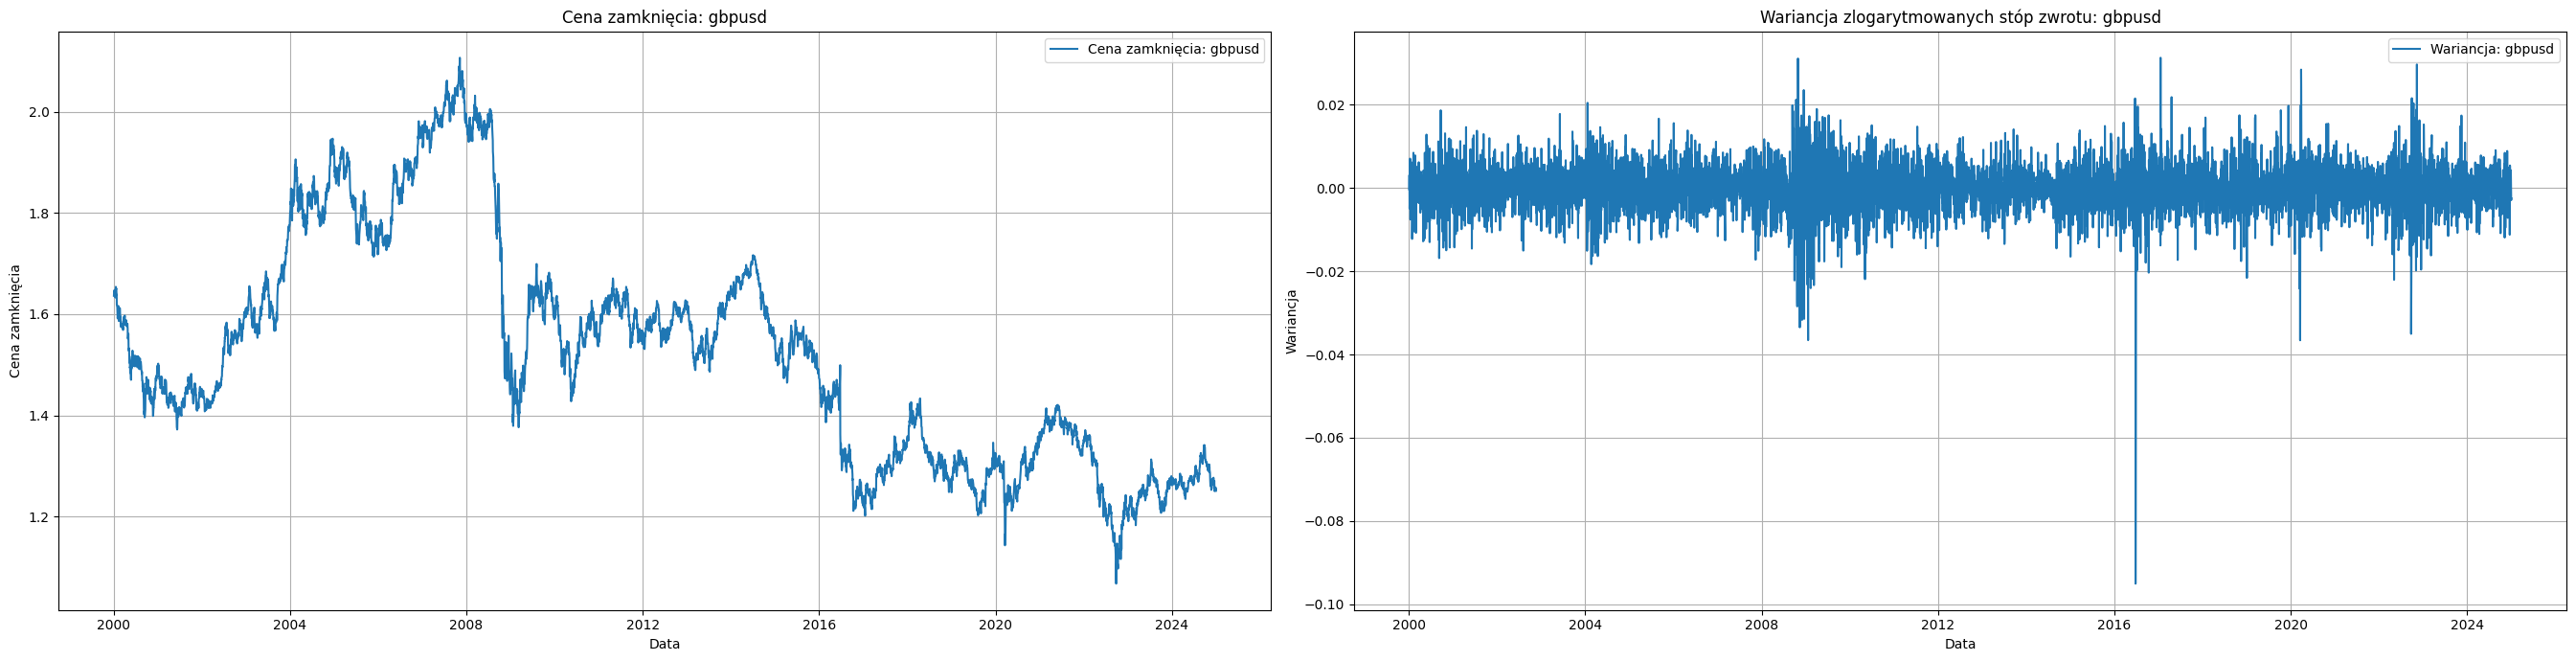

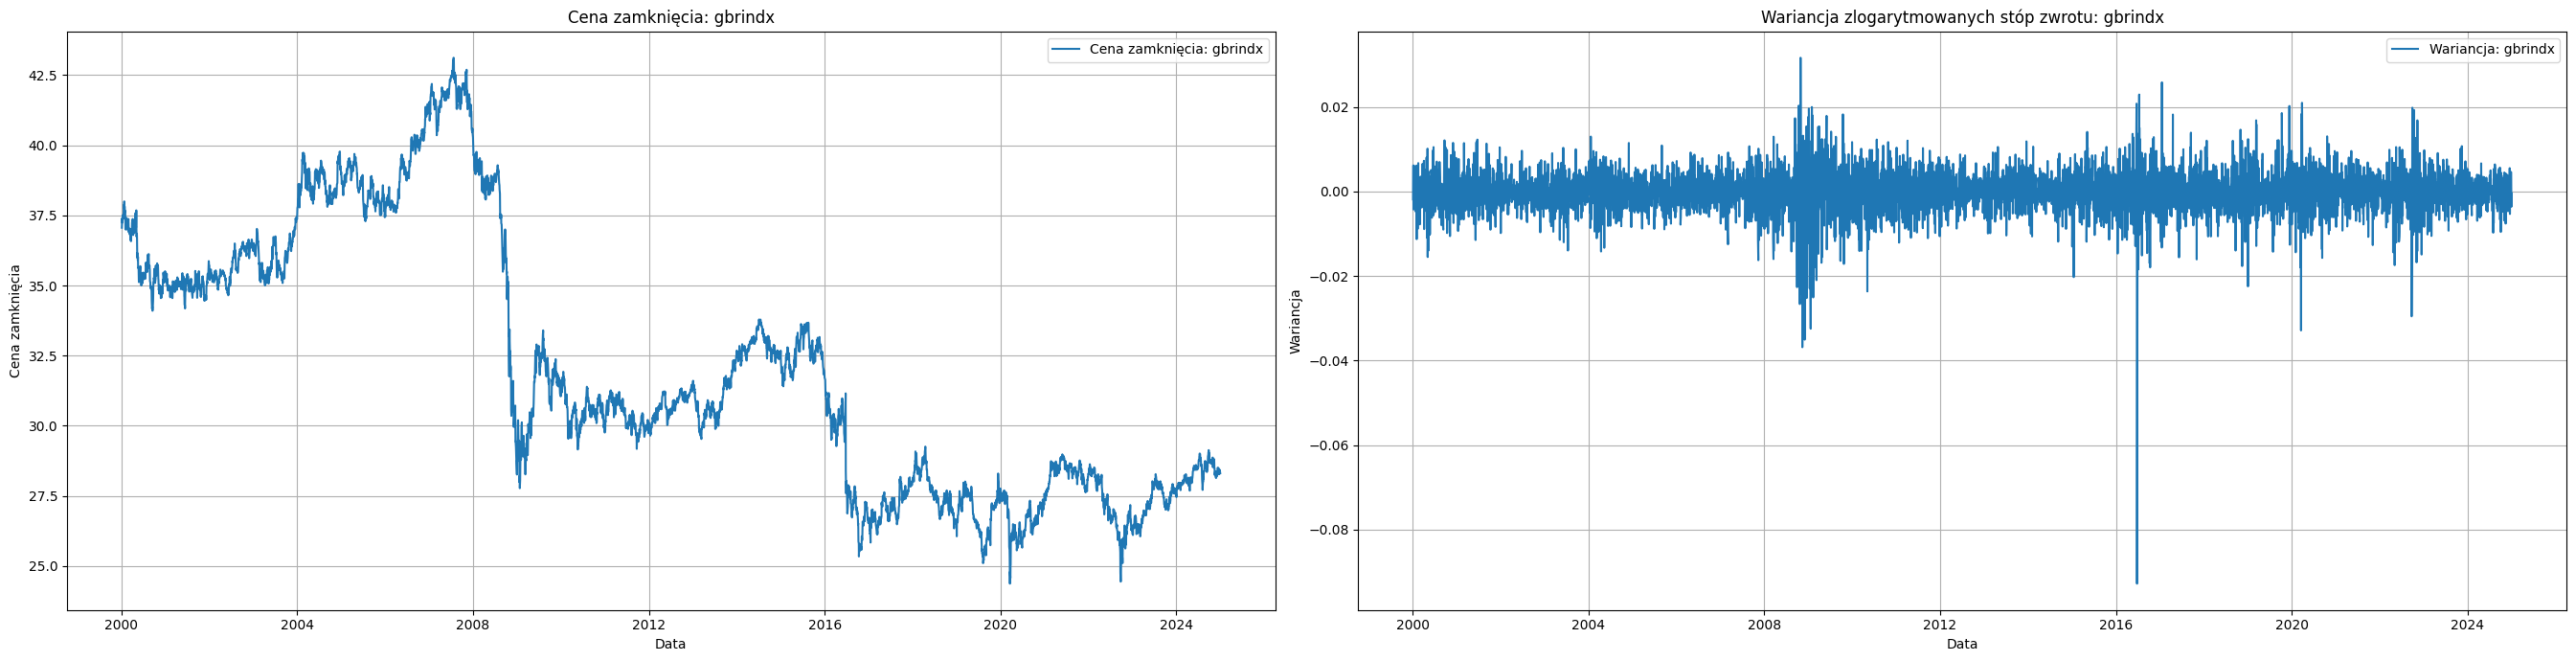

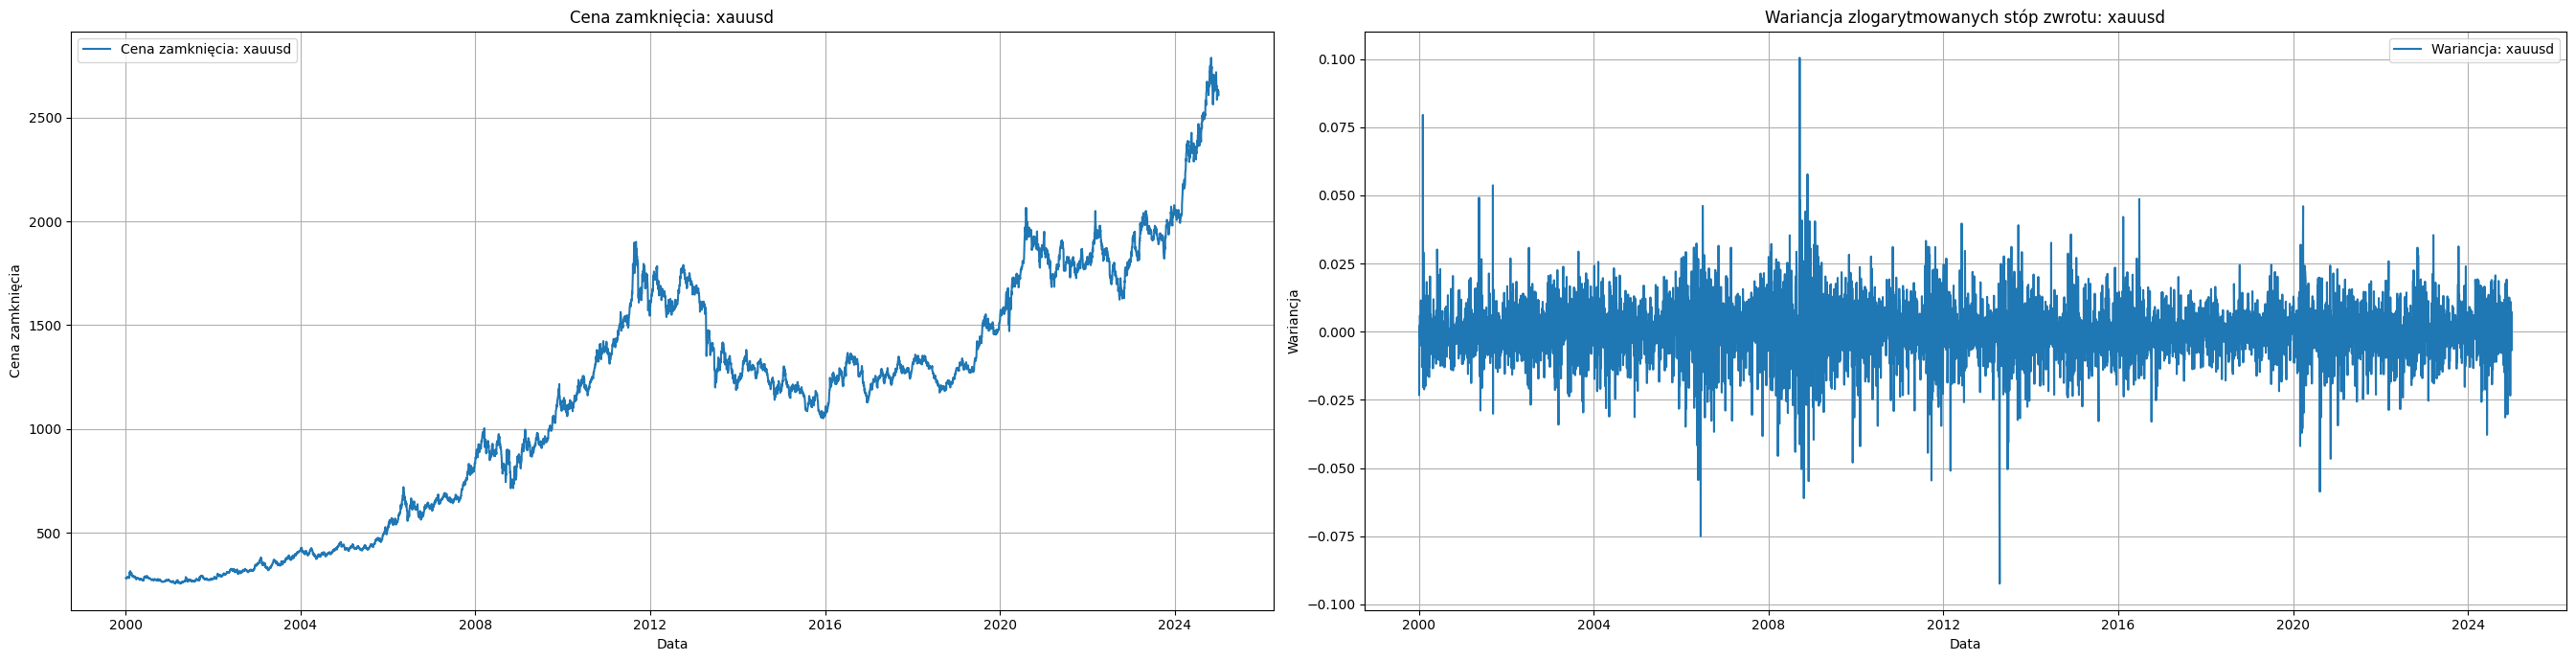

In [17]:
# Funkcja do rysowania cen zamknięcia i wariancji na zestawionych wykresach
def plot_closing_prices_and_variance(dataframes, instrument_names):
    for df, name in zip(dataframes, instrument_names):
        fig, axes = plt.subplots(1, 2, figsize=(27, 7))

        # Wykres cen zamknięcia
        axes[0].plot(pd.to_datetime(df['Data']), df['Zamkniecie'], label=f"Cena zamknięcia: {name}")
        axes[0].set_title(f"Cena zamknięcia: {name}")
        axes[0].set_xlabel("Data")
        axes[0].set_ylabel("Cena zamknięcia")
        axes[0].legend()
        axes[0].grid()

        # Wykres wariancji
        axes[1].plot(pd.to_datetime(df['Data']), df['Zlogarytmowana stopa zwrotu'], label=f"Wariancja: {name}")
        axes[1].set_title(f"Wariancja zlogarytmowanych stóp zwrotu: {name}")
        axes[1].set_xlabel("Data")
        axes[1].set_ylabel("Wariancja")
        axes[1].legend()
        axes[1].grid()

        plt.tight_layout()
        plt.show()
        
# Wykresy cen zamknięcia na osobnych obrazkach
plot_closing_prices_and_variance(instruments, instrument_names)

Wykresy cen zamknięcia:

WIG20:
- Cena zamknięcia WIG20 wykazuje dużą zmienność w długim okresie, z wyraźnymi cyklami wzrostów i spadków, odzwierciedlającymi zmiany na polskim rynku kapitałowym.
- Maksimum osiągnięto w okolicach 2007 roku, po czym nastąpił znaczny spadek w wyniku globalnego kryzysu finansowego.
- W ostatnich latach ceny są stabilne, lecz od mniej więcej początku drugiego kwartału 2024 r. rozpoczęł się trend spadkowy.

Nasdaq:
- Nasdaq charakteryzuje się dynamicznym wzrostem, szczególnie od 2010 roku, co jest odzwierciedleniem wzrostu spółek technologicznych.
- Wykres wskazuje na niemal stały trend wzrostowy z jedynie krótkotrwałymi korektami.

Nvidia:
- Wzrost ceny zamknięcia Nvidia odzwierciedla ogromny rozwój sektora technologicznego i dominację tej firmy w branży procesorów graficznych.
- Od około 2020 roku wzrost stał się wyjątkowo stromy, co sugeruje gwałtowny wzrost wartości firmy.

S&P 500:
- Indeks S&P 500 wykazuje stabilny wzrost z wyraźnymi okresami korekty, szczególnie w latach kryzysów, takich jak 2008 czy 2020.
- Obecny trend wzrostowy odzwierciedla ogólną poprawę amerykańskiej gospodarki.

Apple:
- Wzrost ceny zamknięcia Apple jest imponujący, szczególnie od 2010 roku, co wynika z rosnącej popularności jej produktów i globalnej ekspansji.
- Cena jest niemal paraboliczna w ostatnich latach.

Dow Jones 30:
- Wykres Dow Jones 30 charakteryzuje się stabilnym wzrostem w długim okresie, z krótkotrwałymi spadkami podczas kryzysów.
- Indeks odzwierciedla ogólną sytuację amerykańskich blue chipów.

EUR/USD i GBP/USD:
- Oba kursy walutowe są stosunkowo stabilne, z wyraźnymi cyklami aprecjacji i deprecjacji w zależności od globalnych czynników ekonomicznych.
- EUR/USD osiągało maksimum w okolicach 2008 roku, po czym notuje stopniowe osłabienie.

GBRINX:
- Indeks brytyjskich spółek charakteryzuje się umiarkowaną zmiennością z tendencją spadkową w ostatniej dekadzie.
- Maksima były widoczne w okolicach 2007 roku, a od 2015 roku widać lekkie osłabienie.

XAU/USD:
- Kurs złota wzrastał gwałtownie szczególnie w okresach kryzysów, co wskazuje na jego rolę jako bezpiecznej przystani dla inwestorów.
- Od 2020 roku widoczny jest znaczący wzrost wartości złota.

Wykresy wariancji zlogarytmowanych stóp zwrotu:

Wariancja WIG20:
- Wysokie wartości wariancji odnotowano podczas globalnych kryzysów, takich jak 2008 i 2020 rok.
- Po tych okresach wariancja stopniowo maleje, wskazując na stabilizację rynku.

Nasdaq i Nvidia:
- Oba wykresy pokazują okresy wysokiej zmienności w czasie kryzysów oraz gwałtownych wzrostów cen.
- Nvidia wyróżnia się szczególnie dużymi skokami wariancji w ostatnich latach, co odzwierciedla jej dynamiczny wzrost.

S&P 500 i Dow Jones 30:
- Oba indeksy wykazują podobne wzorce: najwyższa wariancja występuje w okresach kryzysów, po których następuje stabilizacja.
- Zmienność jest jednak niższa niż w przypadku indeksów technologicznych.

Apple:
- Wariancja dla Apple jest wysoka, szczególnie w okresach nagłych wzrostów wartości firmy.
- Wzrost zmienności odzwierciedla zwiększoną niepewność inwestorów w związku z dynamiczną ekspansją spółki.

EUR/USD i GBP/USD:
- Wariancje obu kursów walutowych są stosunkowo niskie, ale wzrastają podczas kryzysów ekonomicznych i wydarzeń takich jak Brexit.

GBRINX:
- Indeks brytyjski wykazuje wyraźne skoki wariancji w okresach kryzysowych, ale generalnie zmienność jest umiarkowana.

XAU/USD:
- Kurs złota charakteryzuje się wzrostami wariancji podczas globalnych kryzysów, co wskazuje na zmienność związaną z rosnącym popytem na złoto jako bezpieczną inwestycję.

Wnioski:
- Wykresy cen zamknięcia oraz wariancji pokazują wyraźne zależności między stabilnością rynków finansowych a zmiennością instrumentów. 
- Indeksy technologiczne i Nvidia cechują się większą zmiennością niż szerokie indeksy rynkowe (S&P 500, Dow Jones 30).
- Z kolei reakcyjność walut i złota można zauważyć podczas globalnych wydarzeń gospodarczych.

In [18]:
# Funkcja do testowania autokorelacji kwadratów reszt
def test_autocorrelation_squared_returns(df, column='ZSZ100', lags=5):
    squared_returns = df[column] ** 2
    acf_values, q_stat, p_values = acf(squared_returns, fft=False, qstat=True, nlags=lags)
    return {
        'Q Stat': q_stat[-1],
        'p-value': p_values[-1]
    }

# Przeprowadzanie testu na autokorelację kwadratów reszt
autocorr_test_results = {
    'Instrument': instrument_names,
    'Q Stat': [],
    'p-value': []
}

for df, name in zip(instruments, autocorr_test_results['Instrument']):
    result = test_autocorrelation_squared_returns(df)
    autocorr_test_results['Q Stat'].append(result['Q Stat'])
    autocorr_test_results['p-value'].append(result['p-value'])

# Tworzenie DataFrame z wynikami testu
autocorr_test_results_df = pd.DataFrame(autocorr_test_results)
autocorr_test_results_df

Instrument       Q Stat        p-value
0       wig20   977.456883  4.562809e-209
1      nasdaq  2512.174079   0.000000e+00
2      nvidia   408.252005   4.938582e-86
3       sp500  3542.569918   0.000000e+00
4       apple    11.051396   5.037042e-02
5  dowjones30  3601.900607   0.000000e+00
6      eurusd  3601.900607   0.000000e+00
7      gbpusd   269.084046   4.401750e-56
8     gbrindx   212.719072   5.386159e-44
9      xauusd   381.839167   2.430667e-80

Ogólny opis:
Test autokorelacji kwadratów reszt sprawdza, czy w szeregach czasowych występuje efekt ARCH (autokorelacja wariancji warunkowej), co wskazuje na zmienność warunkową w danych. Wartości statystyki Q (Q Stat) i odpowiadające im wartości p (p-value) są kluczowe w ocenie, czy efekt ARCH jest istotny statystycznie.

Podsumowanie kluczowych obserwacji:
- Dla wszystkich instrumentów poza Apple test wskazuje na istotny efekt ARCH (bardzo niskie p-value), co oznacza, że występuje autokorelacja wariancji warunkowej.
- Apple jako jedyny instrument pokazuje graniczny efekt ARCH (p-value ≈ 0.05), co może wskazywać na bardziej stabilną zmienność w porównaniu do pozostałych instrumentów.
- Najsilniejsze dowody na efekt ARCH (najwyższe Q Stat) można zaobserwować w danych dla indeksów takich jak Nasdaq, S&P 500 i Dow Jones 30.

In [19]:
# Test Engle’a (ARCH-LM)
arch_test_results = {
    'Instrument': [],
    'LM Statistic': [],
    'LM p-value': [],
    'F Statistic': [],
    'F p-value': []
}

for name, df in zip(instrument_names, instruments):
    df_lm = df.copy(deep=True)  # Tworzenie pełnej kopii zbioru danych w każdej iteracji dla wykonania na nim testu Engle'a (ARCH-LM) dla reszt z modelu AR(1)
    
    # Tworzymy opóźnioną zmienną
    df_lm['lag_return'] = df_lm['ZSZ100'].shift(1)
    df_lm = df_lm.dropna()
    
    # Zmienna zależna i objaśniająca (AR(1))
    y = df_lm['ZSZ100']
    X = sm.add_constant(df_lm['lag_return'])  # dodanie wyrazu wolnego

    # Estymacja modelu AR(1) za pomocą OLS
    model = sm.OLS(y, X).fit()
    
    # Reszty z modelu
    residuals = model.resid

    # Przeprowadzenie testu Engle’a na resztach
    test_arch = het_arch(residuals, nlags=5)
    # Zwraca: (LM stat, LM p-value, F stat, F p-value)
    lm_stat, lm_pval, f_stat, f_pval = test_arch

    # Zapis wyników do słownika
    arch_test_results['Instrument'].append(name)
    arch_test_results['LM Statistic'].append(lm_stat)
    arch_test_results['LM p-value'].append(lm_pval)
    arch_test_results['F Statistic'].append(f_stat)
    arch_test_results['F p-value'].append(f_pval)

# Tworzymy DataFrame z wynikami testu Engle’a
arch_test_results_df = pd.DataFrame(arch_test_results)
arch_test_results_df

Instrument  LM Statistic     LM p-value  F Statistic      F p-value
0       wig20    630.493714  5.205162e-134   140.109558  2.801092e-141
1      nasdaq   1215.538845  1.265135e-260   301.123068  9.891552e-290
2      nvidia    287.355622   5.229908e-60    60.168503   2.026388e-61
3       sp500   1624.714121   0.000000e+00   437.881895   0.000000e+00
4       apple     13.113462   2.233839e-02     2.625668   2.229984e-02
5  dowjones30   1651.714340   0.000000e+00   447.754630   0.000000e+00
6      eurusd   1651.714340   0.000000e+00   447.754630   0.000000e+00
7      gbpusd    195.188435   3.037578e-40    40.214504   7.404488e-41
8     gbrindx    147.451214   4.655570e-30    30.149909   2.123360e-30
9      xauusd    262.493463   1.144773e-54    54.683064   8.237549e-56

Ogólny opis
Test Engle’a (ARCH-LM) sprawdza, czy wariancja reszt z modelu AR(1) ma charakter warunkowej heteroskedastyczności (efekt ARCH). Niska wartość p (mniejsza od założonego poziomu istotności (0,05)) oznacza, że możemy odrzucić hipotezę zerową o braku efektu ARCH i wnioskować, że wariancja zmienia się w czasie. W takim przypadku istnieje istotna autokorelacja kwadratów reszt.

Podsumowanie kluczowych obserwacji
- Dla większości instrumentów (wig20, nasdaq, nvidia, sp500, dowjones30, eurusd, gbpusd, gbrindx, xauusd) p-value jest bardzo małe (mniejsze niż 0,05), co wskazuje na istotny efekt ARCH i wyraźną zmienność warunkową.
- Apple (p-value ≈ 0,022) ma wynik „graniczny”, ale nadal poniżej 0,05 – sygnalizuje to również obecność efektu ARCH, choć słabszy niż w przypadku innych instrumentów.
- Najwyższe wartości statystyki LM (powyżej 1000) i najniższe p-value widać m.in. dla indeksów Nasdaq, S&P 500, Dow Jones 30 – to sugeruje wyjątkowo silny efekt ARCH w ich zmienności.
- Oznacza to, że dla wszystkich analizowanych szeregów czasowych powinno się rozważyć model GARCH(1,1).

In [20]:
# Funkcja do estymacji modelu GARCH AR(1)-GARCH(1,1)
def estimate_garch_model(df, column='ZSZ100'):
    model = arch_model(df[column], vol='Garch', p=1, q=1, mean='AR', lags=1)
    result = model.fit(disp='off')
    return result

# Estymacja modelu AR(1)-GARCH(1,1) dla każdego instrumentu
garch_results = {
    'Instrument': [],
    'Omega': [],
    'Alpha[1]': [],
    'Beta[1]': [],
    'AIC': [],
    'BIC': []
}

for df, name in zip(instruments, instrument_names):
    result = estimate_garch_model(df)
    garch_results['Instrument'].append(name)
    garch_results['Omega'].append(result.params['omega'])
    garch_results['Alpha[1]'].append(result.params['alpha[1]'])
    garch_results['Beta[1]'].append(result.params['beta[1]'])
    garch_results['AIC'].append(result.aic)
    garch_results['BIC'].append(result.bic)

# Tworzenie DataFrame z wynikami estymacji modeli GARCH(1,1)
garch_results_df = pd.DataFrame(garch_results)
garch_results_df

Instrument     Omega  Alpha[1]   Beta[1]           AIC           BIC
0       wig20  0.024008  0.061249  0.927778  21519.540310  21553.246791
1      nasdaq  0.026646  0.099158  0.888174  20565.680377  20599.413164
2      nvidia  0.129000  0.063515  0.930902  32619.455868  32653.187065
3       sp500  0.023346  0.119704  0.863149  17300.726590  17334.457786
4       apple  0.080032  0.101506  0.891246  27082.911347  27116.642544
5  dowjones30  0.022181  0.123304  0.858990  16652.100557  16685.831753
6      eurusd  0.022181  0.123304  0.858990  16652.100557  16685.831753
7      gbpusd  0.005378  0.068072  0.916929  10268.487885  10302.367177
8     gbrindx  0.003371  0.080616  0.907190   7474.217077   7508.096368
9      xauusd  0.012029  0.040790  0.947772  17838.448018  17872.293222

Ogólny opis:
Model AR(1)-GARCH(1,1) pozwala na oszacowanie parametrów dynamiki zmienności stóp zwrotu dla każdego z analizowanych instrumentów. W szczególności kluczowe parametry to:
- Omega (ω) – wartość podstawowa wariancji.
- Alpha[1] (α₁) – wpływ nowych informacji (szoków) na bieżącą zmienność.
- Beta[1] (β₁) – inercja zmienności (długoterminowe utrzymywanie się zmienności).
- Log-Likelihood – wskaźnik dopasowania modelu.
- AIC/BIC – kryteria informacyjne służące do porównania jakości modeli.

Wnioski dla poszczególnych instrumentów
wig20
- Omega: 0.024008 – podstawowa wariancja dla WIG20 jest umiarkowana.
- Alpha[1]: 0.061249 – nowe informacje mają umiarkowany wpływ na zmienność.
- Beta[1]: 0.927778 – wysoka inercja zmienności, co oznacza, że zmienność utrzymuje się przez długi czas.
- Model dobrze dopasowany, a wysoka wartość β₁ sugeruje długoterminową stabilność zmienności.

nasdaq
- Omega: 0.026646 – umiarkowana podstawowa wariancja.
- Alpha[1]: 0.099158 – wpływ nowych informacji jest wyraźniejszy niż w przypadku WIG20.
- Beta[1]: 0.888174 – wysoka, ale niższa niż dla WIG20, wskazując na bardziej dynamiczne zmiany zmienności.
- Model dobrze oddaje zmienność na rynku Nasdaq.

nvidia
- Omega: 0.129000 – znacznie wyższa podstawowa wariancja, co wskazuje na większą zmienność bazową.
- Alpha[1]: 0.063515 – umiarkowany wpływ nowych informacji na zmienność.
- Beta[1]: 0.930902 – bardzo wysoka inercja zmienności.
- Wyniki podkreślają dużą zmienność Nvidia, z długoterminowym efektem utrzymywania się zmian.

sp500
- Omega: 0.023346 – niska podstawowa wariancja.
- Alpha[1]: 0.119704 – wyższy wpływ nowych informacji na zmienność.
- Beta[1]: 0.863149 – najniższa inercja zmienności wśród indeksów, co sugeruje bardziej dynamiczne reakcje zmienności na rynku.
- Model dobrze opisuje zmienność S&P 500.

apple
- Omega: 0.080032 – stosunkowo wysoka wariancja podstawowa.
- Alpha[1]: 0.101506 – umiarkowany wpływ nowych informacji.
- Beta[1]: 0.891246 – wysoka inercja zmienności.
- Wyniki wskazują na dużą zmienność i umiarkowaną reakcję na nowe informacje.

dowjones30
- Omega: 0.022181 – niska podstawowa wariancja.
- Alpha[1]: 0.123304 – najwyższy wpływ nowych informacji na zmienność.
- Beta[1]: 0.858990 – stosunkowo niska inercja zmienności.
- Model dobrze opisuje zmienność Dow Jones, uwzględniając szybkie reakcje na zmiany.

eurusd
- Omega: 0.001160 – bardzo niska wariancja podstawowa, wskazująca na dużą stabilność.
- Alpha[1]: 0.034440 – bardzo niski wpływ nowych informacji na zmienność.
- Beta[1]: 0.962290 – bardzo wysoka inercja zmienności, co wskazuje na wyjątkową stabilność kursu.
- Model wskazuje na długoterminową stabilność kursu EUR/USD.

gbpusd
- Omega: 0.005378 – niska podstawowa wariancja.
- Alpha[1]: 0.068072 – umiarkowany wpływ nowych informacji.
- Beta[1]: 0.916929 – wysoka inercja zmienności.
- Kurs GBP/USD wykazuje stabilność z umiarkowaną reakcją na nowe informacje.

gbrindx
- Omega: 0.003371 – niska podstawowa wariancja.
- Alpha[1]: 0.080616 – umiarkowany wpływ nowych informacji.
- Beta[1]: 0.907190 – wysoka inercja zmienności.
- Indeks brytyjski charakteryzuje się dużą stabilnością i umiarkowaną reakcją na zmiany.

xauusd
- Omega: 0.012029 – umiarkowana wariancja podstawowa.
- Alpha[1]: 0.040790 – niski wpływ nowych informacji.
- Beta[1]: 0.947772 – bardzo wysoka inercja zmienności.
- Kurs złota charakteryzuje się długoterminową stabilnością zmienności.

Ogólne obserwacje:
- Instrumenty z najwyższą inercją zmienności (wysokie β₁): EUR/USD, XAU/USD, Nvidia – charakteryzują się stabilnym utrzymywaniem poziomu zmienności.
- Instrumenty z największym wpływem nowych informacji (wysokie α₁): Dow Jones 30, S&P 500 – reagują dynamicznie na zmiany rynkowe.
- Najwyższa podstawowa zmienność (wysokie ω) została odnotowana dla Nvidia i Apple, co sugeruje, że te instrumenty są bardziej ryzykowne w porównaniu z innymi.

In [21]:
# Funkcja do testowania reszt standaryzowanych
def diagnostic_tests_garch(result):
    standardized_residuals = result.std_resid.dropna()
    squared_residuals = standardized_residuals ** 2
    acf_values, q_stat, p_values = acf(squared_residuals, fft=False, qstat=True, nlags=5)
    return {
        'Q Stat': q_stat[-1],
        'p-value': p_values[-1]
    }

# Diagnostyka dla każdego modelu
diagnostics = []
for df, name in zip(instruments, instrument_names):
    result = estimate_garch_model(df)
    diag = diagnostic_tests_garch(result)
    diagnostics.append({'Instrument': name, 'Q Stat': diag['Q Stat'], 'p-value': diag['p-value']})

# Tworzenie DataFrame z wynikami diagnostyki
diagnostics_df = pd.DataFrame(diagnostics)
diagnostics_df

Instrument     Q Stat   p-value
0       wig20  14.381967  0.013357
1      nasdaq  12.409862  0.029583
2      nvidia   0.969443  0.964993
3       sp500   7.065165  0.215839
4       apple   2.297280  0.806666
5  dowjones30   7.702963  0.173384
6      eurusd   7.702963  0.173384
7      gbpusd   8.056472  0.153151
8     gbrindx   9.732783  0.083171
9      xauusd   9.086630  0.105658

Ogólny opis:
Diagnostyka reszt standaryzowanych pozwala ocenić, czy modele AR(1)-GARCH(1,1) dobrze opisują zmienność dla każdego instrumentu. Testy na autokorelację kwadratów reszt (statystyka Q) oraz p-value wskazują, czy w resztach występuje istotna zależność, co mogłoby sugerować niedoskonałość modelu.

Q Stat (Statystyka Q):
- Wysokie wartości statystyki Q wskazują na obecność autokorelacji w kwadratach reszt, co może świadczyć o niedopasowaniu modelu.
- Najwyższą statystykę Q odnotowano dla instrumentu wig20 (14.38) oraz nasdaq (12.41), co sugeruje, że dla tych danych model może nie w pełni uchwycić zmienność.
- Najniższą statystykę Q osiągnęła nvidia (0.97), co wskazuje na bardzo dobre dopasowanie modelu dla tego instrumentu.

p-value:
- p-value < 0.05 sugeruje, że reszty są istotnie skorelowane, co wskazuje na problemy z dopasowaniem modelu.
- wig20 (p-value = 0.013) i nasdaq (p-value = 0.029) wskazują na obecność istotnej autokorelacji w kwadratach reszt, co oznacza potencjalne niedoskonałości modelu.
- nvidia (p-value = 0.965), sp500 (p-value = 0.216) oraz apple (p-value = 0.807) mają wysokie p-value, co sugeruje brak istotnej autokorelacji w kwadratach reszt, a więc model dobrze opisuje zmienność tych instrumentów.

Wnioski:
- Modele AR(1)-GARCH(1,1) dla nvidia, sp500, apple, dowjones30, eurusd, gbpusd, gbrindx, oraz xauusd wydają się dobrze dopasowane, ponieważ brak istotnej autokorelacji w kwadratach reszt wskazuje na skuteczne modelowanie zmienności.
- Modele dla wig20 i nasdaq mogą wymagać poprawy, ponieważ test wykazuje istotną autokorelację, co sugeruje, że zmienność nie została w pełni uchwycona.

Ogólnie, większość modeli jest dobrze dopasowana, ale w przypadku wig20 i nasdaq należy rozważyć zastosowanie bardziej złożonych modeli (np. GARCH(1,2) lub TGARCH) lub dodatkowych modyfikacji.

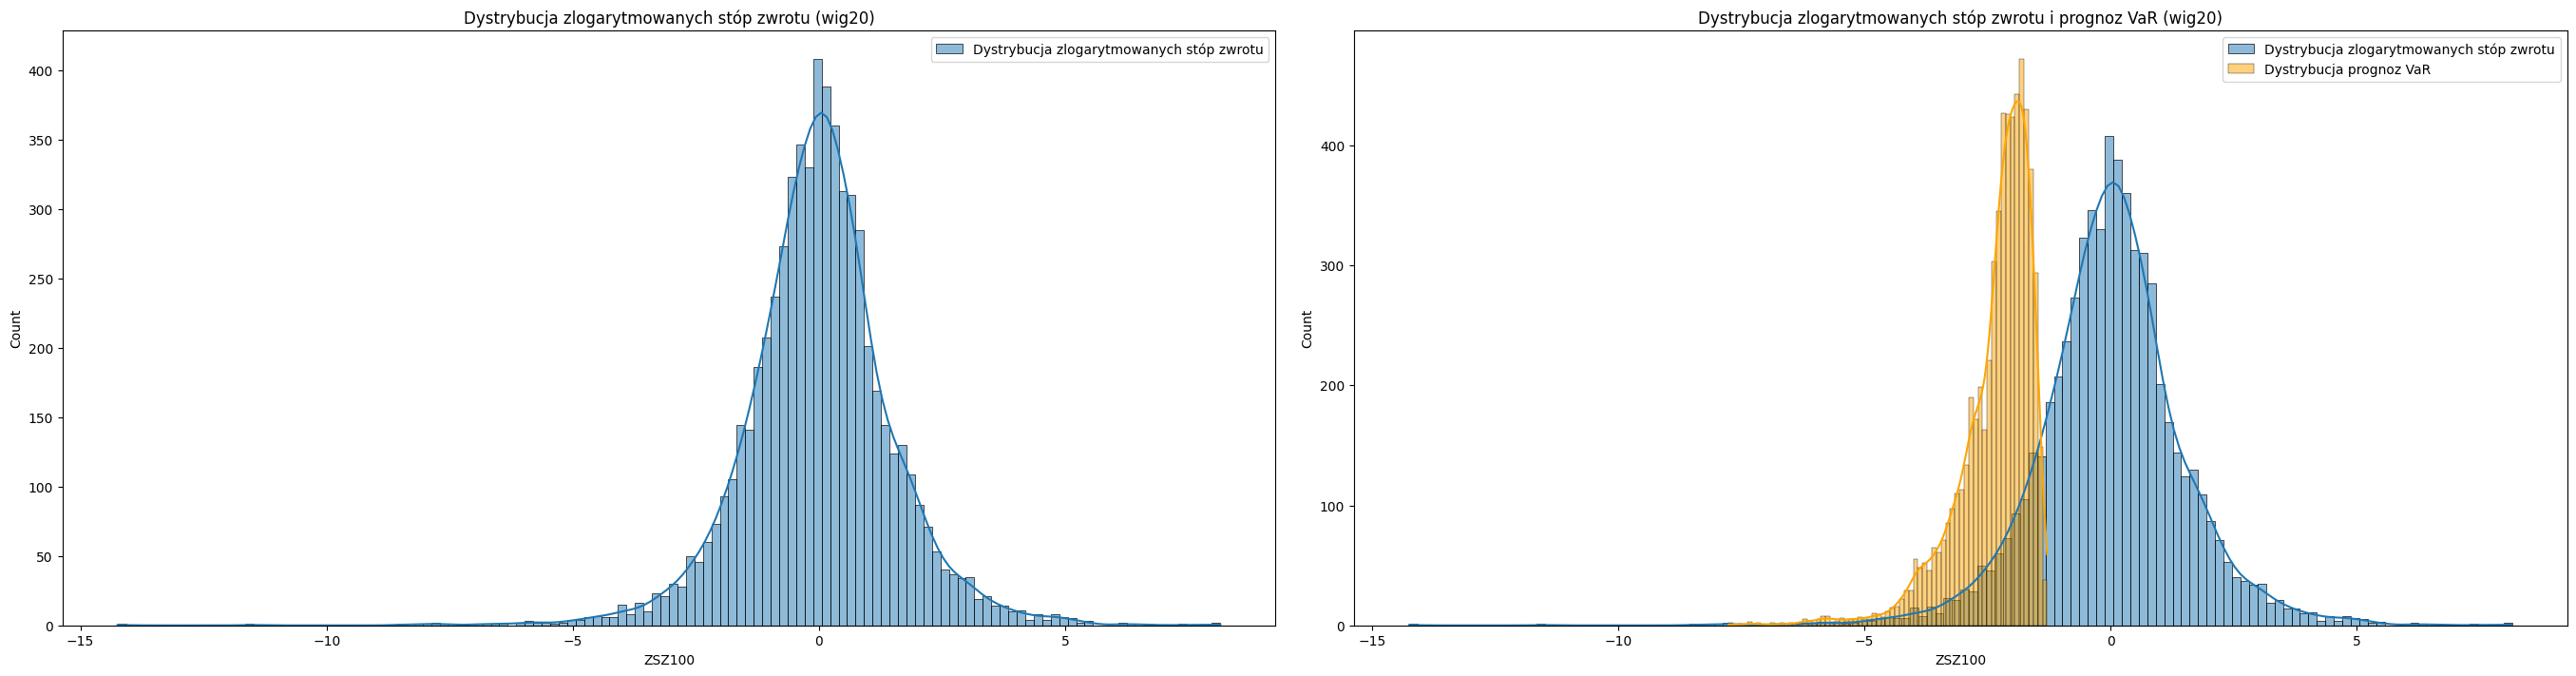

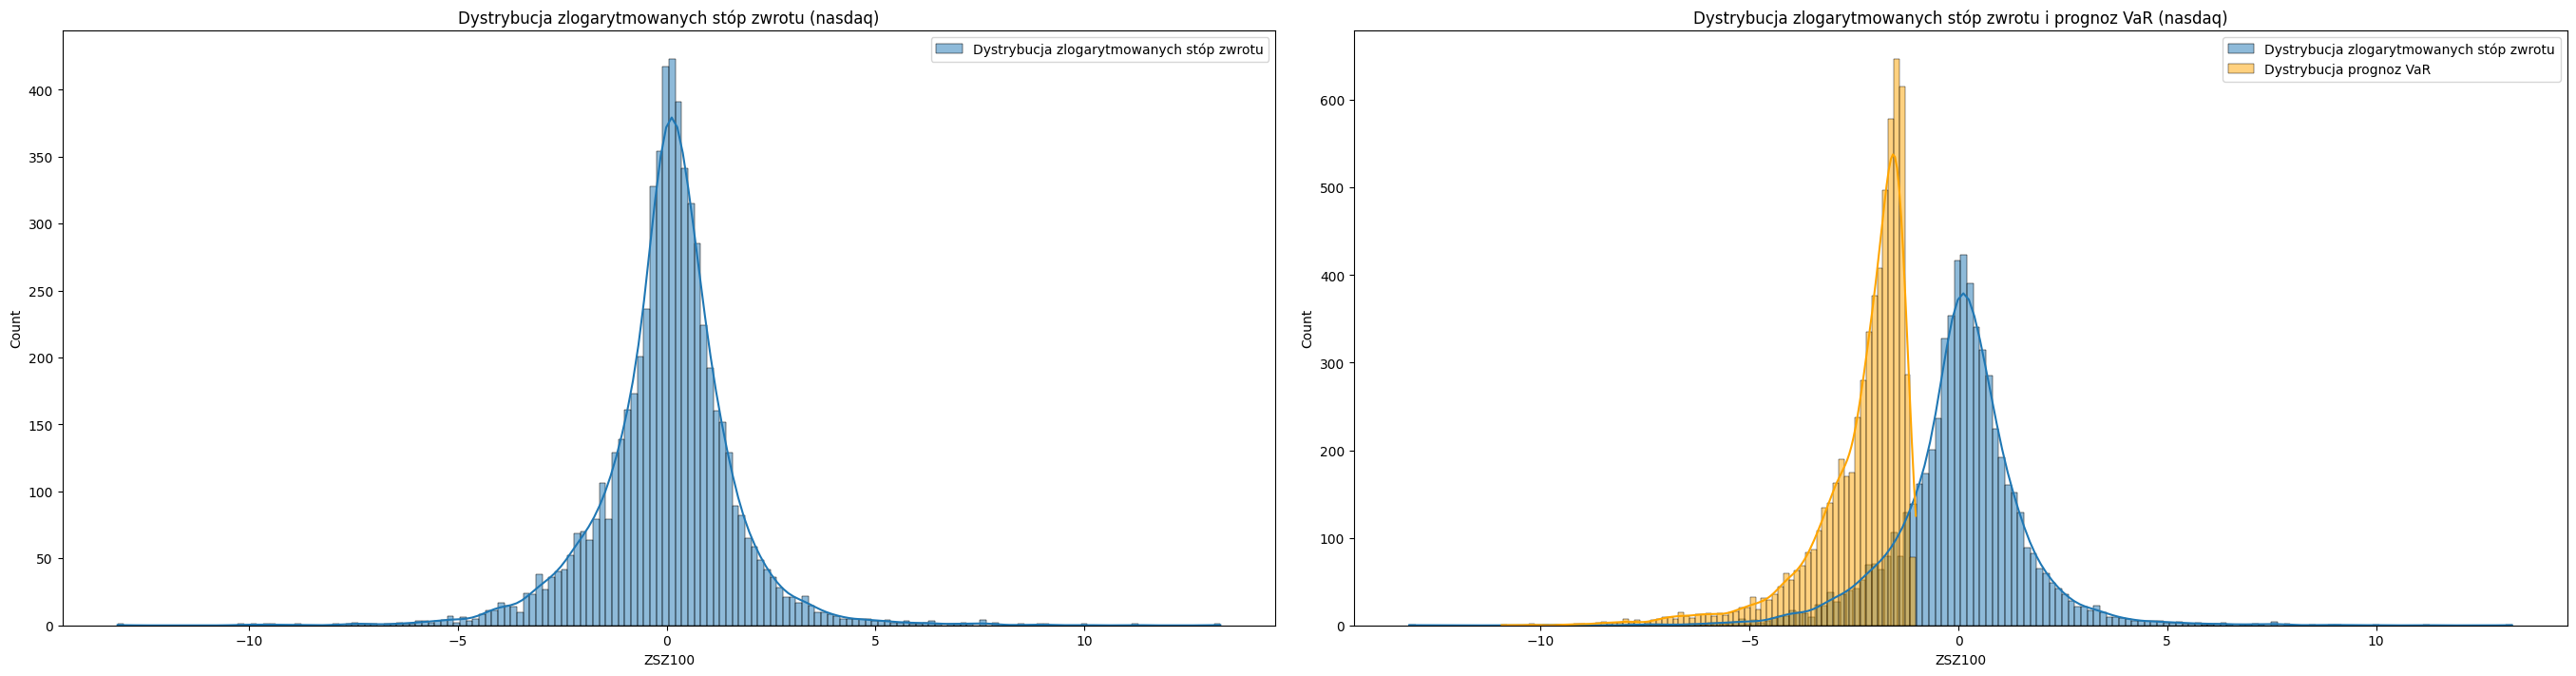

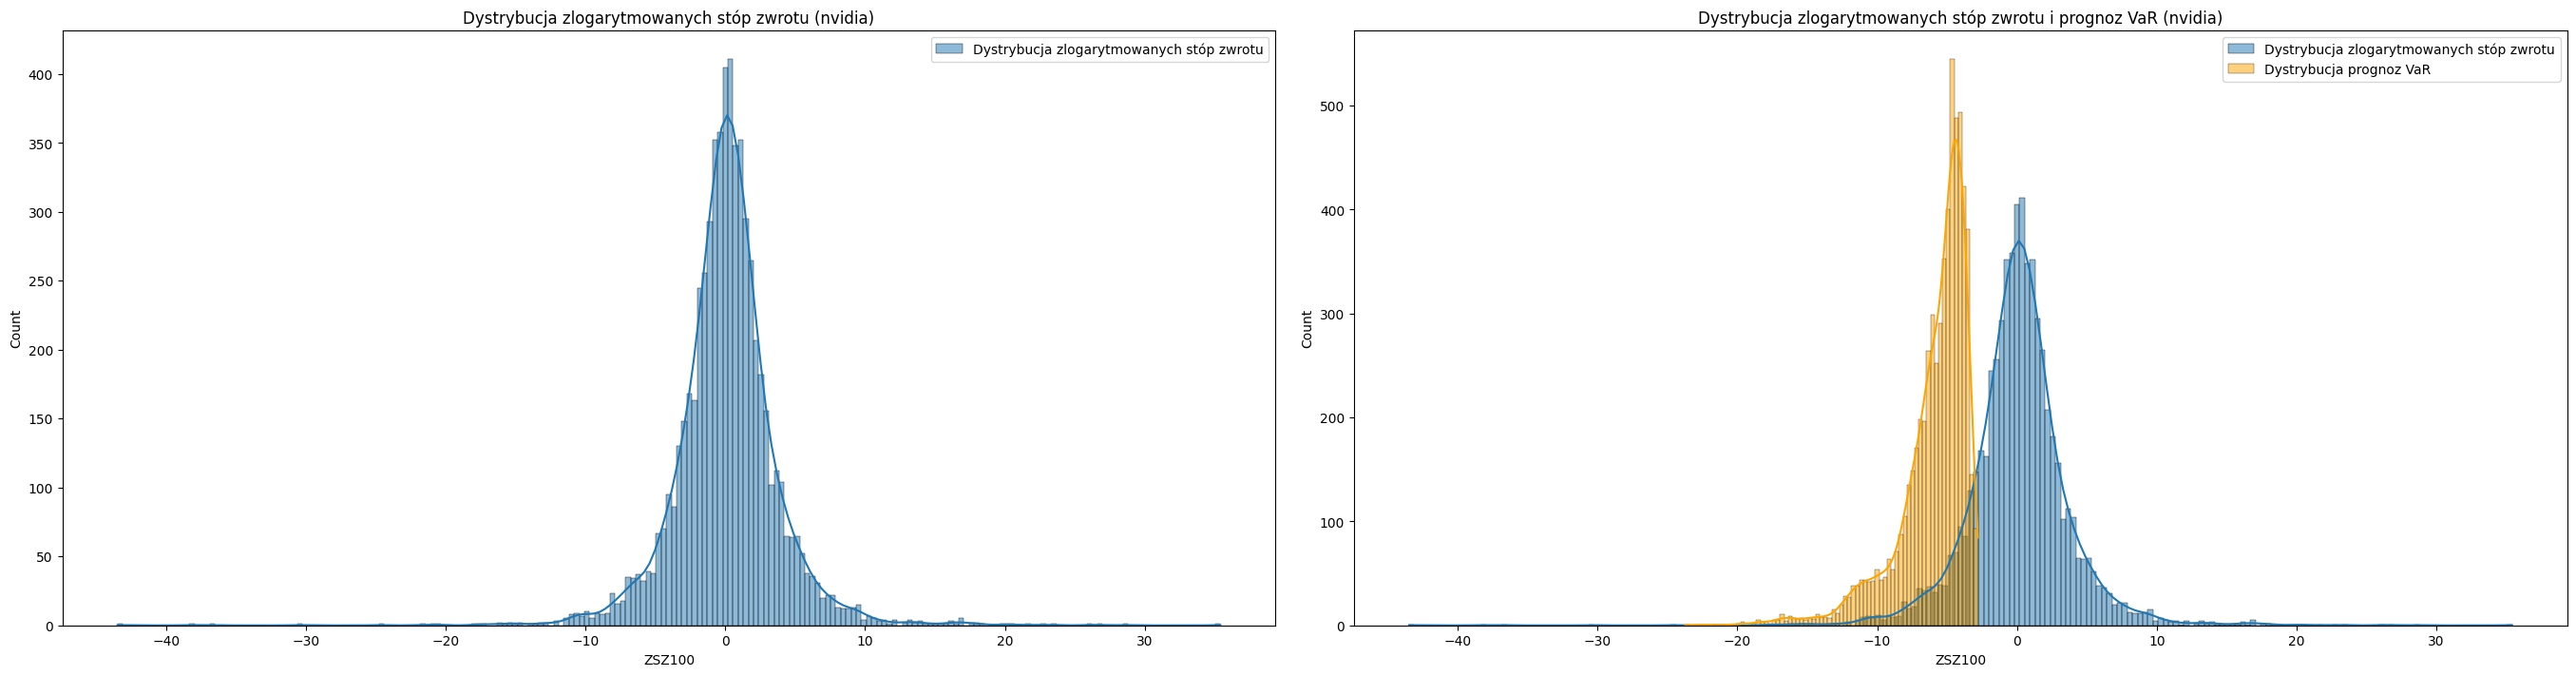

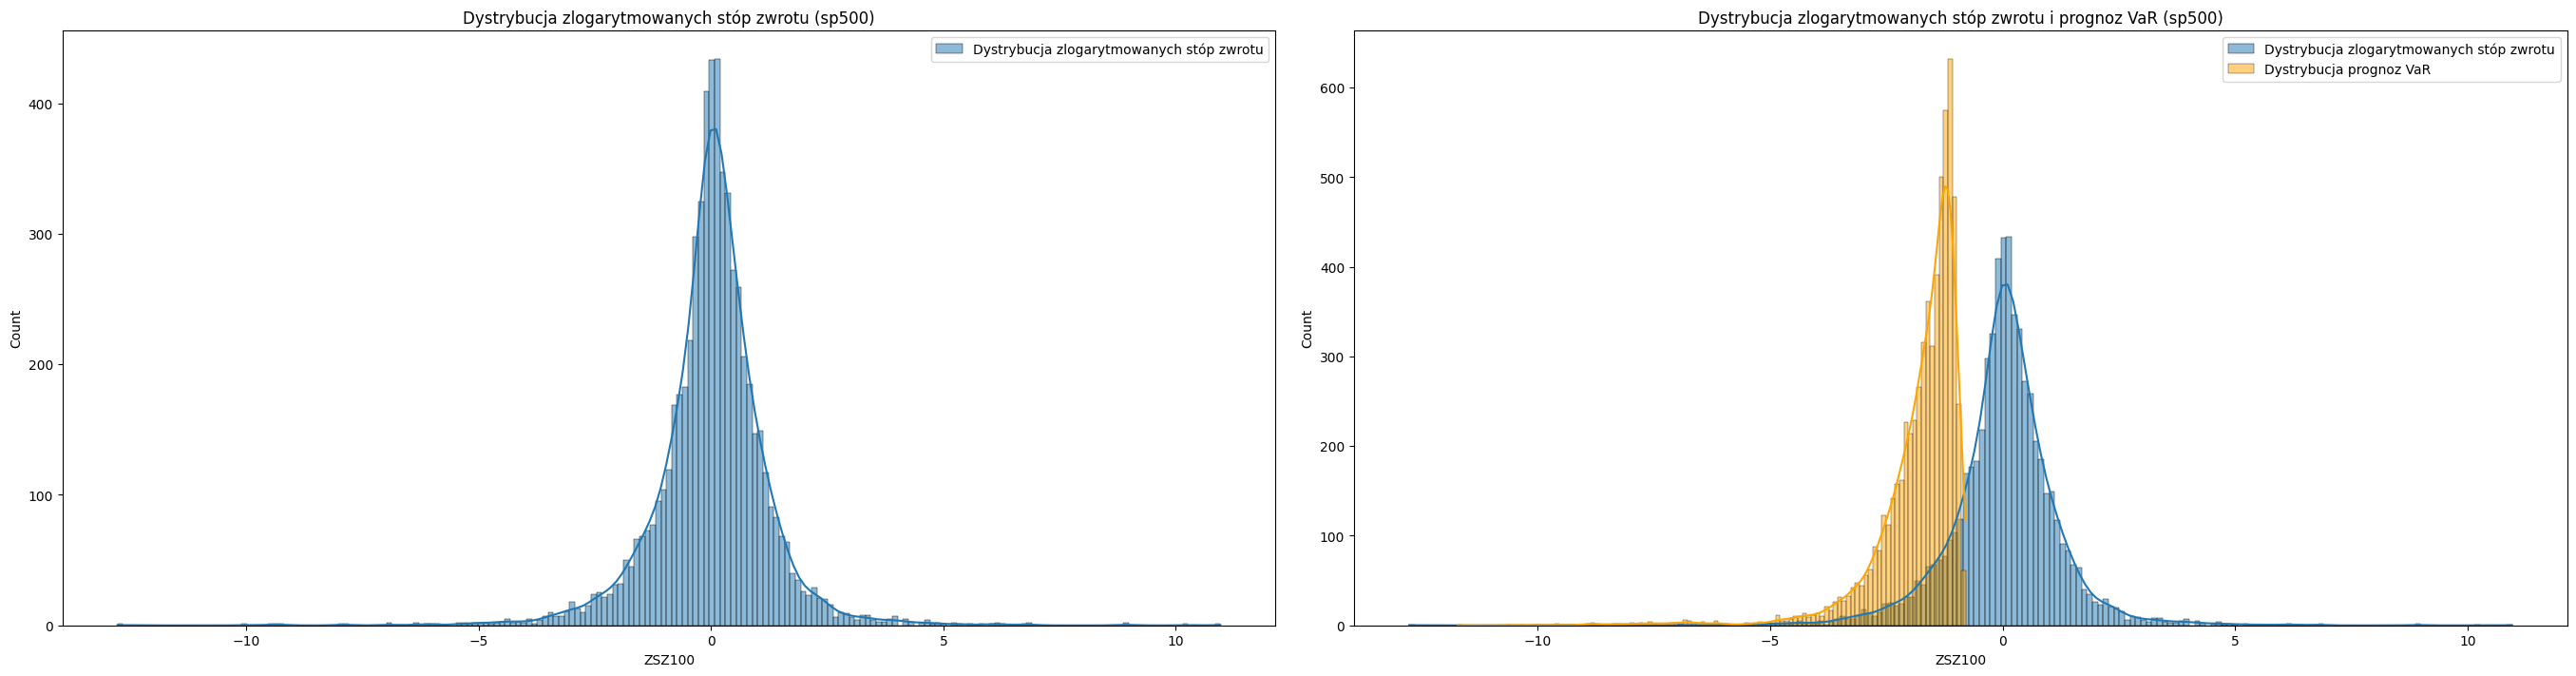

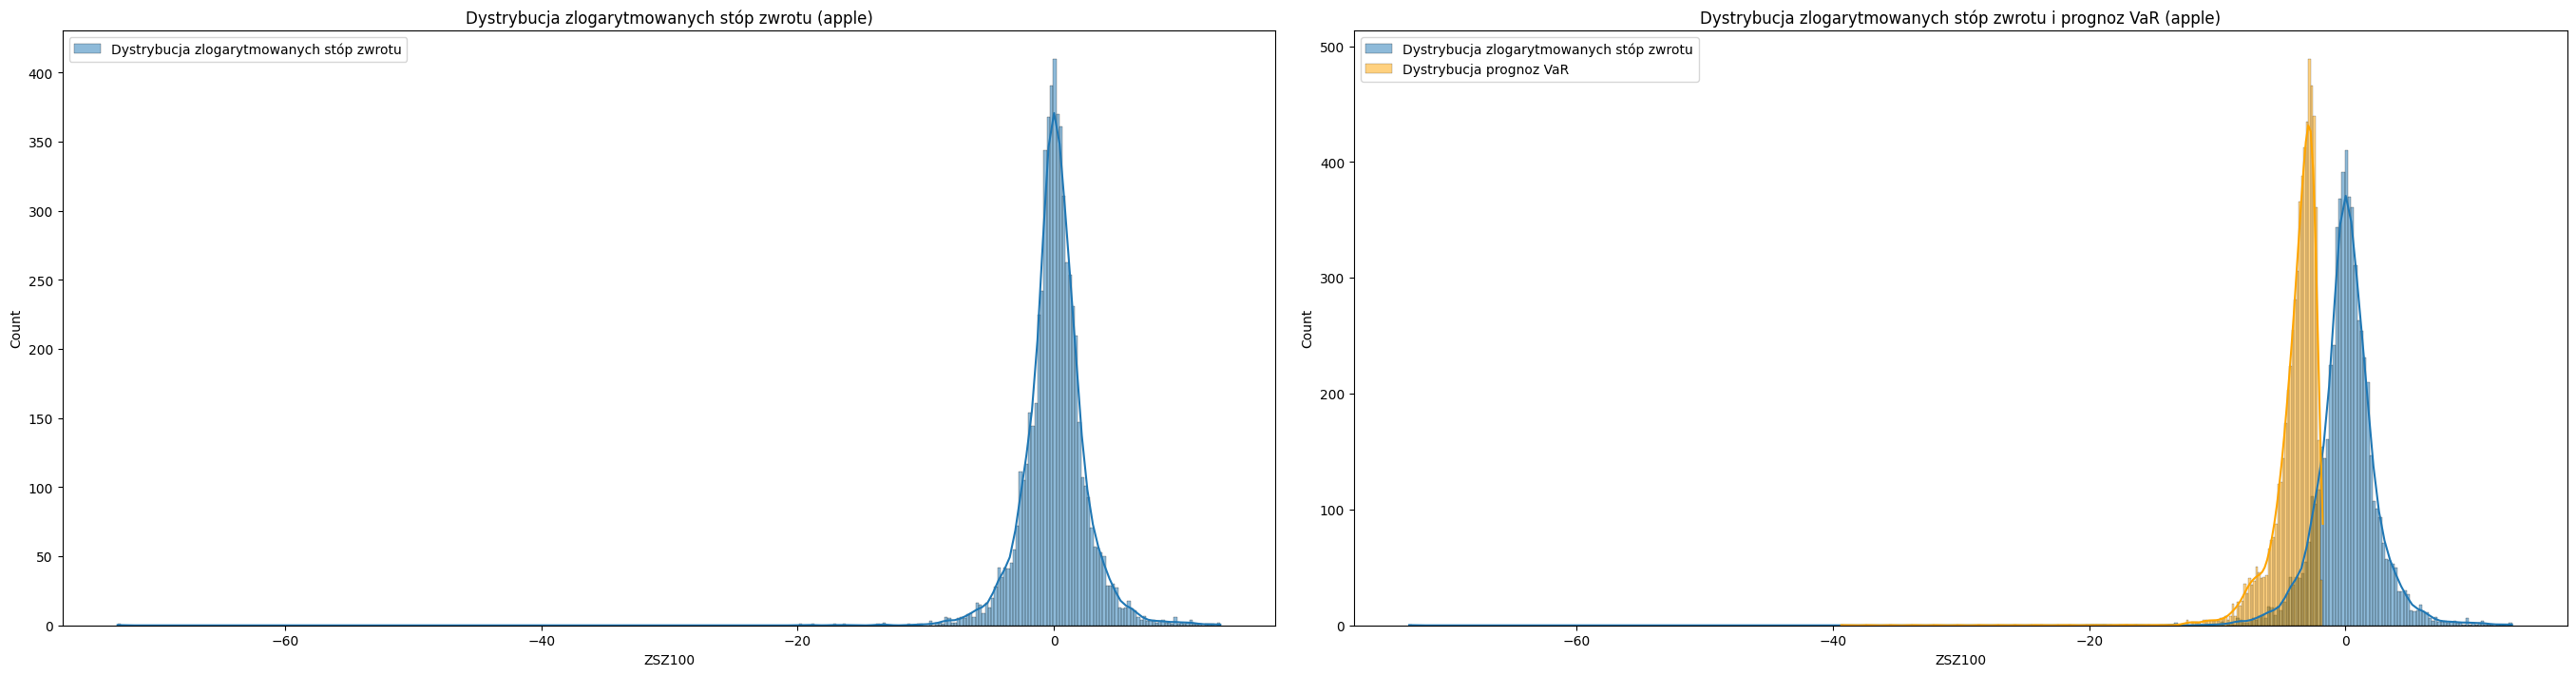

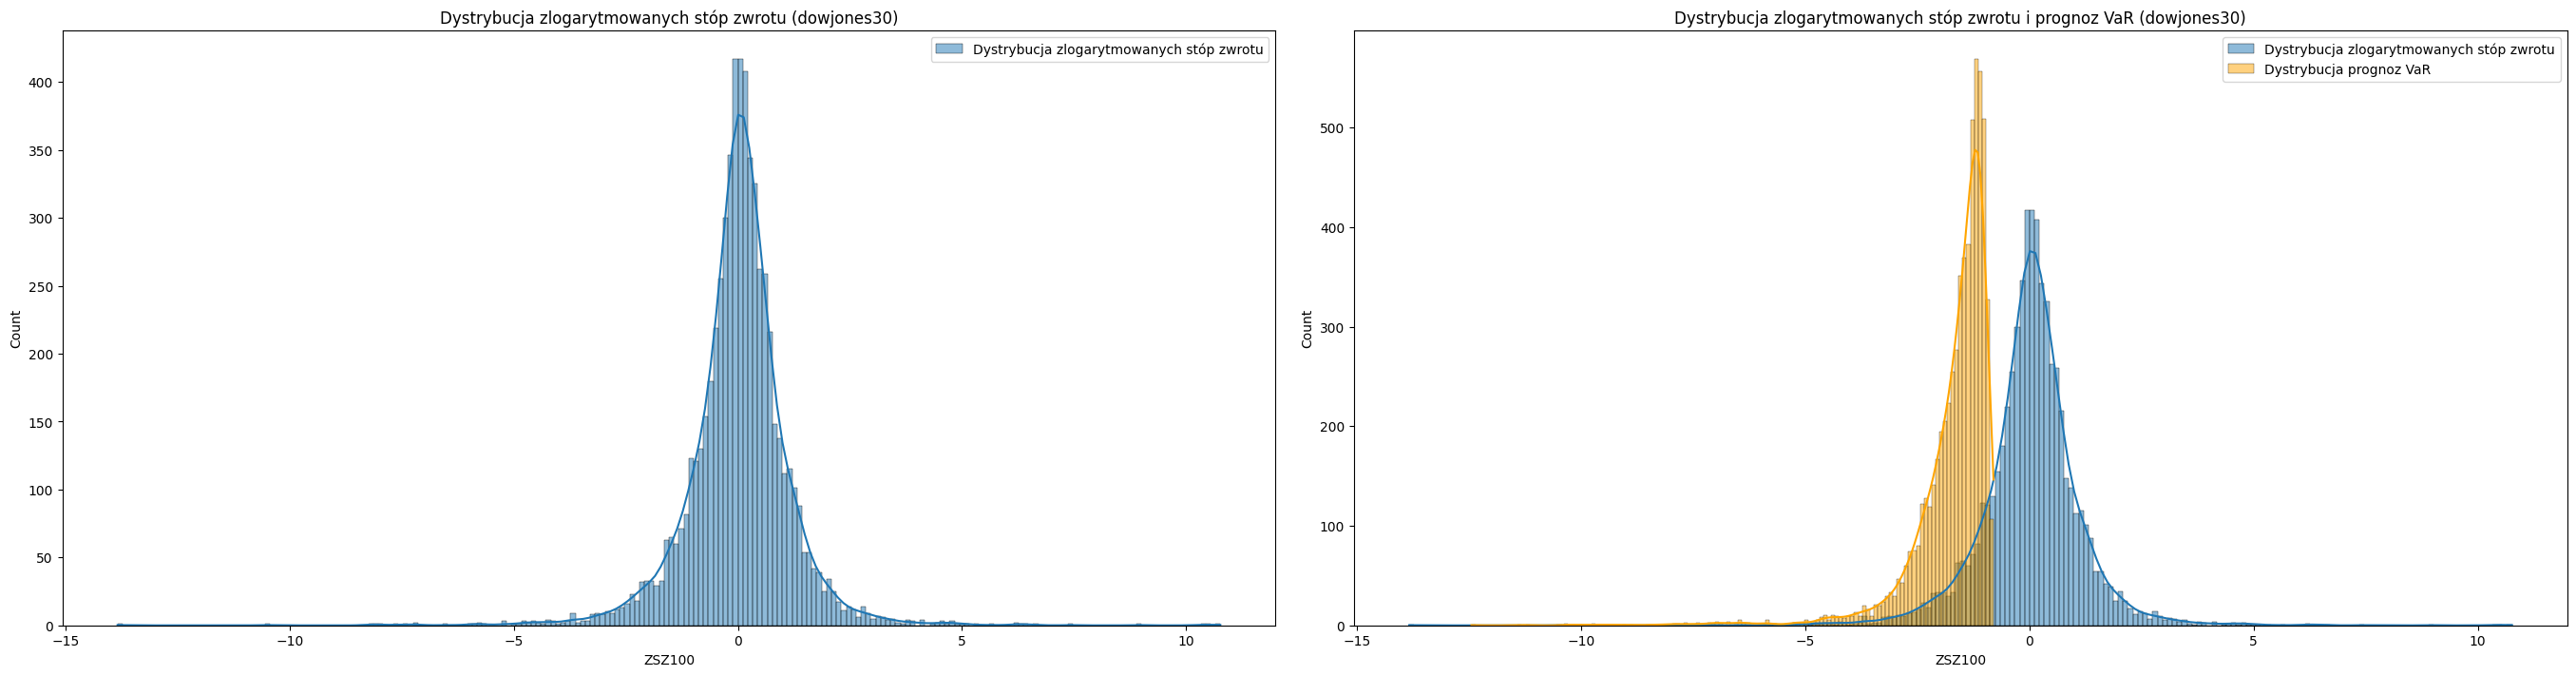

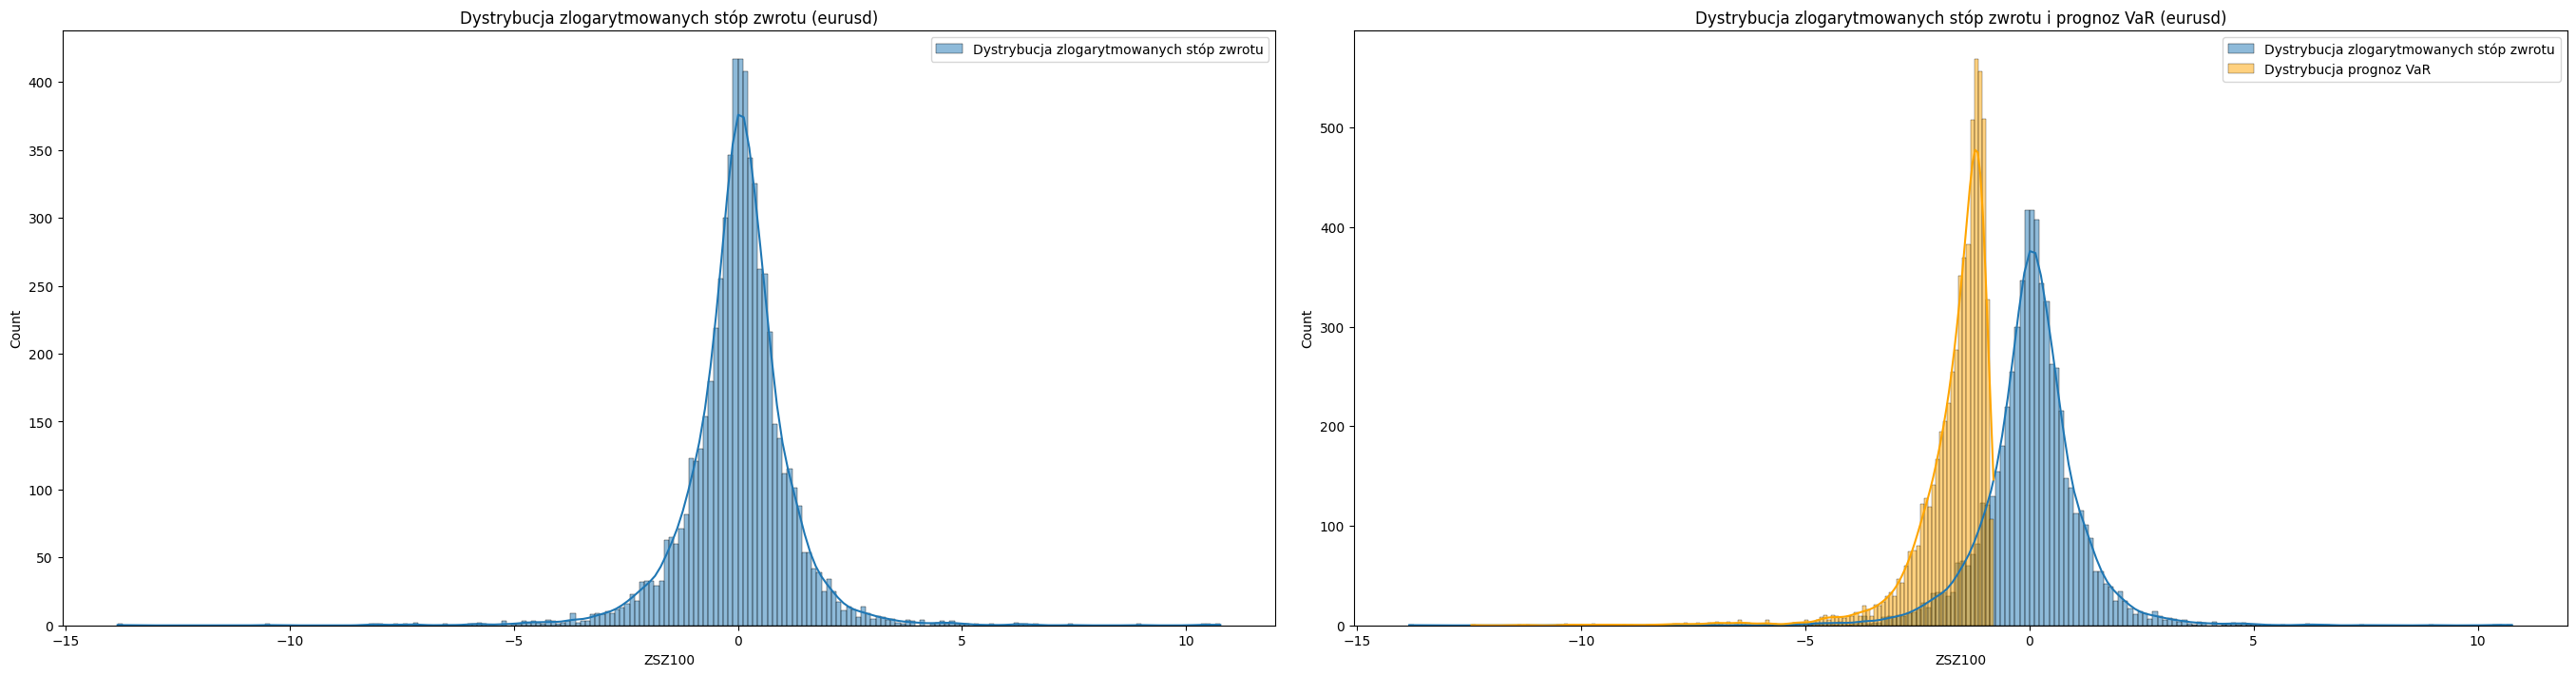

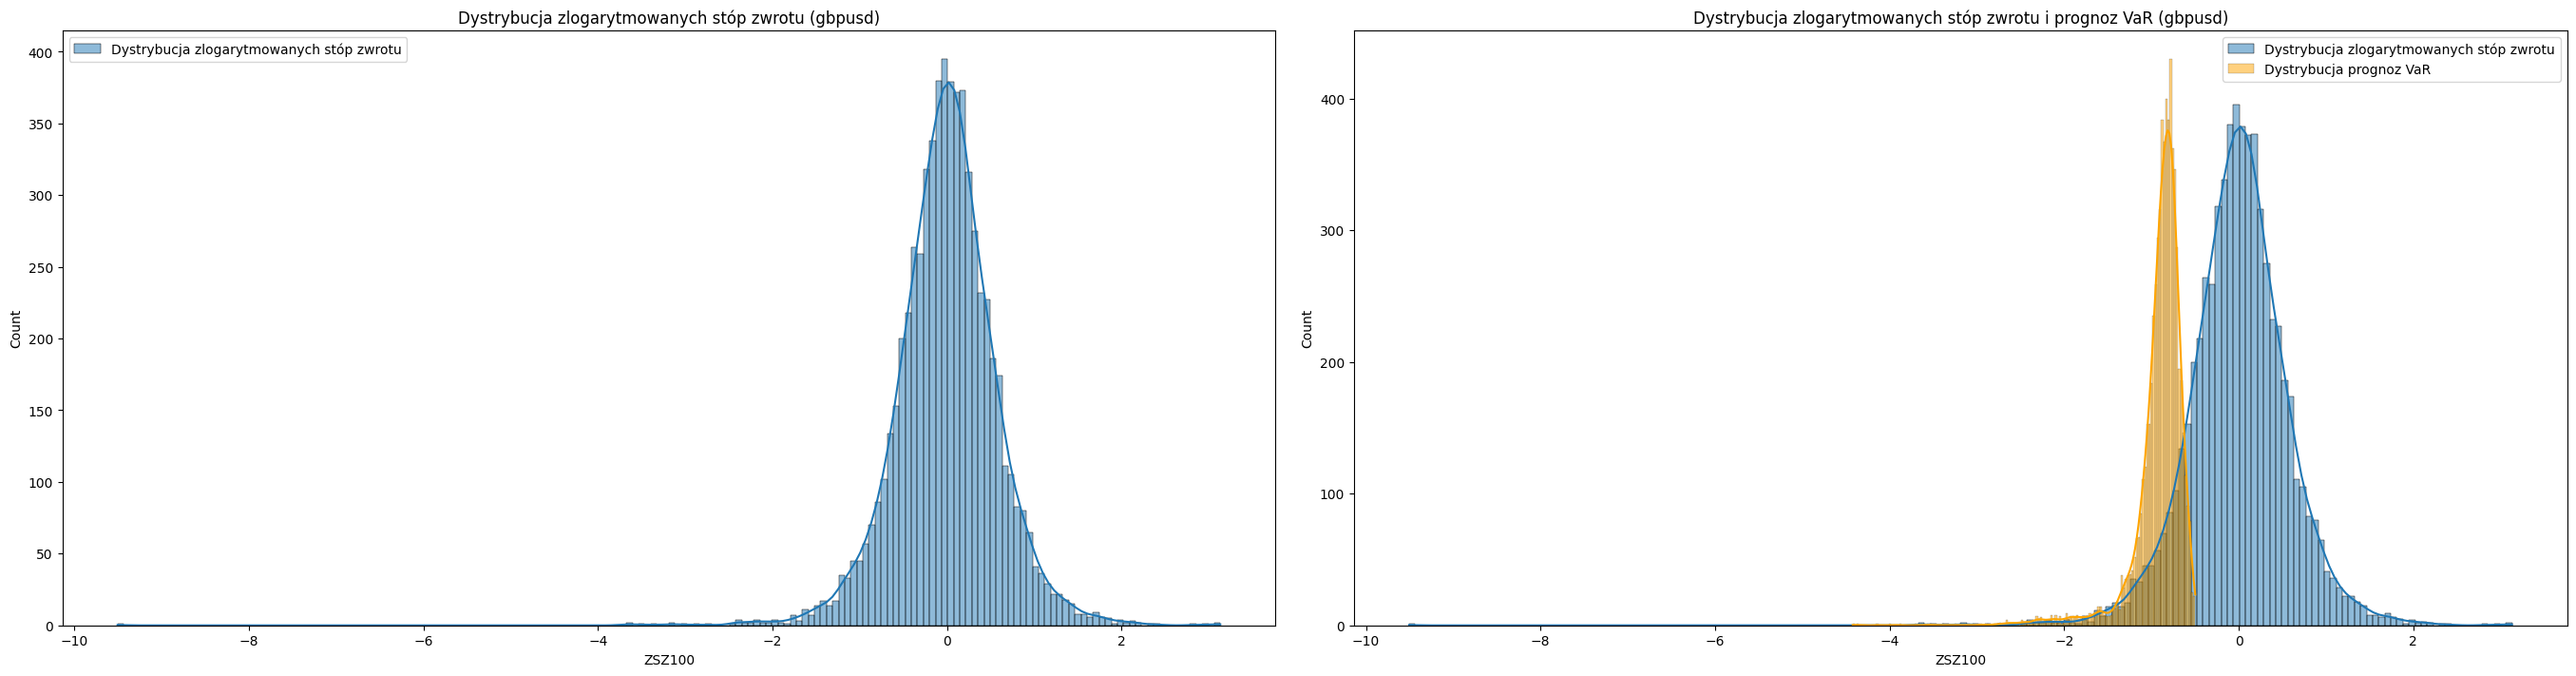

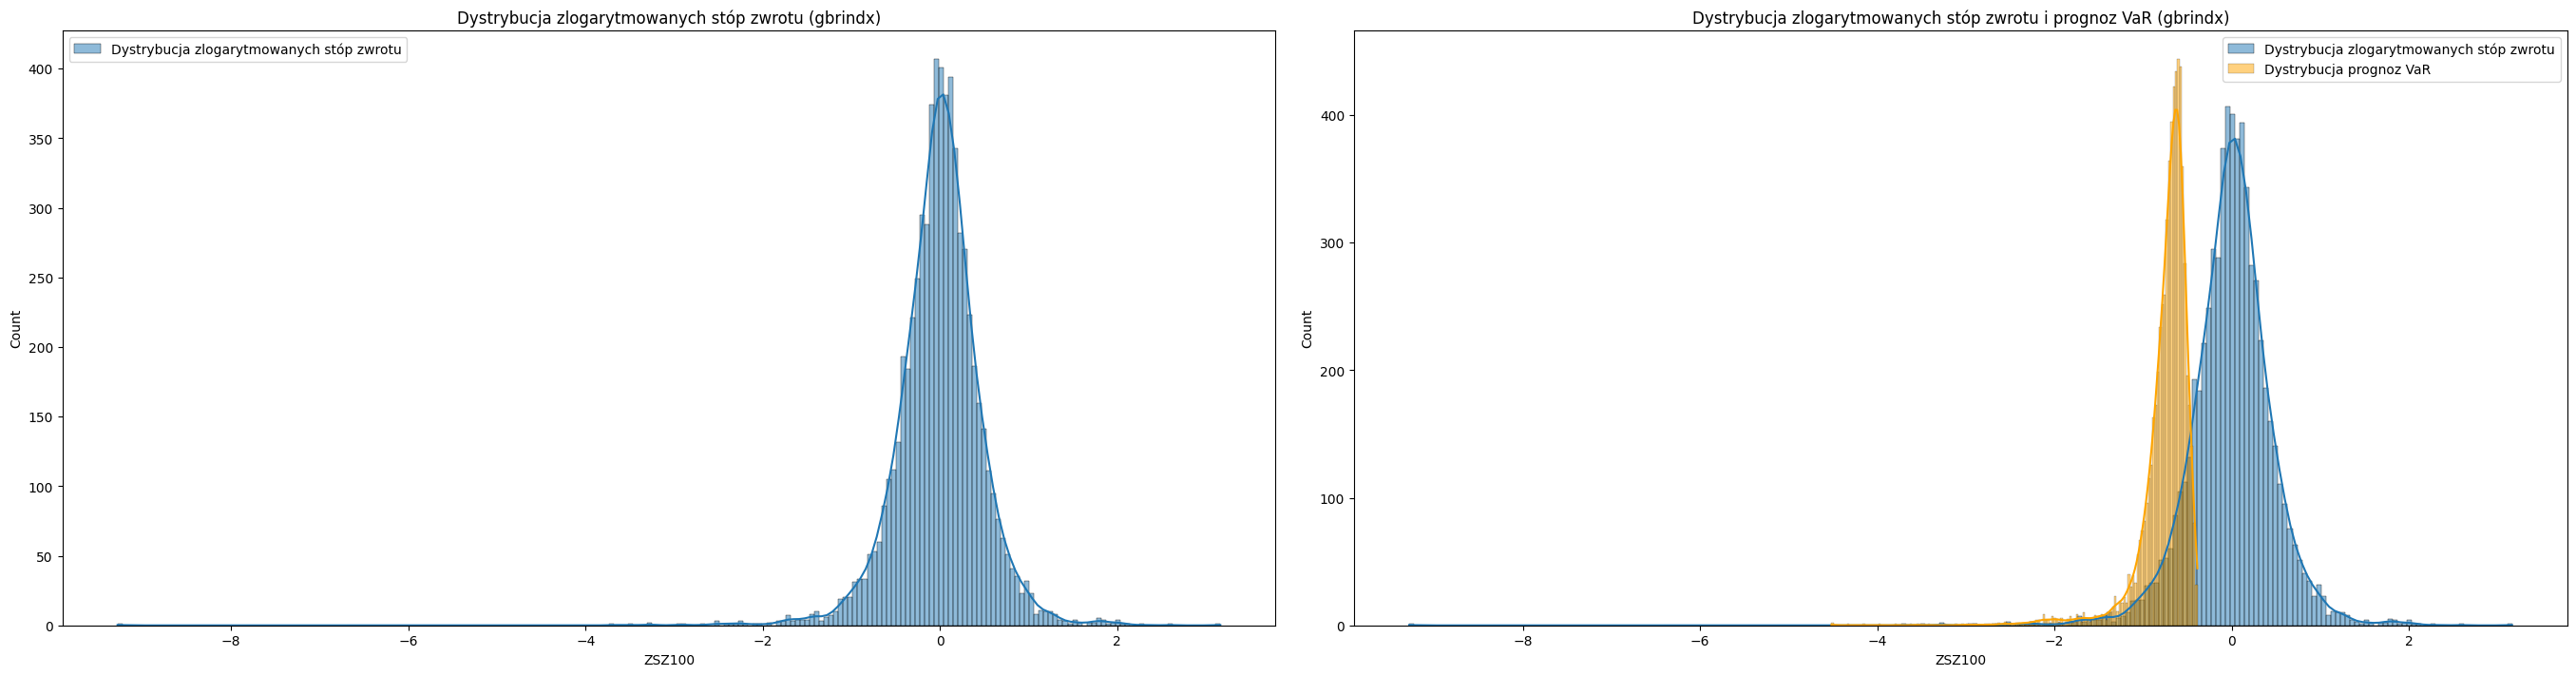

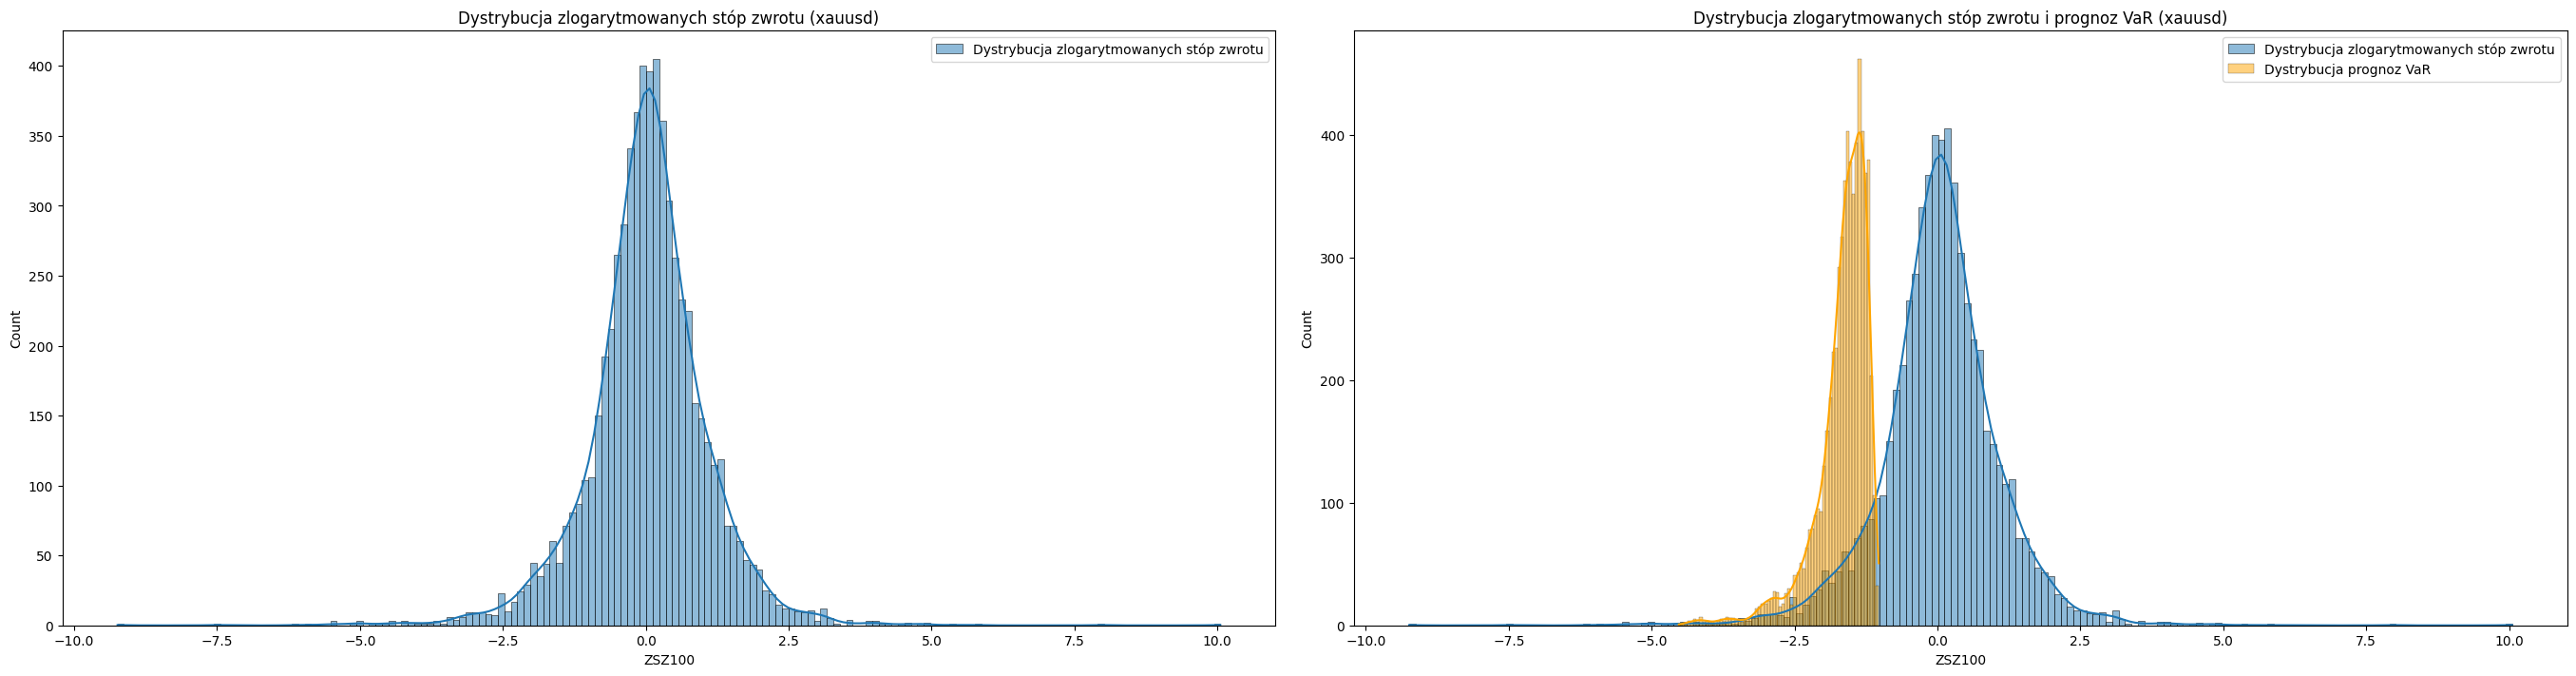

In [35]:
def calculate_dynamic_var(result, confidence_level=0.95):
    forecast = result.forecast(horizon=1, start=0, reindex=False)
    mean_forecasts = forecast.mean.iloc[:, 0]
    variance_forecasts = forecast.variance.iloc[:, 0]
    std_dev_forecasts = np.sqrt(variance_forecasts)
    
    z_score = stats.norm.ppf(1 - confidence_level)
    dynamic_var = -(mean_forecasts - z_score * std_dev_forecasts)

    return dynamic_var

# Obliczanie dynamicznego VaR dla każdego instrumentu
for df, name in zip(instruments, instrument_names):
    # Rzeczywiste zwroty
    returns = df['ZSZ100']

    result = estimate_garch_model(df) # Dopasowanie modelu GARCH

    var_forecasts = calculate_dynamic_var(result) # Dynamiczny VaR
    var_forecasts = pd.Series(var_forecasts.values, index=returns.index) # Dopasowanie indeksów
    var_forecasts = var_forecasts[1:]

    fig, axes = plt.subplots(1, 2, figsize=(27, 7), constrained_layout=True)
    
    # Histogram znormalizowanych reszt
    sns.histplot(returns, kde=True, label="Dystrybucja zlogarytmowanych stóp zwrotu", ax=axes[0])
    axes[0].legend()
    axes[0].set_title(f"Dystrybucja zlogarytmowanych stóp zwrotu ({name})")
    
    # Histogram zwrotów i prognoz VaR
    sns.histplot(returns, kde=True, label='Dystrybucja zlogarytmowanych stóp zwrotu', ax=axes[1])
    sns.histplot(var_forecasts, kde=True, label='Dystrybucja prognoz VaR', color='orange', ax=axes[1])
    axes[1].legend()
    axes[1].set_title(f"Dystrybucja zlogarytmowanych stóp zwrotu i prognoz VaR ({name})")
    
    plt.show()

Lewy wykres: Dystrybucja zlogarytmowanych stóp zwrotu
- Histogram ilustruje rozkład zlogarytmowanych stóp zwrotu dla danego instrumentu.
- Na podstawie kształtu tego wykresu można ocenić symetrię rozkładu oraz obecność anomalii, takich jak „grube ogony” (outliers), które wskazują na duże zmiany cen.
- Gęstość (krzywa) nad histogramem pozwala na porównanie rzeczywistego rozkładu zwrotów z teoretycznym rozkładem normalnym.

Prawy wykres: Dystrybucja zlogarytmowanych stóp zwrotu i prognoz VaR
- Histogram zwrotów przedstawia te same dane co na lewym wykresie, ale w połączeniu z prognozowanymi wartościami VaR (Value at Risk), które zostały obliczone dynamicznie przy użyciu modelu AR(1)-GARCH(1,1).
- Pomarańczowy histogram pokazuje rozkład prognozowanych wartości VaR, które reprezentują granice ryzyka przy danym poziomie ufności (np. 95%).
- Wartości VaR powinny w większości przypadków znajdować się poniżej najniższych zwrotów, wskazując na poziom potencjalnej straty w najgorszym scenariuszu.

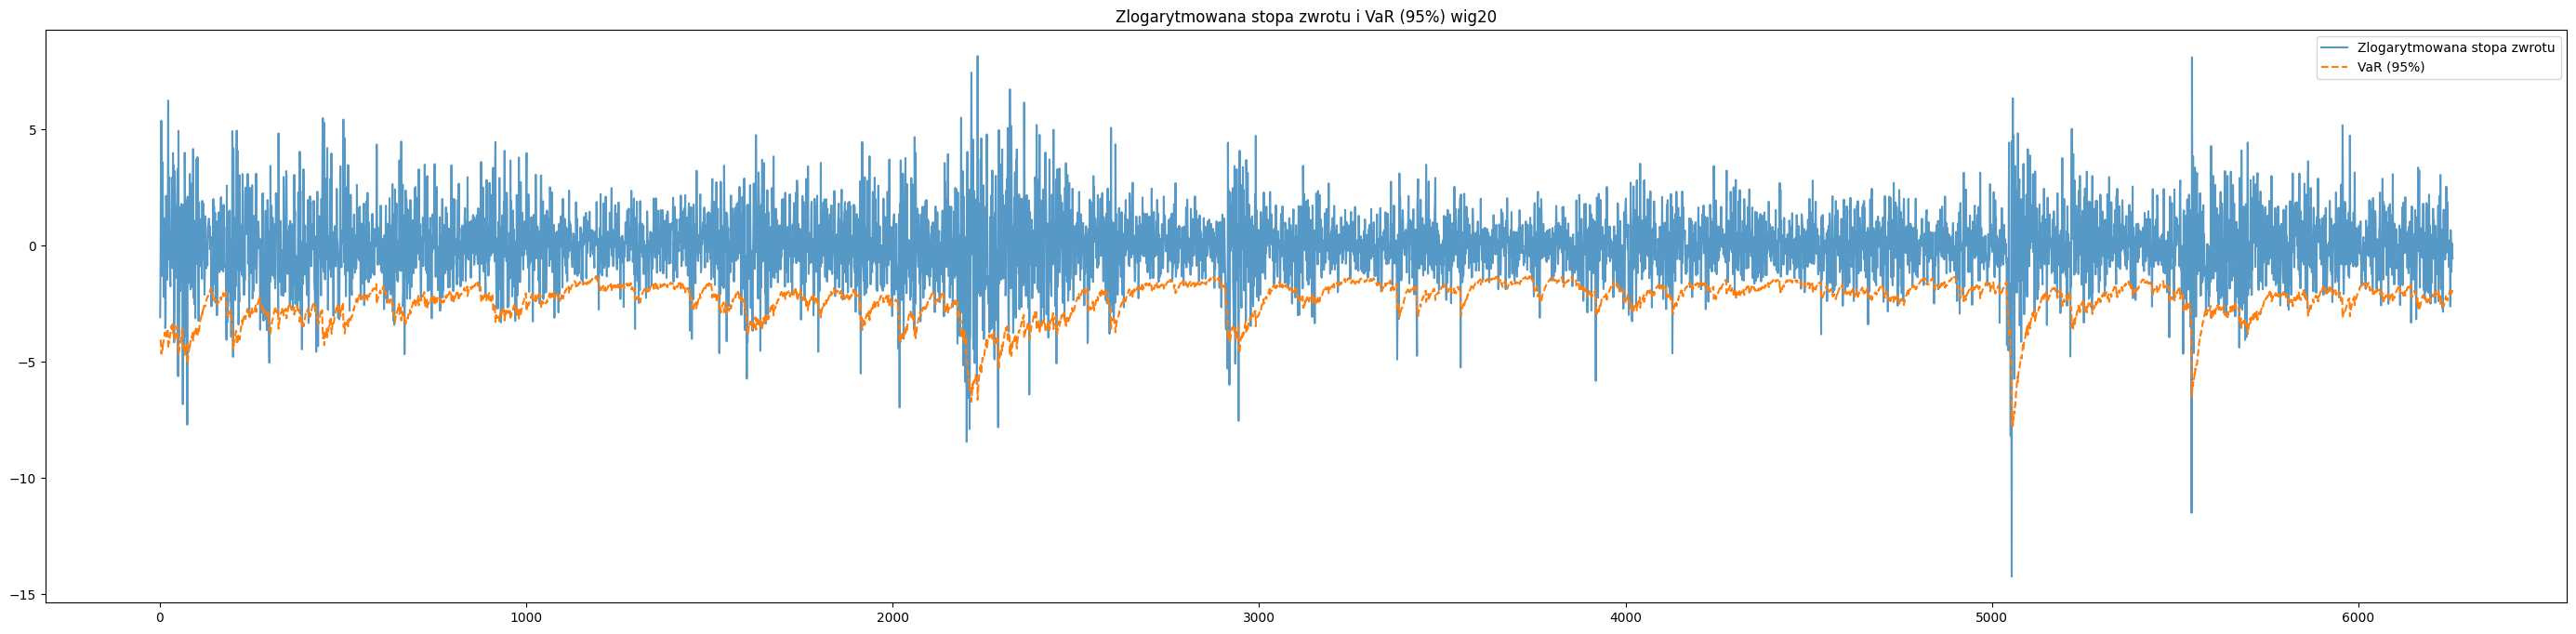

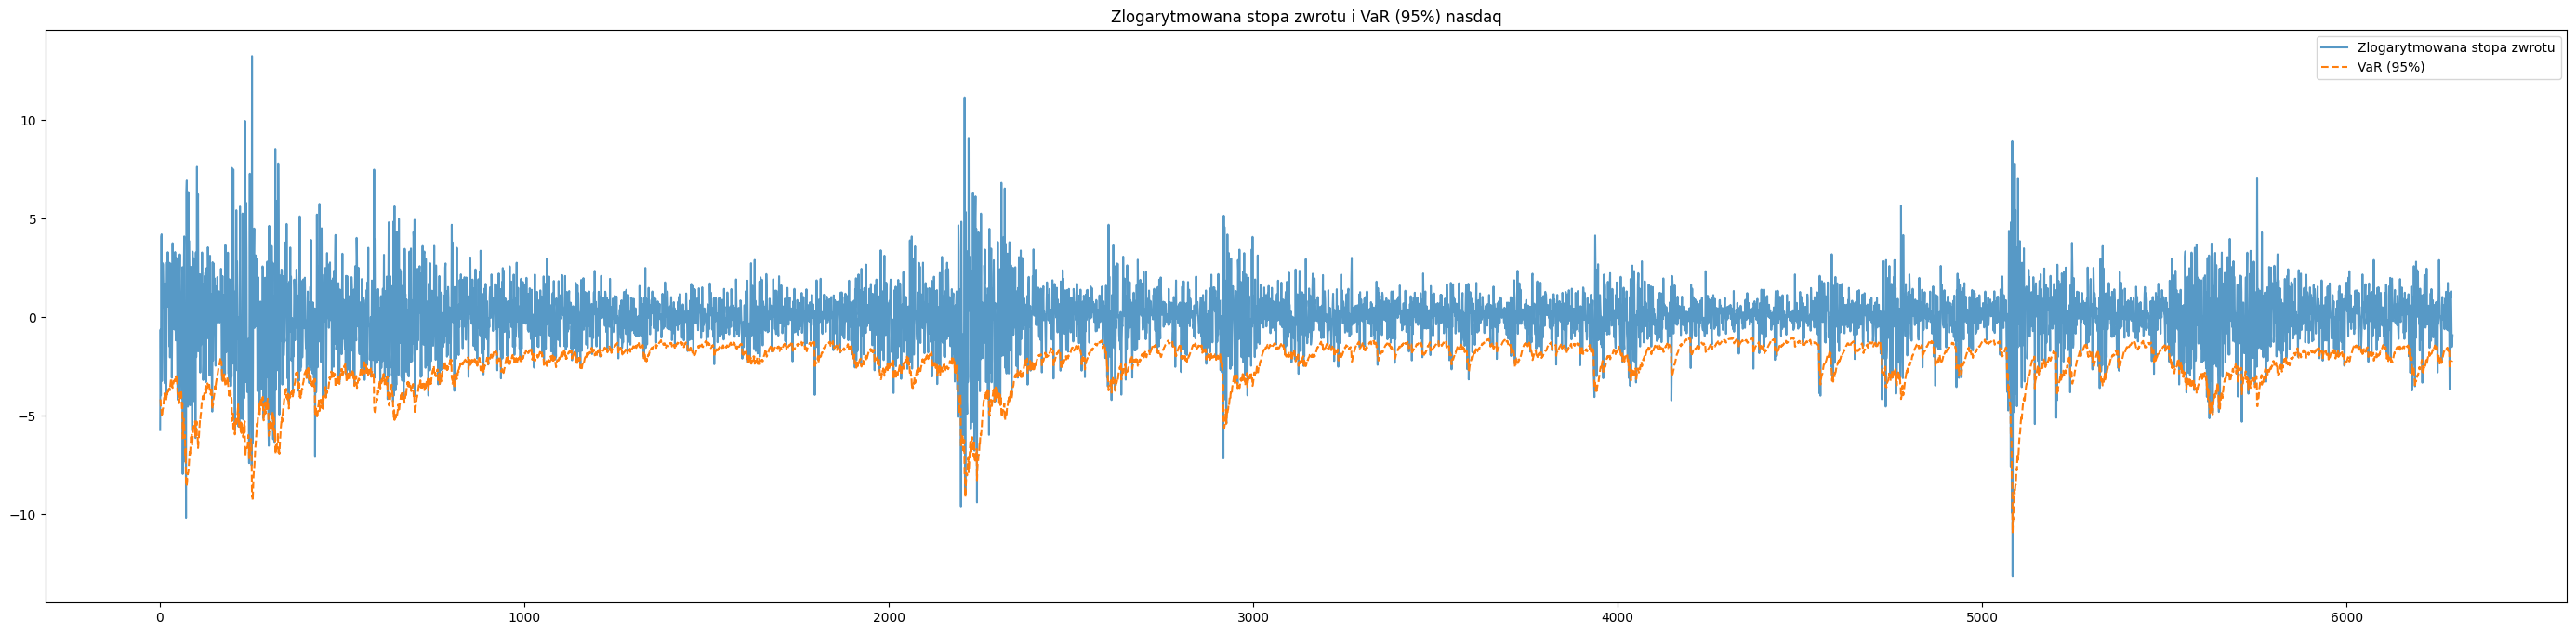

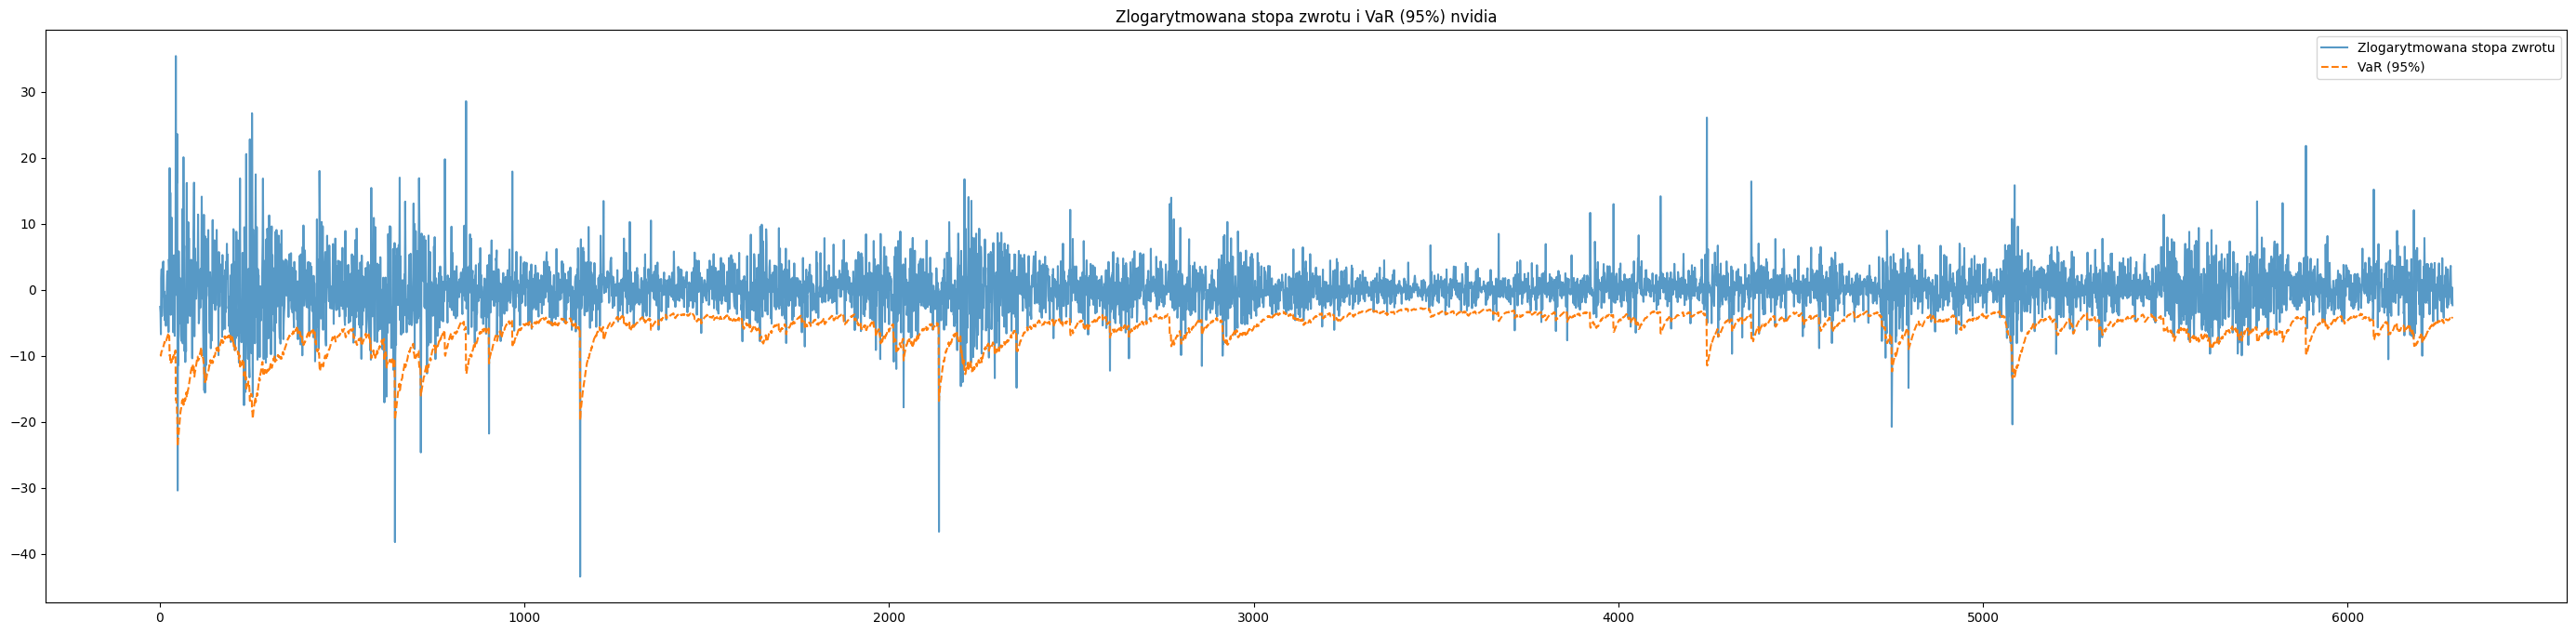

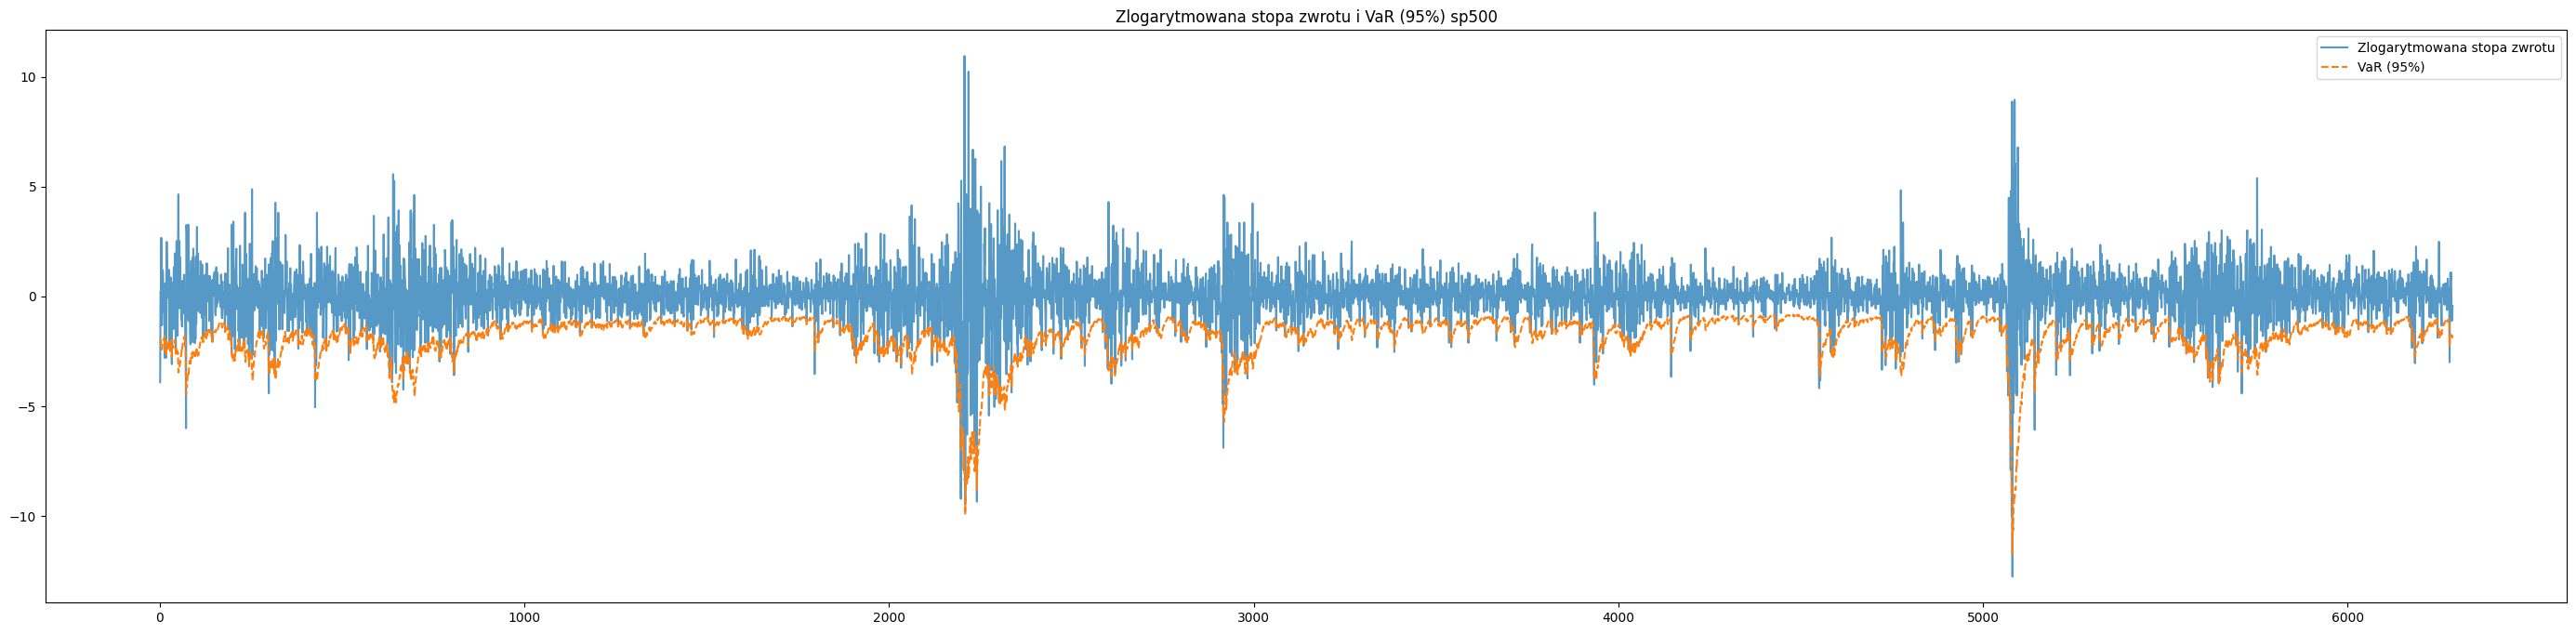

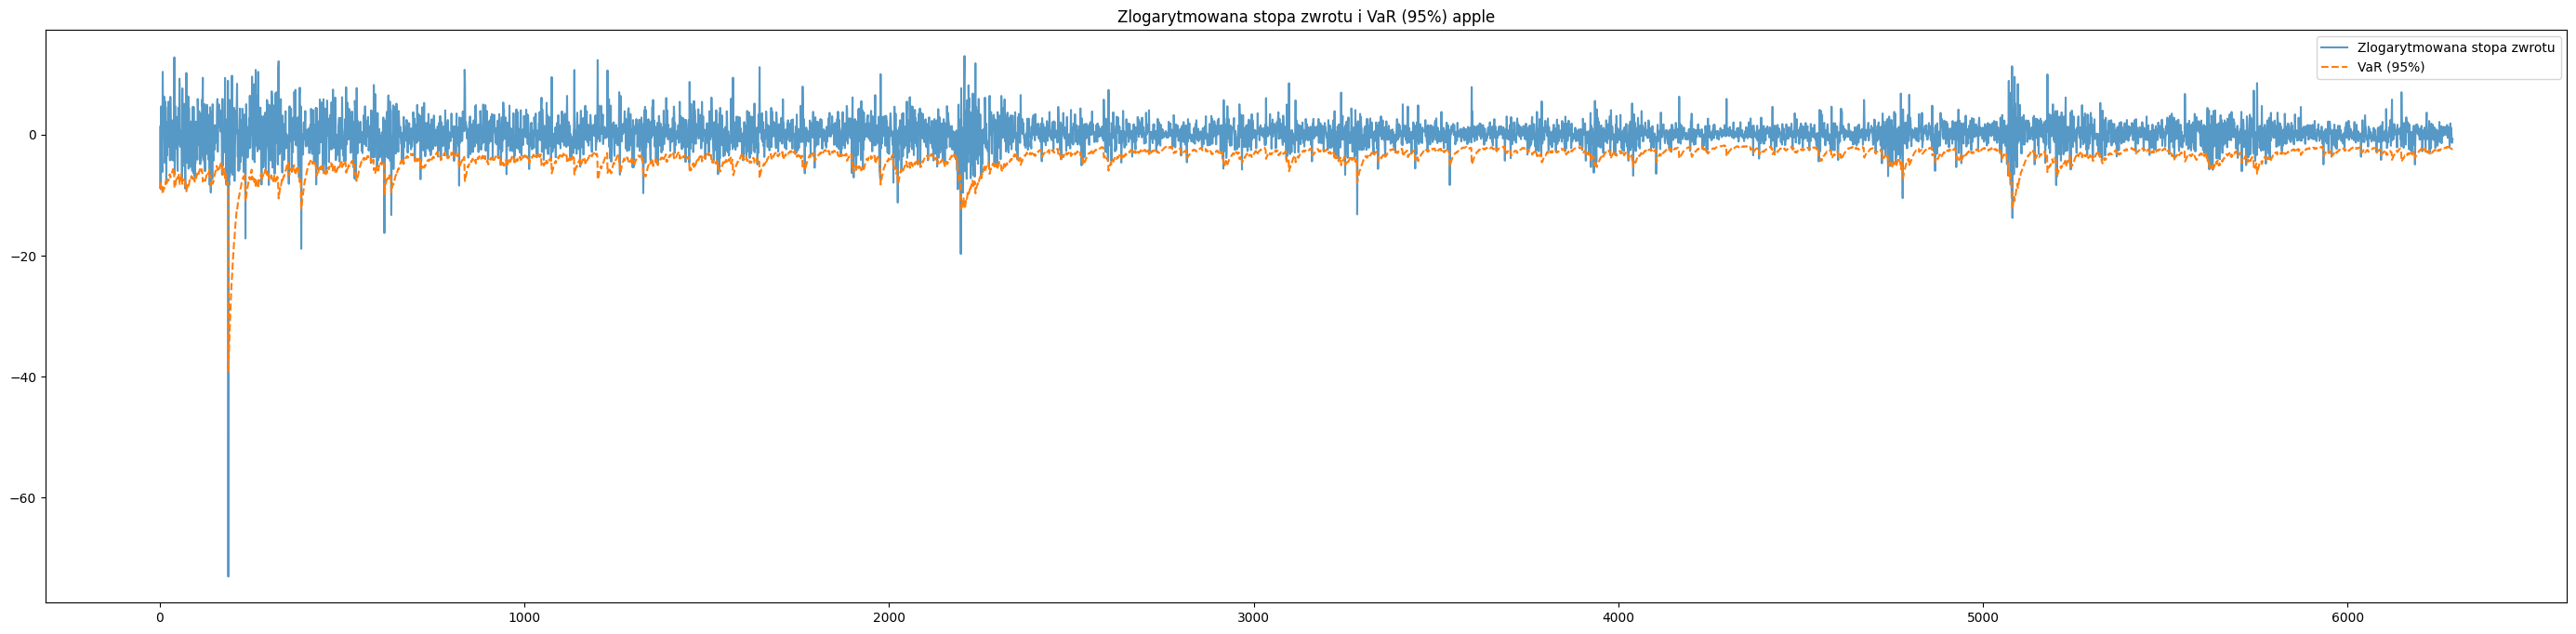

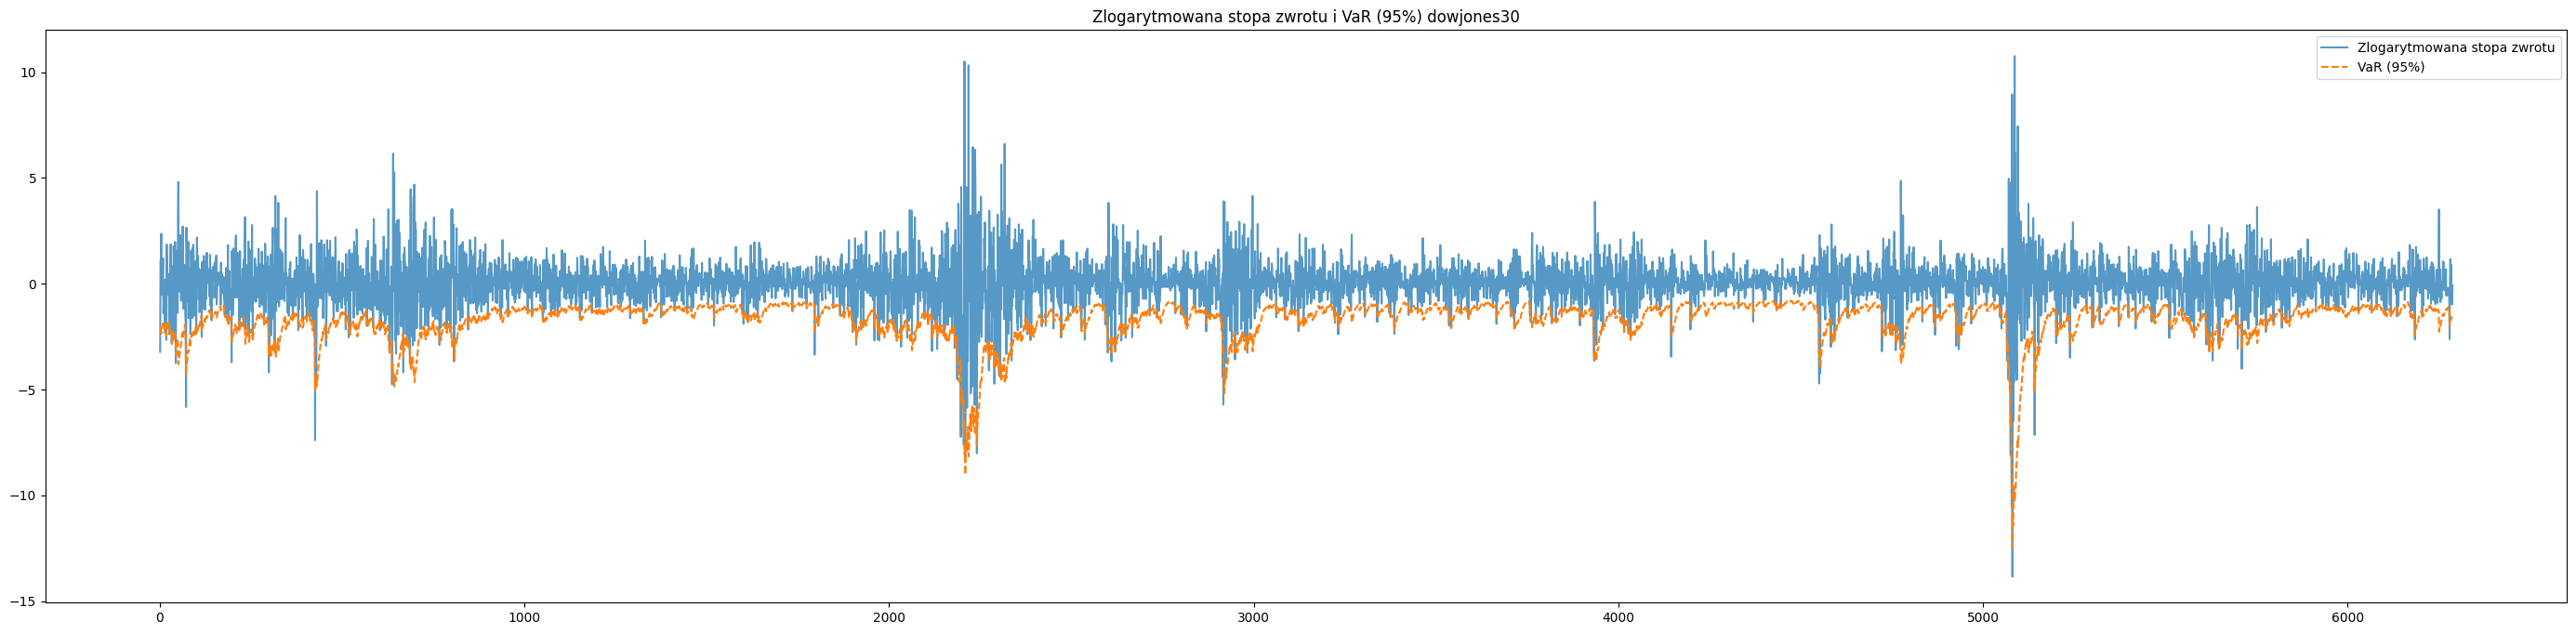

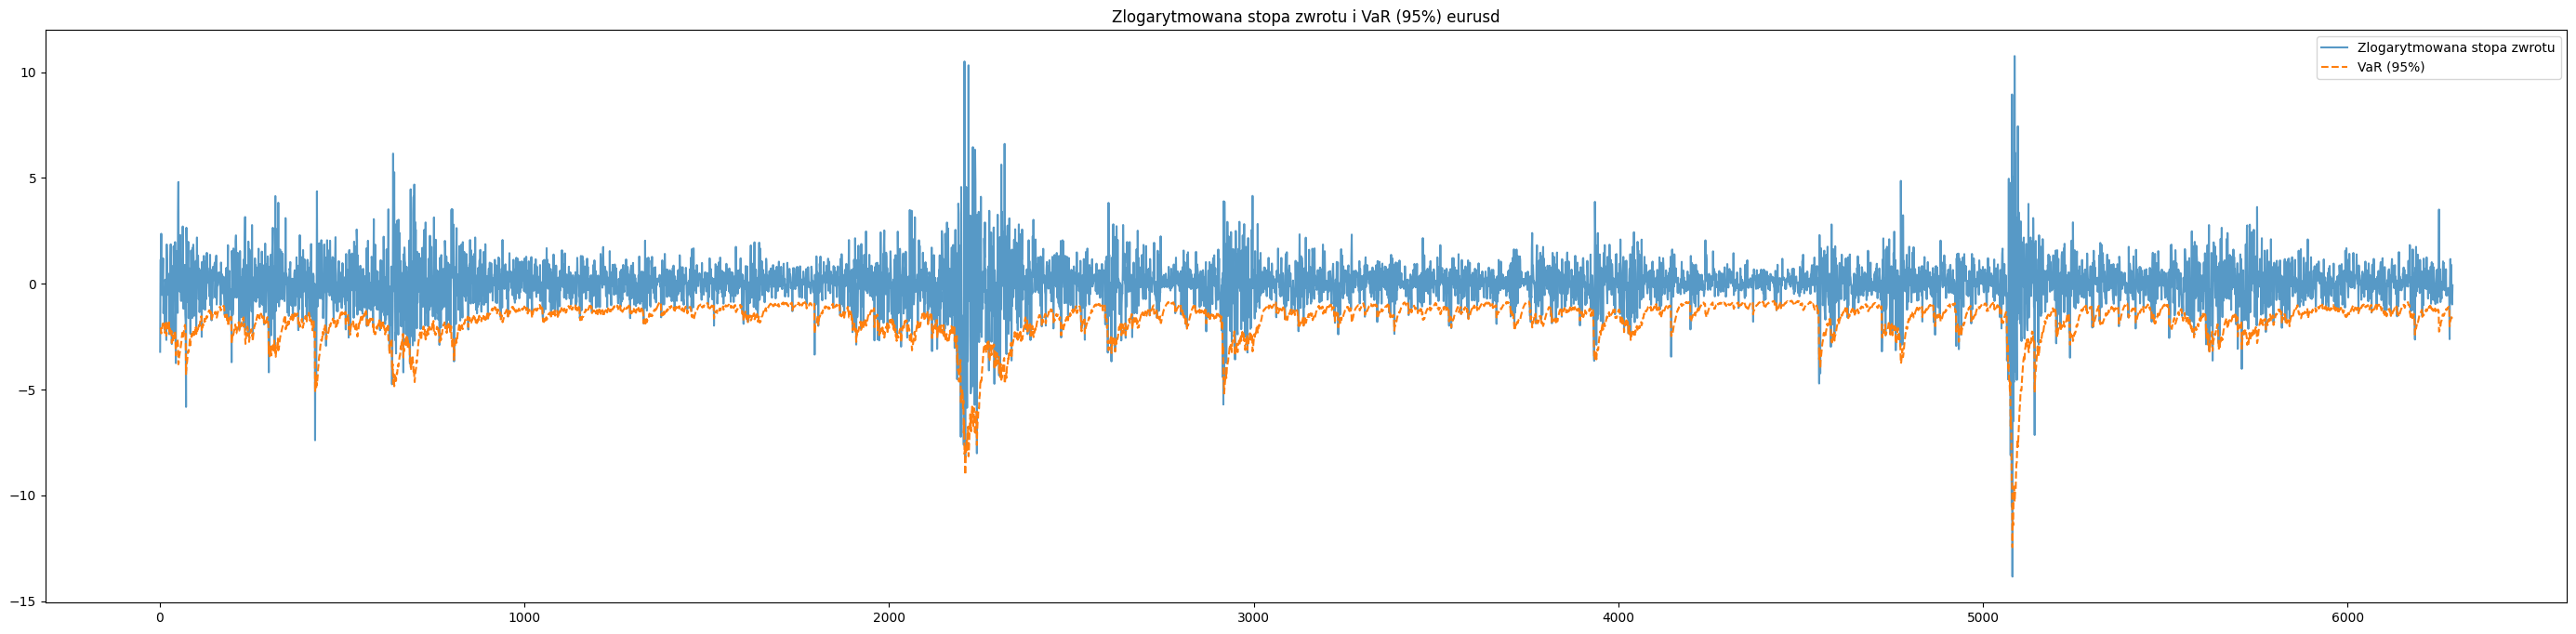

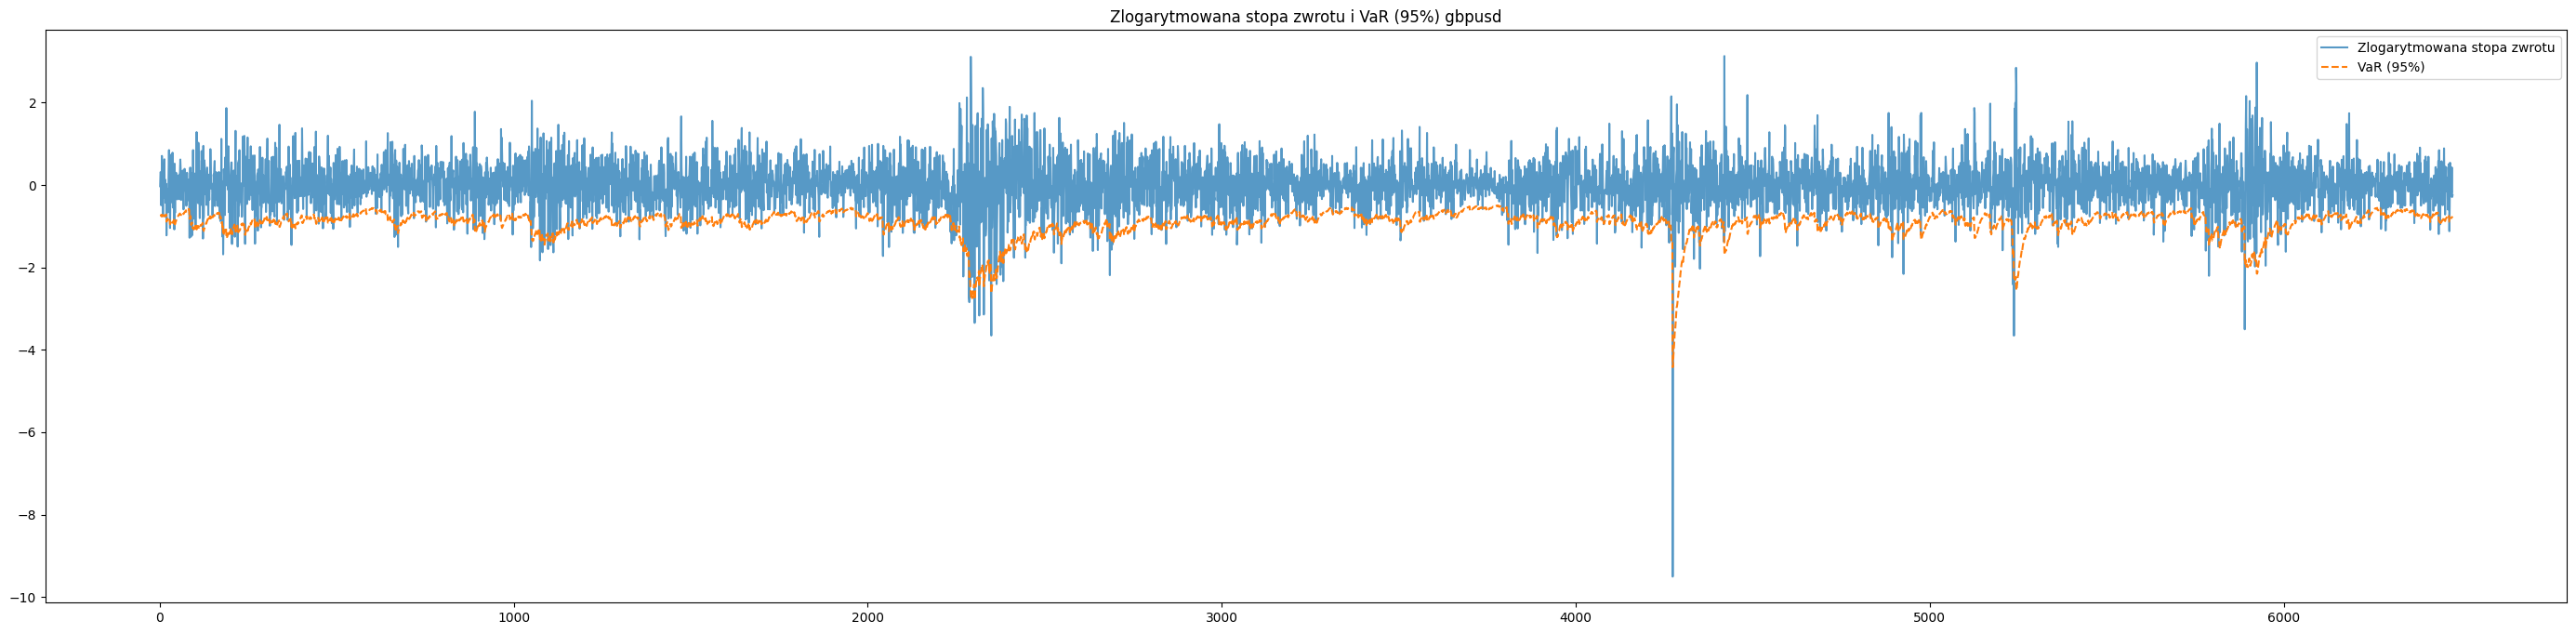

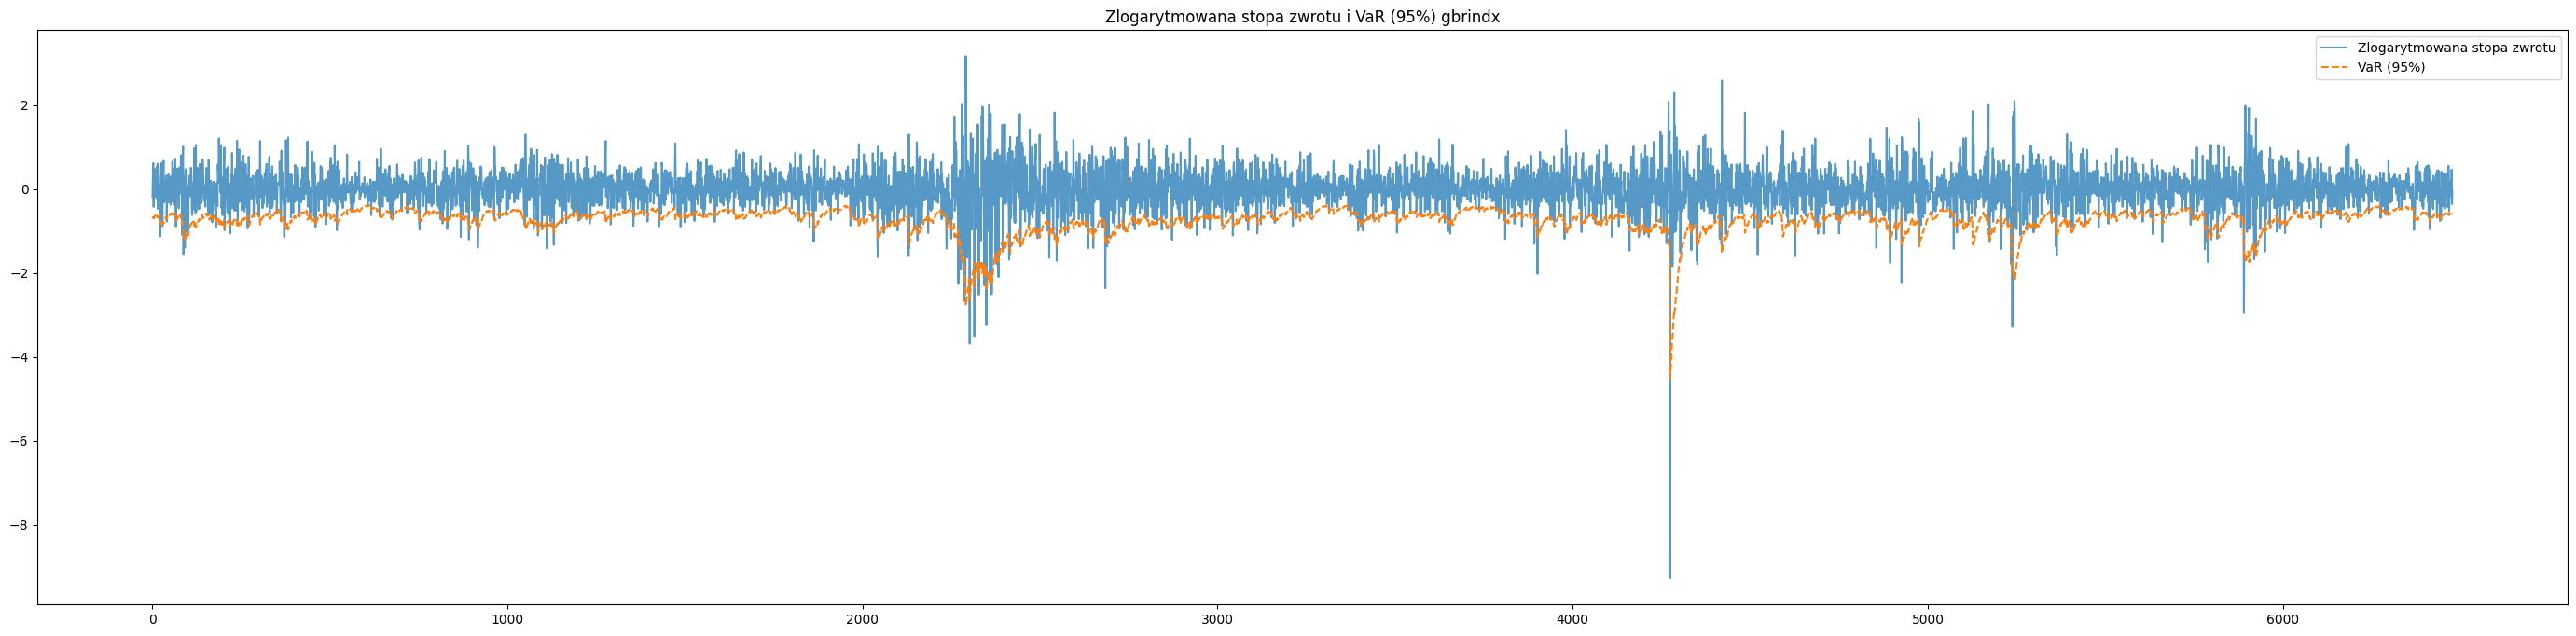

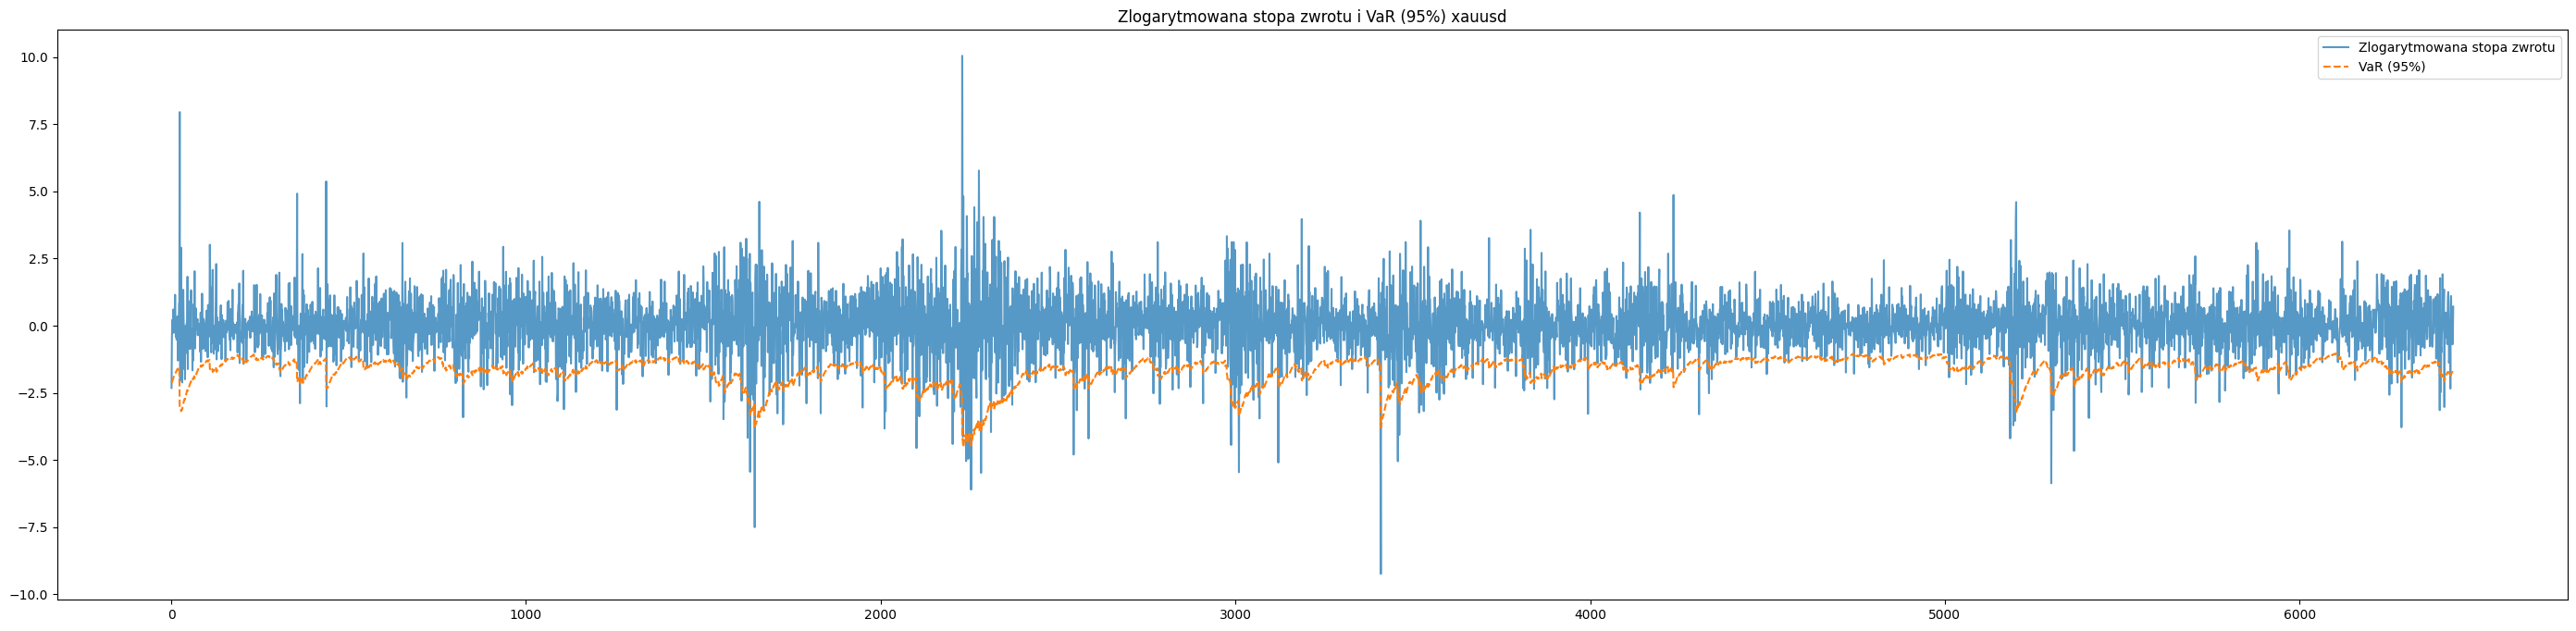

In [27]:
for df, name in zip(instruments, instrument_names):
    returns = df['ZSZ100']

    result = estimate_garch_model(df) # Dopasowanie modelu GARCH

    var_forecasts = calculate_dynamic_var(result) # Dynamiczny VaR
    var_forecasts = pd.Series(var_forecasts.values, index=returns.index) # Dopasowanie indeksów
    var_forecasts = var_forecasts[1:]

    plt.figure(figsize=(35, 8))
    plt.plot(returns, label='Zlogarytmowana stopa zwrotu', alpha=0.75)
    plt.plot(var_forecasts, label='VaR (95%)', linestyle='--')
    plt.title(f'Zlogarytmowana stopa zwrotu i VaR (95%) {name}')
    plt.legend()
    plt.show()

In [40]:
def kupiec_test(var_forecasts, returns, alpha=0.05):
    # Liczba obserwacji (N) i liczba przekroczeń (T)
    N = len(returns)
    T = np.sum(returns < var_forecasts)  # Liczba przekroczeń
    
    # Sprawdzenie skrajnych warunków
    if T == 0 or T == N:
        return {
            'LRuc': np.nan,
            'Critical Value': stats.chi2.ppf(1 - alpha, df=1),
            'p-value': np.nan,
            'Reject H0': False,
            'Observed Exceedances': T,
            'Expected Exceedances': alpha * N
        }
    
    alpha_hat = T / N # Szacowany udział przekroczeń
    
    # Obliczenie LRuc w logarytmach
    term1 = (N - T) * (np.log(1 - alpha) - np.log(1 - alpha_hat))
    term2 = T * (np.log(alpha) - np.log(alpha_hat))
    LRuc = -2 * (term1 + term2)
    
    # Wartość krytyczna i p-value
    critical_value = stats.chi2.ppf(1 - alpha, df=1)
    p_value = 1 - stats.chi2.cdf(LRuc, df=1)
    
    reject_null = LRuc > critical_value # Decyzja statystyczna
    
    return {
        'LRuc': LRuc,
        'Critical Value': critical_value,
        'p-value': p_value,
        'Reject H0': reject_null,
        'Observed Exceedances': T,
        'Expected Exceedances': alpha * N
    }

# Przeprowadzenie testu Kupca dla każdego instrumentu
kupiec_results = []
for df, name in zip(instruments, instrument_names):
    # Pobranie rzeczywistych zwrotów i dynamicznego VaR
    returns = df['ZSZ100']  # Rzeczywiste zwroty
    result = estimate_garch_model(df)  # Wynik modelu GARCH
    var_forecasts = calculate_dynamic_var(result)  # Dynamiczne VaR dla każdego okresu
    
    # Dopasowanie indeksów, jeśli różne
    var_forecasts = pd.Series(var_forecasts.values, index=returns.index) # Dopasowanie indeksów
    
    returns = returns[1:]
    var_forecasts = var_forecasts[1:]
    
    # Przeprowadzenie testu Kupca
    kupiec_result = kupiec_test(var_forecasts=var_forecasts, returns=returns)
    
    # Dodanie wyników do listy
    kupiec_results.append({
        'Instrument': name,
        'LRuc': kupiec_result['LRuc'],
        'Critical Value': kupiec_result['Critical Value'],
        'p-value': kupiec_result['p-value'],
        'Reject H0': kupiec_result['Reject H0'],
        'Observed Exceedances': kupiec_result['Observed Exceedances'],
        'Expected Exceedances': kupiec_result['Expected Exceedances']
    })

# Tworzenie DataFrame z wynikami testu Kupca
kupiec_results_df = pd.DataFrame(kupiec_results)
kupiec_results_df

Instrument        LRuc  Critical Value   p-value  Reject H0  \
0       wig20    8.091303        3.841459  0.004448       True   
1      nasdaq   78.240249        3.841459  0.000000       True   
2      nvidia  132.350663        3.841459  0.000000       True   
3       sp500  117.466369        3.841459  0.000000       True   
4       apple  139.349506        3.841459  0.000000       True   
5  dowjones30  106.678968        3.841459  0.000000       True   
6      eurusd  106.678968        3.841459  0.000000       True   
7      gbpusd   11.534321        3.841459  0.000683       True   
8     gbrindx    9.202682        3.841459  0.002417       True   
9      xauusd   19.182600        3.841459  0.000012       True   

   Observed Exceedances  Expected Exceedances  
0                   265                312.80  
1                   174                314.45  
2                   137                314.35  
3                   146                314.35  
4                   133                314.35  
5                   153                314.35  
6                   153                314.35  
7                   266                323.80  
8                   272                323.80  
9                   248                321.60

Ogólny opis:
Test Kupca pozwala ocenić, czy modele prognozujące Value-at-Risk (VaR) skutecznie przewidują ryzyko dla każdego instrumentu finansowego. Wartości statystyki LRuc, p-value oraz decyzje o odrzuceniu hipotezy H0 wskazują, czy liczba przekroczeń prognozowanego VaR jest zgodna z oczekiwaniami. Znaczące różnice mogą sugerować niedoskonałości modeli.

LRuc (Log-Likelihood Ratio Test):
- Wysokie wartości statystyki LRuc wskazują na istotne różnice między prognozowaną a rzeczywistą liczbą przekroczeń VaR, co świadczy o niedopasowaniu modelu.
- Najwyższą wartość LRuc odnotowano dla instrumentu apple (139.35) oraz nvidia (132.35), co sugeruje, że modele te znacząco niedoszacowują ryzyko.
- Najniższą wartość LRuc uzyskano dla instrumentu wig20 (8.09), co wskazuje na mniejsze, ale wciąż zauważalne niedoskonałości prognoz.

p-value:
- p-value < 0.05 sugeruje istotne różnice między oczekiwaną a rzeczywistą liczbą przekroczeń VaR.
- Wszystkie instrumenty mają p-value znacznie mniejsze od 0.05, co oznacza, że prognozy VaR dla tych instrumentów są statystycznie niedokładne.
- Nawet najniższa wartość p-value dla wig20 (0,004) wskazuje na odrzucenie hipotezy H0, co sugeruje, że model wymaga poprawy.

Liczba przekroczeń (Observed Exceedances vs Expected Exceedances):
- Rzeczywista liczba przekroczeń (Observed Exceedances) znacząco różni się od oczekiwanej liczby przekroczeń (Expected Exceedances) dla wszystkich instrumentów.

Wnioski:
- Modele prognozujące VaR dla wszystkich instrumentów wymagają poprawy.
- Modele te mogą niedoszacowywać ryzyka, co prowadzi do nieprawidłowego przewidywania ekstremalnych strat.

In [25]:
def christoffersen_test(var_forecasts, returns, alpha=0.05):
    exceedances = (returns < var_forecasts).astype(int) # Określenie przekroczeń VaR
    exceedances_lagged = exceedances.shift(1) # Wektor przesunięty o jeden okres

    # Zliczanie przejść między stanami
    T01 = np.sum((exceedances_lagged == 0) & (exceedances == 1))
    T00 = np.sum((exceedances_lagged == 0) & (exceedances == 0))
    T11 = np.sum((exceedances_lagged == 1) & (exceedances == 1))
    T10 = np.sum((exceedances_lagged == 1) & (exceedances == 0))

    # Liczba wszystkich przekroczeń i braków przekroczeń
    T0 = T01 + T00
    T1 = T11 + T10

    # Szacowane prawdopodobieństwa
    pi_0 = T01 / T0 if T0 > 0 else 0
    pi_1 = T11 / T1 if T1 > 0 else 0
    pi = (T01 + T11) / (T0 + T1) if (T0 + T1) > 0 else 0

    # Obliczenie statystyki LRind
    if T01 > 0 and T00 > 0 and T11 > 0 and T10 > 0:
        LRind = -2 * (
            (T00 + T01) * np.log(1 - pi) +
            T01 * np.log(pi) +
            (T10 + T11) * np.log(1 - pi) +
            T11 * np.log(pi)
            - T00 * np.log(1 - pi_0)
            - T01 * np.log(pi_0)
            - T10 * np.log(1 - pi_1)
            - T11 * np.log(pi_1)
        )
    else:
        LRind = np.nan  # Jeśli którykolwiek warunek Txy == 0, statystyka jest nieokreślona

    # Wartość krytyczna i p-value
    critical_value = stats.chi2.ppf(1 - alpha, df=1)
    p_value = 1 - stats.chi2.cdf(LRind, df=1)

    # Decyzja statystyczna
    reject_null = LRind > critical_value

    return {
        'LRind': LRind,
        'Critical Value': critical_value,
        'p-value': p_value,
        'Reject H0': reject_null,
        'T00': T00,
        'T01': T01,
        'T10': T10,
        'T11': T11
    }

christoffersen_results = []  # Wyniki testu Christoffersena
for df, name in zip(instruments, instrument_names):
    # Pobranie rzeczywistych zwrotów i dynamicznego VaR
    returns = df['ZSZ100'] # Rzeczywiste zwroty
    result = estimate_garch_model(df)  # Wynik modelu GARCH
    var_forecasts = calculate_dynamic_var(result)  # Dynamiczne VaR dla każdego okresu
    
    # Dopasowanie indeksów, jeśli różne
    var_forecasts = pd.Series(var_forecasts.values, index=returns.index) # Dopasowanie indeksów

    returns = returns[1:]
    var_forecasts = var_forecasts[1:]
    
    # Przeprowadzenie testu Christoffersena
    result_christoffersen = christoffersen_test(var_forecasts=var_forecasts, returns=returns, alpha=0.05)

    # Dodanie wyników do listy
    christoffersen_results.append({
        'Instrument': name,
        'LRind': result_christoffersen['LRind'],
        'Critical Value': result_christoffersen['Critical Value'],
        'p-value': result_christoffersen['p-value'],
        'Reject H0': result_christoffersen['Reject H0'],
        'T00': result_christoffersen['T00'],
        'T01': result_christoffersen['T01'],
        'T10': result_christoffersen['T10'],
        'T11': result_christoffersen['T11']
    })

# Tworzenie DataFrame z wynikami
christoffersen_results_df = pd.DataFrame(christoffersen_results)
christoffersen_results_df

Instrument      LRind  Critical Value       p-value  Reject H0   T00  T01  \
0       wig20  27.881626        3.841459  1.289686e-07       True  5744  246   
1      nasdaq   9.919894        3.841459  1.635018e-03       True  5944  170   
2      nvidia   6.037789        3.841459  1.400281e-02       True  6015  134   
3       sp500   6.970673        3.841459  8.285631e-03       True  5998  142   
4       apple   5.701021        3.841459  1.695505e-02       True  6023  130   
5  dowjones30   7.698098        3.841459  5.527906e-03       True  5983  150   
6      eurusd   7.698098        3.841459  5.527906e-03       True  5983  150   
7      gbpusd  22.404683        3.841459  2.208349e-06       True  5953  256   
8     gbrindx  26.901035        3.841459  2.141441e-07       True  5949  254   
9      xauusd  20.716195        3.841459  5.326362e-06       True  5948  235   

   T10  T11  
0  246   19  
1  170    4  
2  134    3  
3  142    4  
4  130    3  
5  150    3  
6  150    3  
7  256   10  
8  254   18  
9  235   13

Ogólny opis:
Test Christoffersena pozwala ocenić zgodność liczby przekroczeń VaR)z oczekiwaniami oraz niezależność tych przekroczeń w czasie. Wyniki wskazują, czy model poprawnie odwzorowuje ryzyko i czy przekroczenia są niezależne od siebie. Znaczące odchylenia mogą sugerować niedoskonałości modelu.

LRind (Log-Likelihood Ratio Test for Independence):
- Wysokie wartości statystyki LRind wskazują na zależność między przekroczeniami VaR, co oznacza, że przekroczenia nie są losowe w czasie.
- Najwyższe wartości LRind odnotowano dla wig20 (27.88) oraz gbrindx (26.9), co sugeruje, że modele prognozujące dla tych instrumentów mają problemy zarówno ze zgodnością liczby przekroczeń, jak i ich niezależnością.
- Najniższe wartości LRind zaobserwowano dla nvidia (6.03) oraz apple (5.70), co wskazuje na mniejsze problemy z niezależnością przekroczeń w tych modelach, choć nadal występują istotne różnice.

p-value:
- p-value < 0.05 sugeruje istotne różnice między obserwowaną a oczekiwaną liczbą przekroczeń oraz zależność przekroczeń w czasie.
- Wszystkie instrumenty mają p-value znacznie mniejsze niż 0.05, co oznacza, że modele VaR nie spełniają założeń niezależności przekroczeń.

W tabeli uwzględniono ilość przejść między różnymi stanami:
- T00: Przejścia z "brak przekroczenia" do "brak przekroczenia".
- T01: Przejścia z "brak przekroczenia" do "przekroczenie".
- T10: Przejścia z "przekroczenie" do "brak przekroczenia".
- T11: Przejścia z "przekroczenie" do "przekroczenie".
Analiza tych wartości pomaga ocenić, czy przekroczenia są niezależne.

Wnioski:
- Wszystkie modele wykazują brak niezależności przekroczeń w czasie, co oznacza, że po jednym przekroczeniu VaR istnieje większe prawdopodobieństwo wystąpienia kolejnych, co sugeruje niedopasowanie modeli.
- Instrumenty takie jak wig20 i gbrindx mają największe problemy z niezależnością przekroczeń, co potwierdzają ich wysokie wartości LRind oraz częste przejścia między stanami.
- Instrumenty takie jak apple i nvidia mają najmniejsze problemy z niezależnością przekroczeń, ale nadal nie spełniają założeń testu Christoffersena.
- Konieczne jest dalsze dostosowanie parametrów lub rozważenie alternatywnych modeli prognozujących VaR.

In [ ]:
######### Nie patrzeć #############

# # Wczytanie danych z plików CSV
# wig20 = pd.read_csv('wig20.csv')
# # wig20['Data'] = pd.to_datetime(wig20['Data'])
# # wig20 = wig20[wig20['Data'] >= "2023-01-01"]
# # wig20.reset_index(drop=True, inplace=True)

# nasdaq = pd.read_csv('nasdaq.csv')
# # nasdaq['Data'] = pd.to_datetime(wig20['Data'])
# # nasdaq = nasdaq[nasdaq['Data'] >= "2023-01-01"]
# # nasdaq.reset_index(drop=True, inplace=True)

# nvidia = pd.read_csv('nvidia.csv')
# # nvidia['Data'] = pd.to_datetime(wig20['Data'])
# # nvidia = nvidia[nvidia['Data'] >= "2023-01-01"]
# # nvidia.reset_index(drop=True, inplace=True)

# sp500 = pd.read_csv('s&p500.csv')
# # sp500['Data'] = pd.to_datetime(wig20['Data'])
# # sp500 = sp500[sp500['Data'] >= "2023-01-01"]
# # sp500.reset_index(drop=True, inplace=True)

# apple = pd.read_csv('apple.csv')
# # apple['Data'] = pd.to_datetime(wig20['Data'])
# # apple = apple[apple['Data'] >= "2023-01-01"]
# # apple.reset_index(drop=True, inplace=True)

# dowjones30 = pd.read_csv('dowjones30.csv')
# # dowjones30['Data'] = pd.to_datetime(wig20['Data'])
# # dowjones30 = dowjones30[dowjones30['Data'] >= "2023-01-01"]
# # dowjones30.reset_index(drop=True, inplace=True)

# eurusd = pd.read_csv('dowjones30.csv')
# # eurusd['Data'] = pd.to_datetime(wig20['Data'])
# # eurusd = eurusd[eurusd['Data'] >= "2023-01-01"]
# # eurusd.reset_index(drop=True, inplace=True)

# gbpusd = pd.read_csv('gbpusd.csv')
# # gbpusd['Data'] = pd.to_datetime(wig20['Data'])
# # gbpusd = gbpusd[gbpusd['Data'] >= "2023-01-01"]
# # gbpusd.reset_index(drop=True, inplace=True)

# gbrindx = pd.read_csv('gbrindx.csv')
# # gbrindx['Data'] = pd.to_datetime(wig20['Data'])
# # gbrindx = gbrindx[gbrindx['Data'] >= "2023-01-01"]
# # gbrindx.reset_index(drop=True, inplace=True)

# xauusd = pd.read_csv('xauusd.csv')
# # xauusd['Data'] = pd.to_datetime(wig20['Data'])
# # xauusd = xauusd[xauusd['Data'] >= "2023-01-01"]
# # xauusd.reset_index(drop=True, inplace=True)